<img src="http://drive.google.com/uc?export=view&id=1JzM1Jig5KAOCvU4tIf2t66B3gd1uy1rG" width=250px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# <font color='blue'> Table Of Contents </font>

<font color='blue'>

  ## AWS IoT Core
      
  - ### Introduction
      
  - ### Entities in IoT Core

  - ### Group & Type Creation

  - ### Policy Creation 

  - ### Thing Creation

  - ### Device Shadows

  - ### Security: Certificates, Keys and Policies

  - ### MQTT Test Client

  - ### AWS IAM Role Creation
       
  - ### AWS IoT Core : Rule Creation

## AWS DynamoDB : Table Creation

## Important
    
</font>

# <font color='blue'> AWS IoT Core </font>

## <font color='blue'> Introduction </font>

This week, we are going to be looking at some of the concepts in AWS IoT Core and their configuration.

In this lab, we are going to go through a complete workflow to push and store data in the cloud. 

We'll create an IoT thing and related entities - type and groups. We'll create and download the client certificate and keys, and also set up the right policy to allow authorization

We'll configure the local simulator program based on the certificate and keys, transmit and validate the data using the MQTT test client on AWS IoT Core.

We'll then create a DynamoDB table, and create an IoT core rule to automatically route incoming data to that table.

We'll use a healthcare device - Bed side monitor to tie the whole flow together.

You can do all of these in your AWS Educate account. You can also use a generic AWS account. 


## <font color='blue'> Entities in IoT Core </font>

The basic building block is, of course, a Thing. A Thing can be an end device generating sensor data using one or more sensors. Edge devices using Greengrass SDK can be configured as a Greengrass core device.

While adding a device to the thing registry, you can setup the following properties:

**Name:** This is a unique string which identifies that particular device across your whole system. Normally, companies will come up with an internal nomenclature to indicate the device type and id, thereby making it unique. Let's say we add a device called 'BSM_G101'

**Type:** Each device can be associated with a Type. You can create a type beforehand. Each Type can have three searchable attributes. When you add a type to a device, you can set the value of each attribute.


**Groups:** Another way of aggregating devices is by their topology. Groups come in handy here. You can create hierarchical groups and then map all devices to them based on your system topology. This is very useful to target a group of devices based on some criteria. Each group can have its own set of attributes as well. Same like Type, you can create a Group beforehand too.

We can also map other groups to the same device. For ex. we can think of another set of group hierarchy based on power consumption, communication protocol, or even different types of lights.

There is even a possibility of creating a dynamic group where the group membership is defined by a query defined by some attribute values of the devices. For ex. you can create a dynamic group which only has member devices for which the temperature reading is more than 80 degrees. This functionality can be used to highlight and target a group based on dynamic parameters. This is similar to creating a dynamic group of servers where memory usage has crossed 80% limit

**Thing shadow:** In addition, you can also set the initial parameters that should be part of the device shadow. We'll go into details of device shadows later in the notebook.


## <font color='blue'> AWS IoT Core : Group & Type Creation </font>

In this section, we are going to create `Thing Group` & `Thing Type` on AWS IoT core for our IoT thing. 

Data will be collected from the Bed side monitor simulator.

Let us create `Thing Type` and `Thing Group`.

### <font color='blue'> Type Creation </font>

To create a generic type in AWS IoT Core, follow the steps mentioned below. 

1. Go to AWS IoT core and click on `Manage` tab and choose `Types`. If you do not have any `Types` available in your AWS IoT core, it will look something like this. 

2. Click on `Create thing type`.

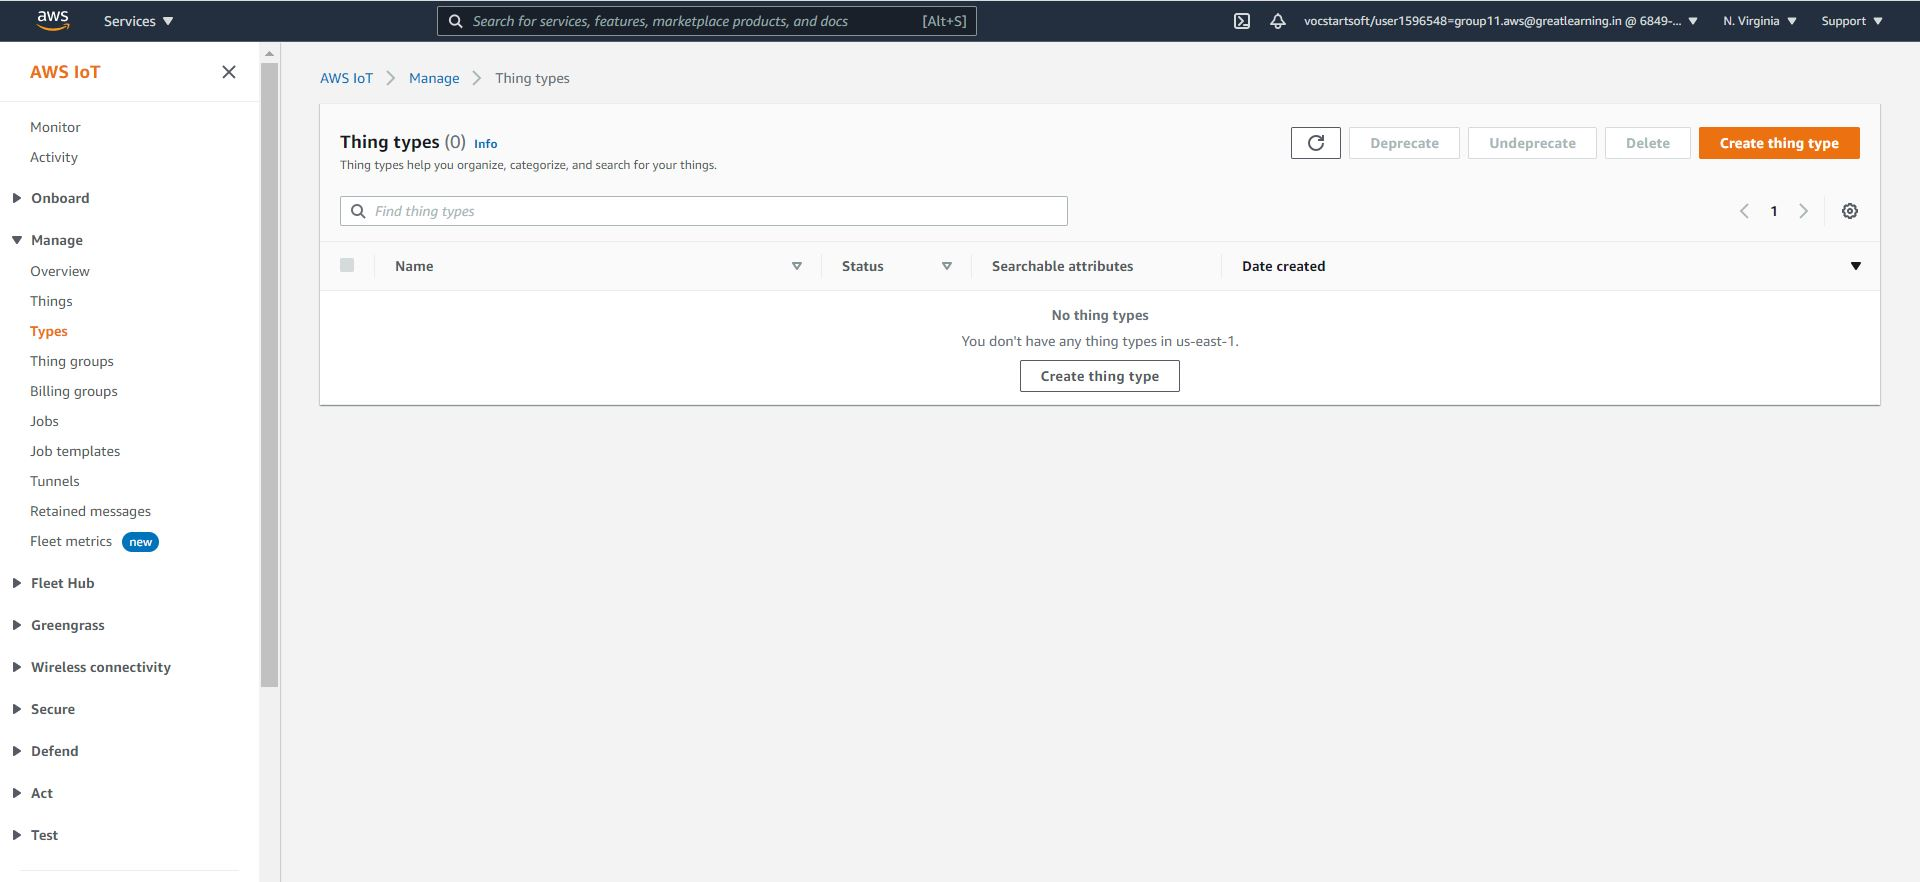

3. After clicking, it will take you to the following page. Here you need to add a few details related to your thing type. 
    * Enter the type name (BedSideMonitor or BSM_01 or any sutiable name) and description(optional). We will not add searchable attributes and tag as of now. Click on `Create thing type`. 

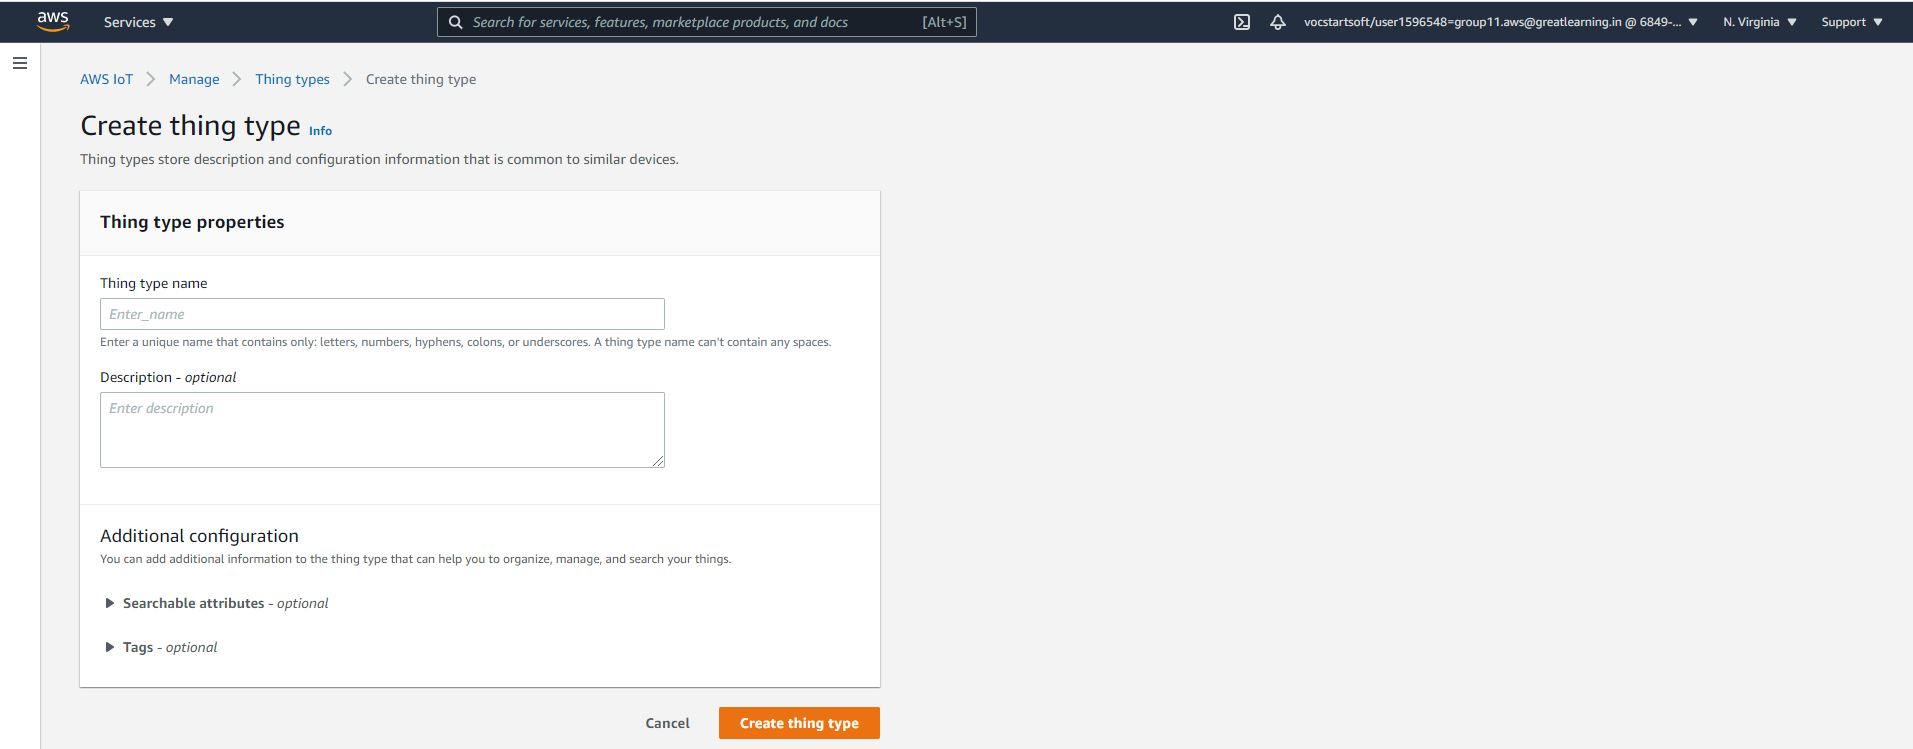

4. If the operation is successful, you will see a message like this and name of your `Thing Type` here.  

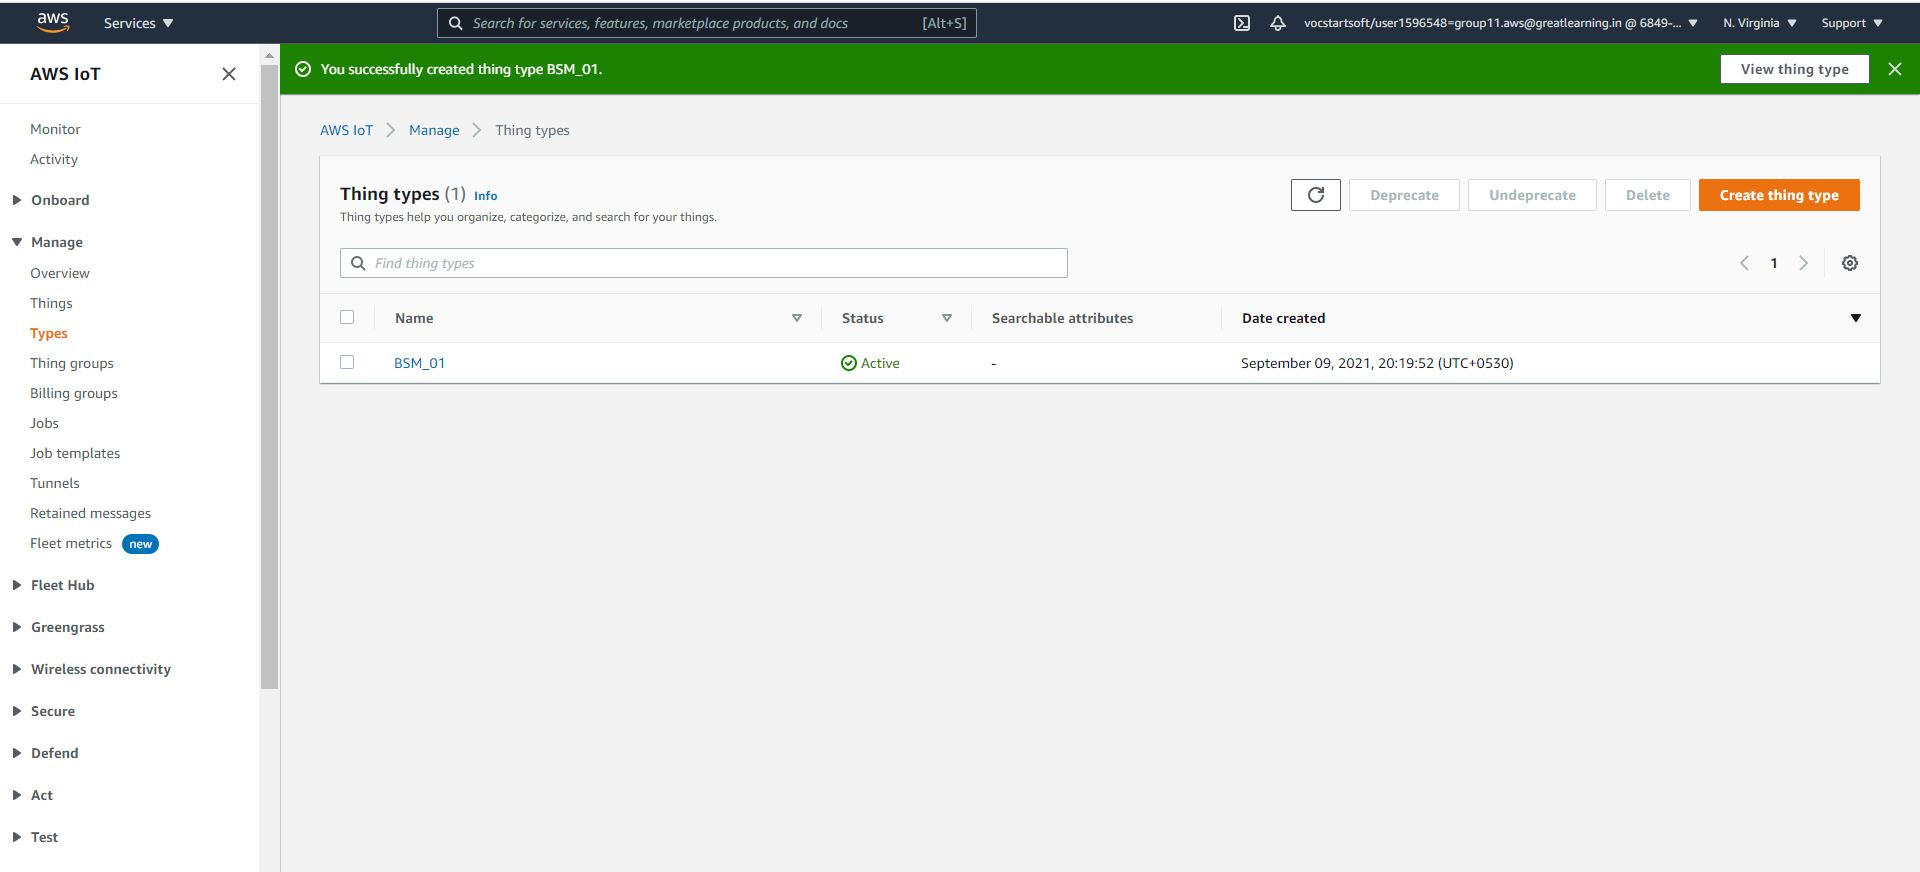

`Thing Type` is created for your IoT thing. Next step is to create `Thing Groups`. 

### <font color='blue'> Group Creation </font>

In this section we are going to see step by step guidance for `Thing Group` creation on AWS IoT core. 

1. Go to AWS IoT core and click on `Manage` tab and choose `Thing groups`. If you do not have any `Thing groups` available in your AWS IoT core, It will look something like this. 

2. Click on `Create thing group`. 

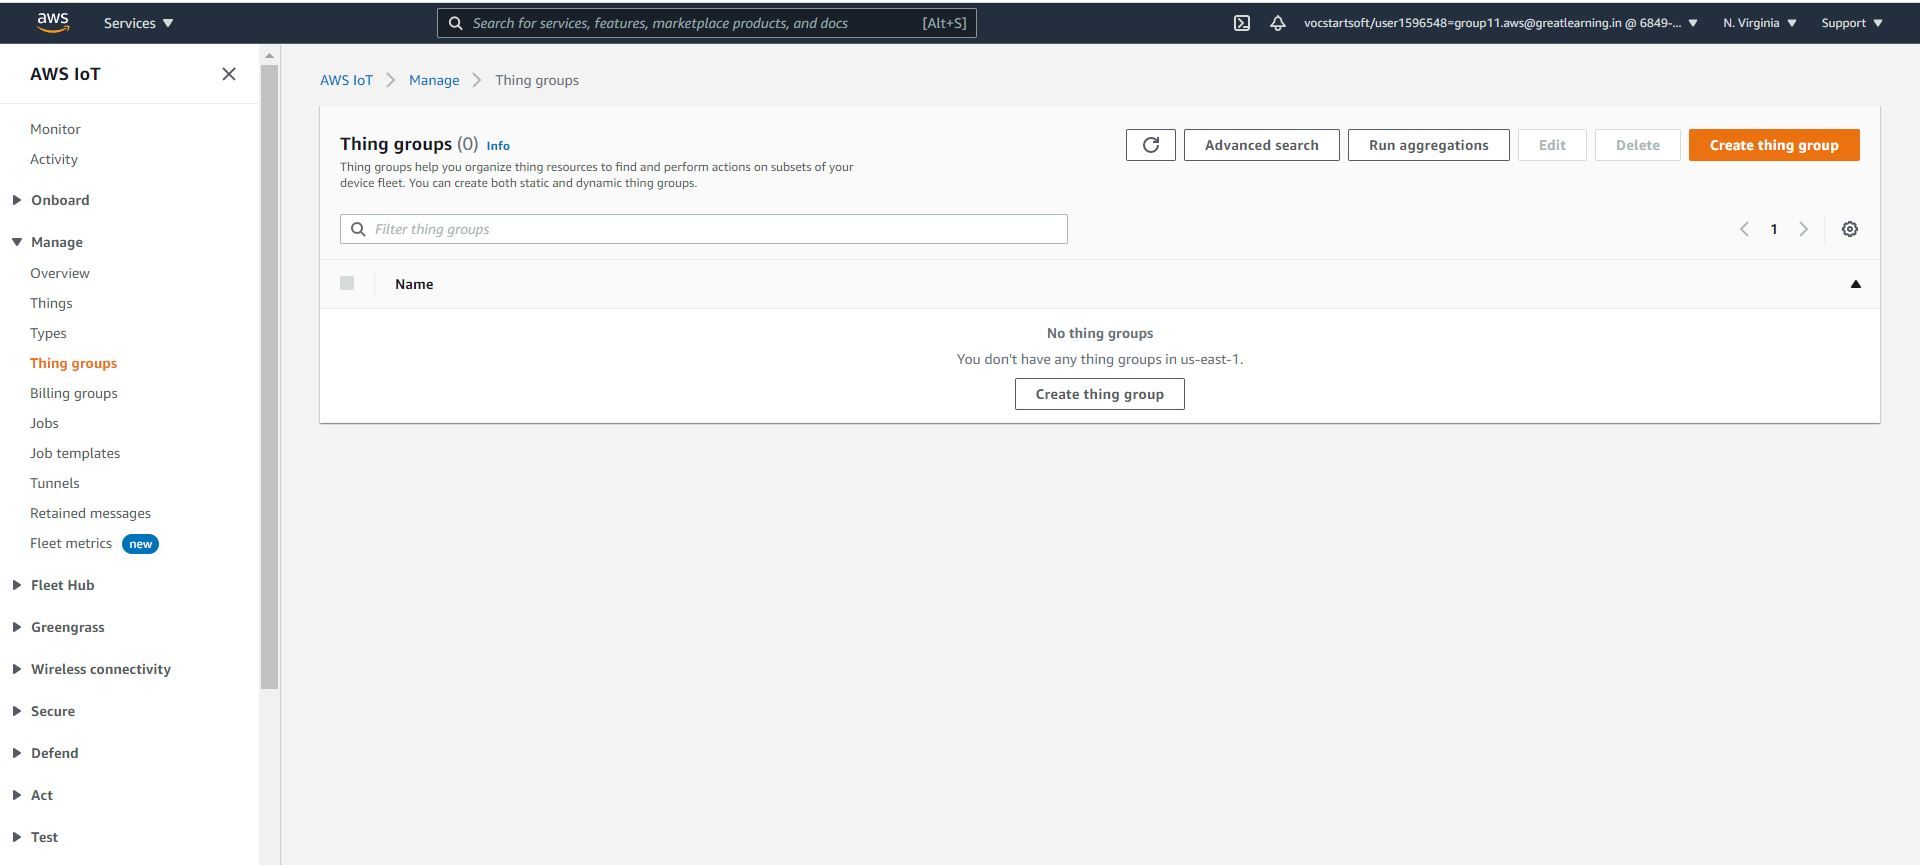

3. Click on `Create a static thing group`. 

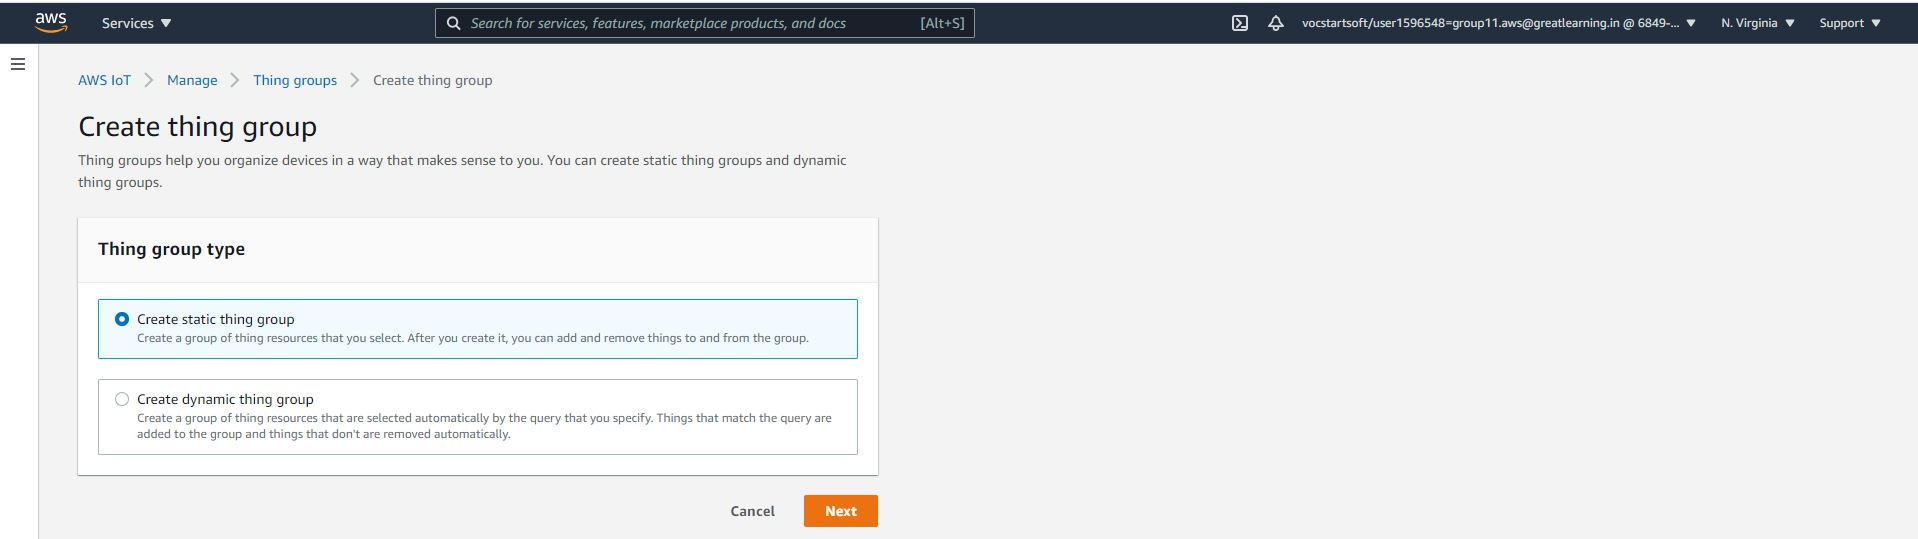

4. Enter the name of the group. Here We have kept Group name as `Hospital`. It represents here that IoT thing is going to be present in a `Hospital`. You can provide group name as per your choice. You can also create hierarchical groups by creating `Hospital` first, and then creating `Wing_01` as a sub-group within that.  

    * Enter your group name and group attribute information (optional).  

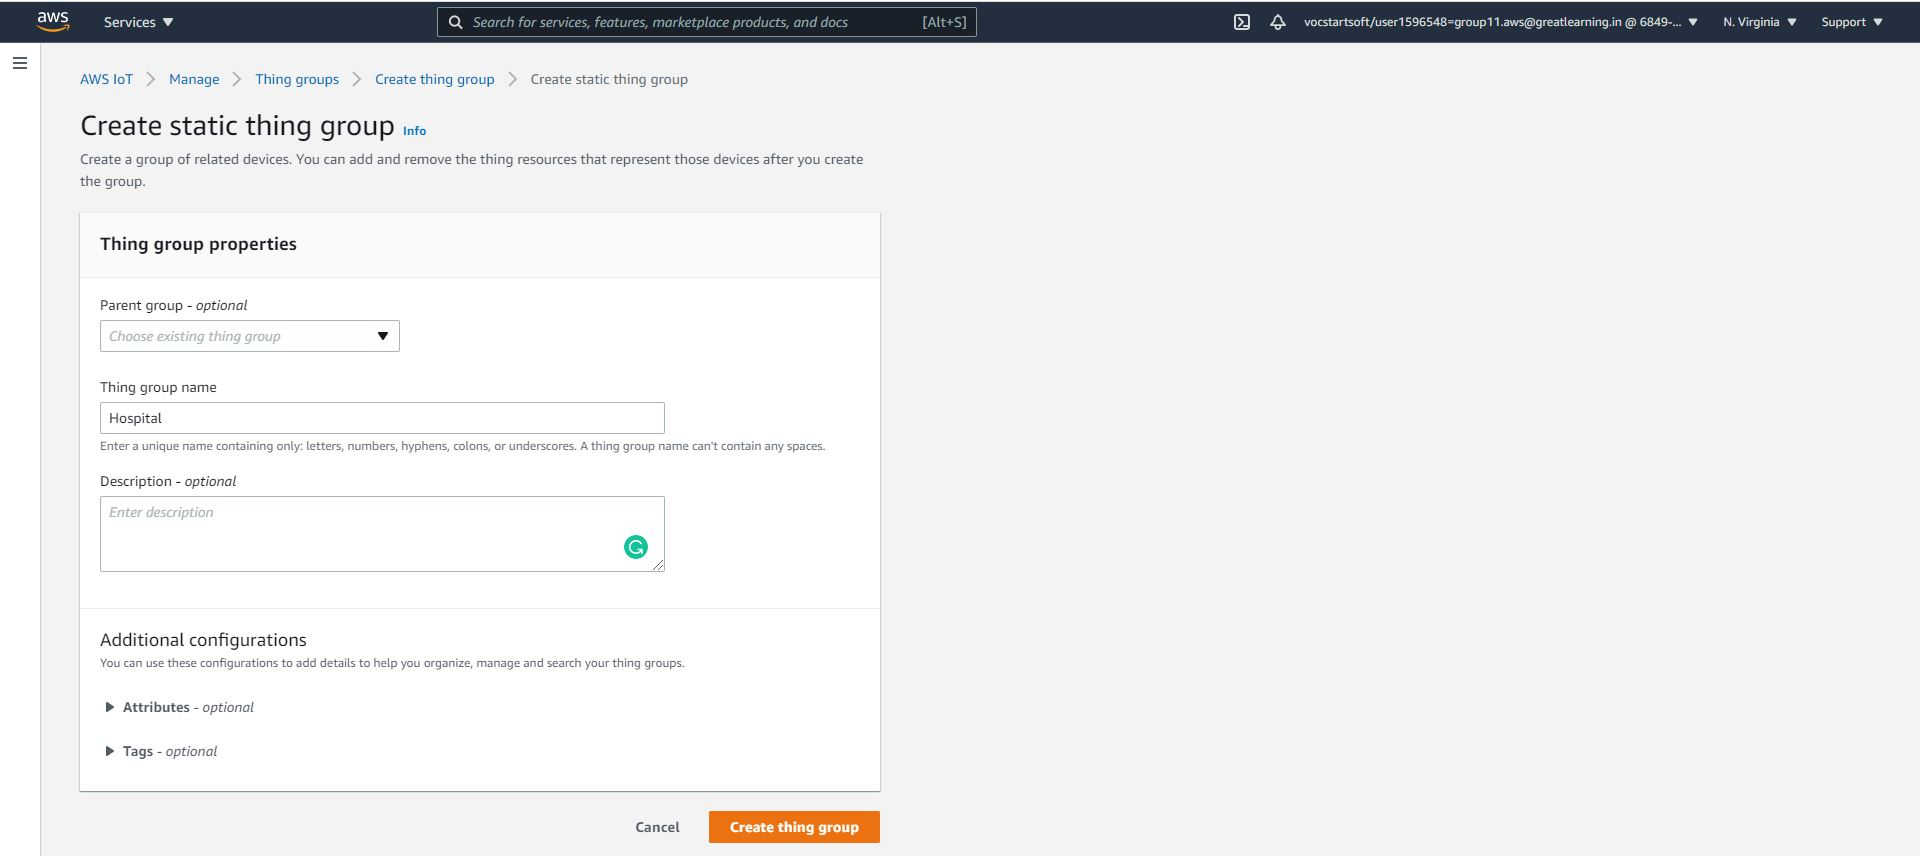


5. Once the details are provided, click on the `Create thing group`. Successful operation will take you to the next step where you can see the information related to the newly created group.  

## <font color='blue'> AWS IoT Core : Policy Creation </font>

Every device in AWS IoT Core needs to have certain policies attached with them to perform any operation.

In this section, we are going to create `Policy` for our things and set the `topic name`. The same `topic name` will be used again in the MQTT test client to see the pulished data on AWS IoT core. 

Lets start the policy creation process by using below mentioned steps. 

1. Click on `Secure` and choose `Policies`. Click on the `Create Policy` and this will prompt you to the next page where you can create your own policy. 

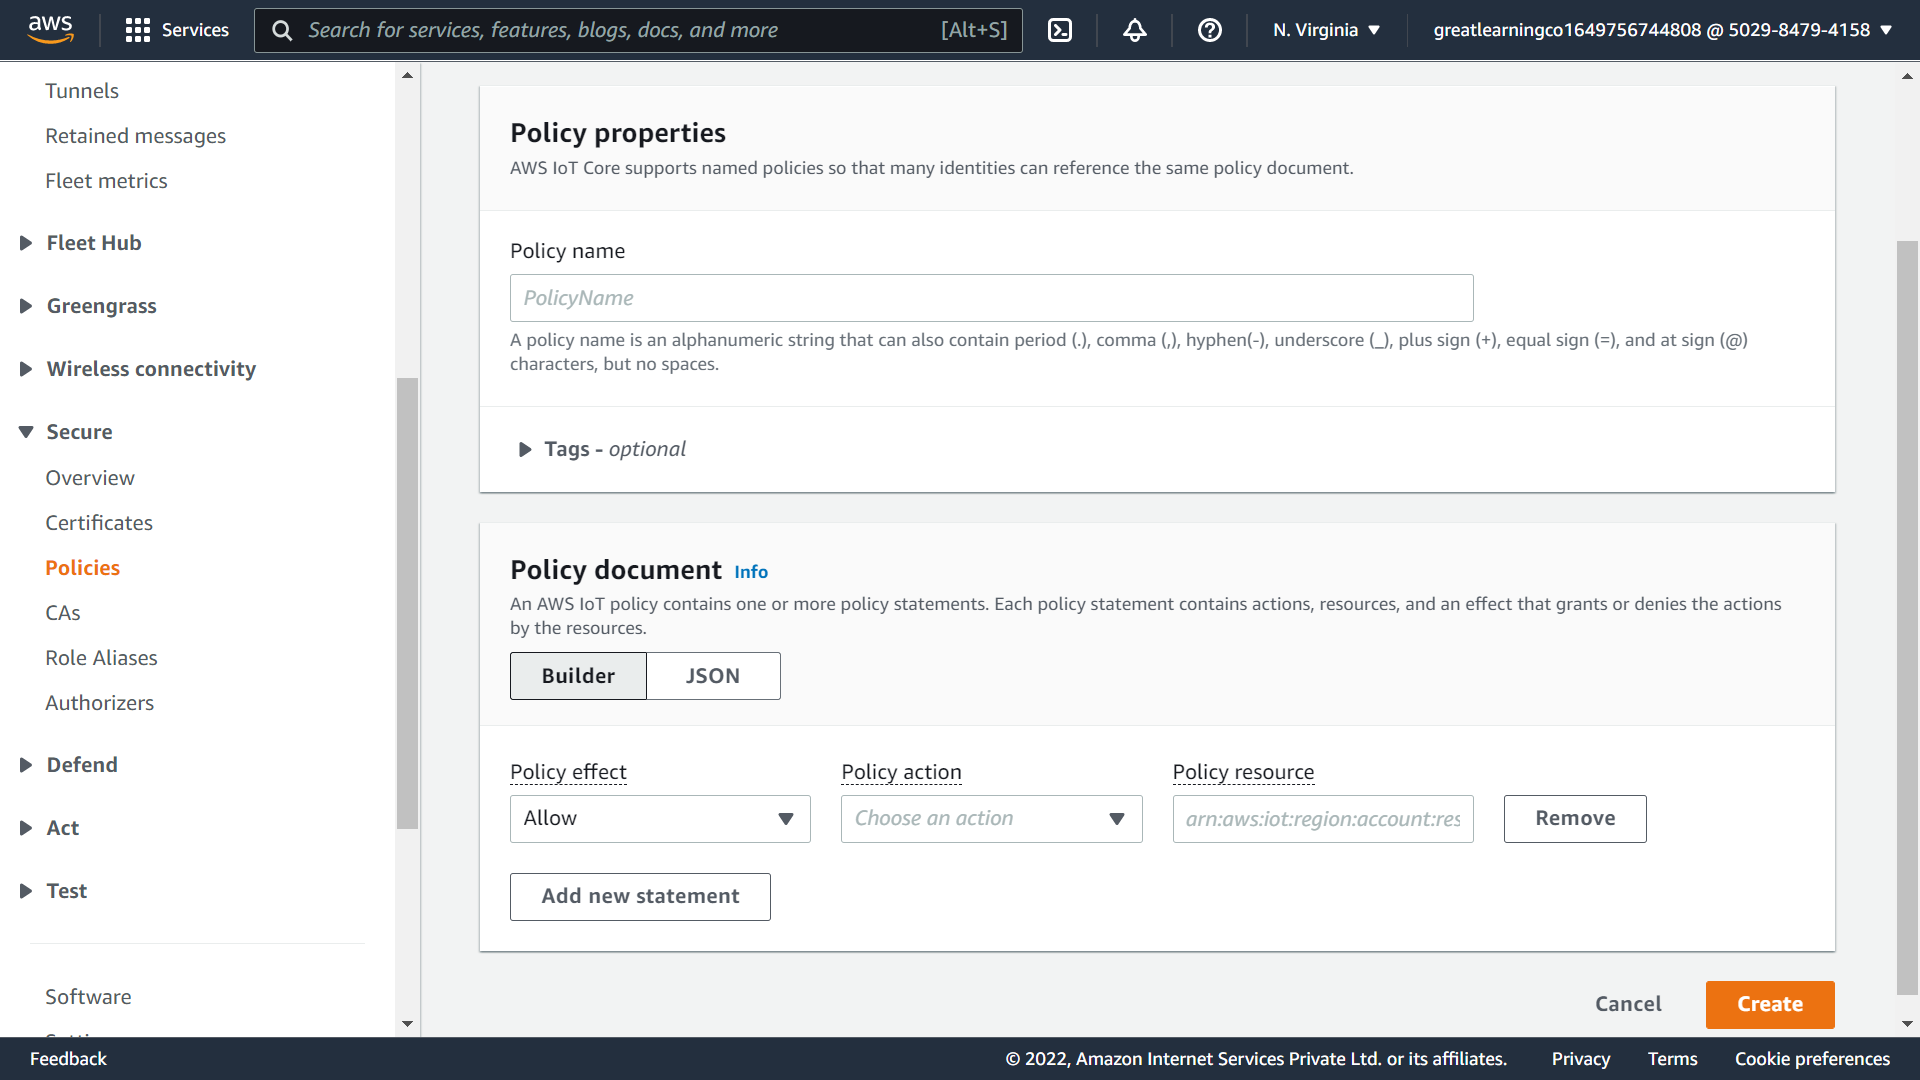

2. Enter the name for your policy. 

    * Let the `Policy document` be set to `Builder`.
    * Choose `Allow` option for `Policy effect`
    * Choose `All AWS IoT actions` (`*`) in the `Policy action`.
    * For ` Policy resource` enter `*`

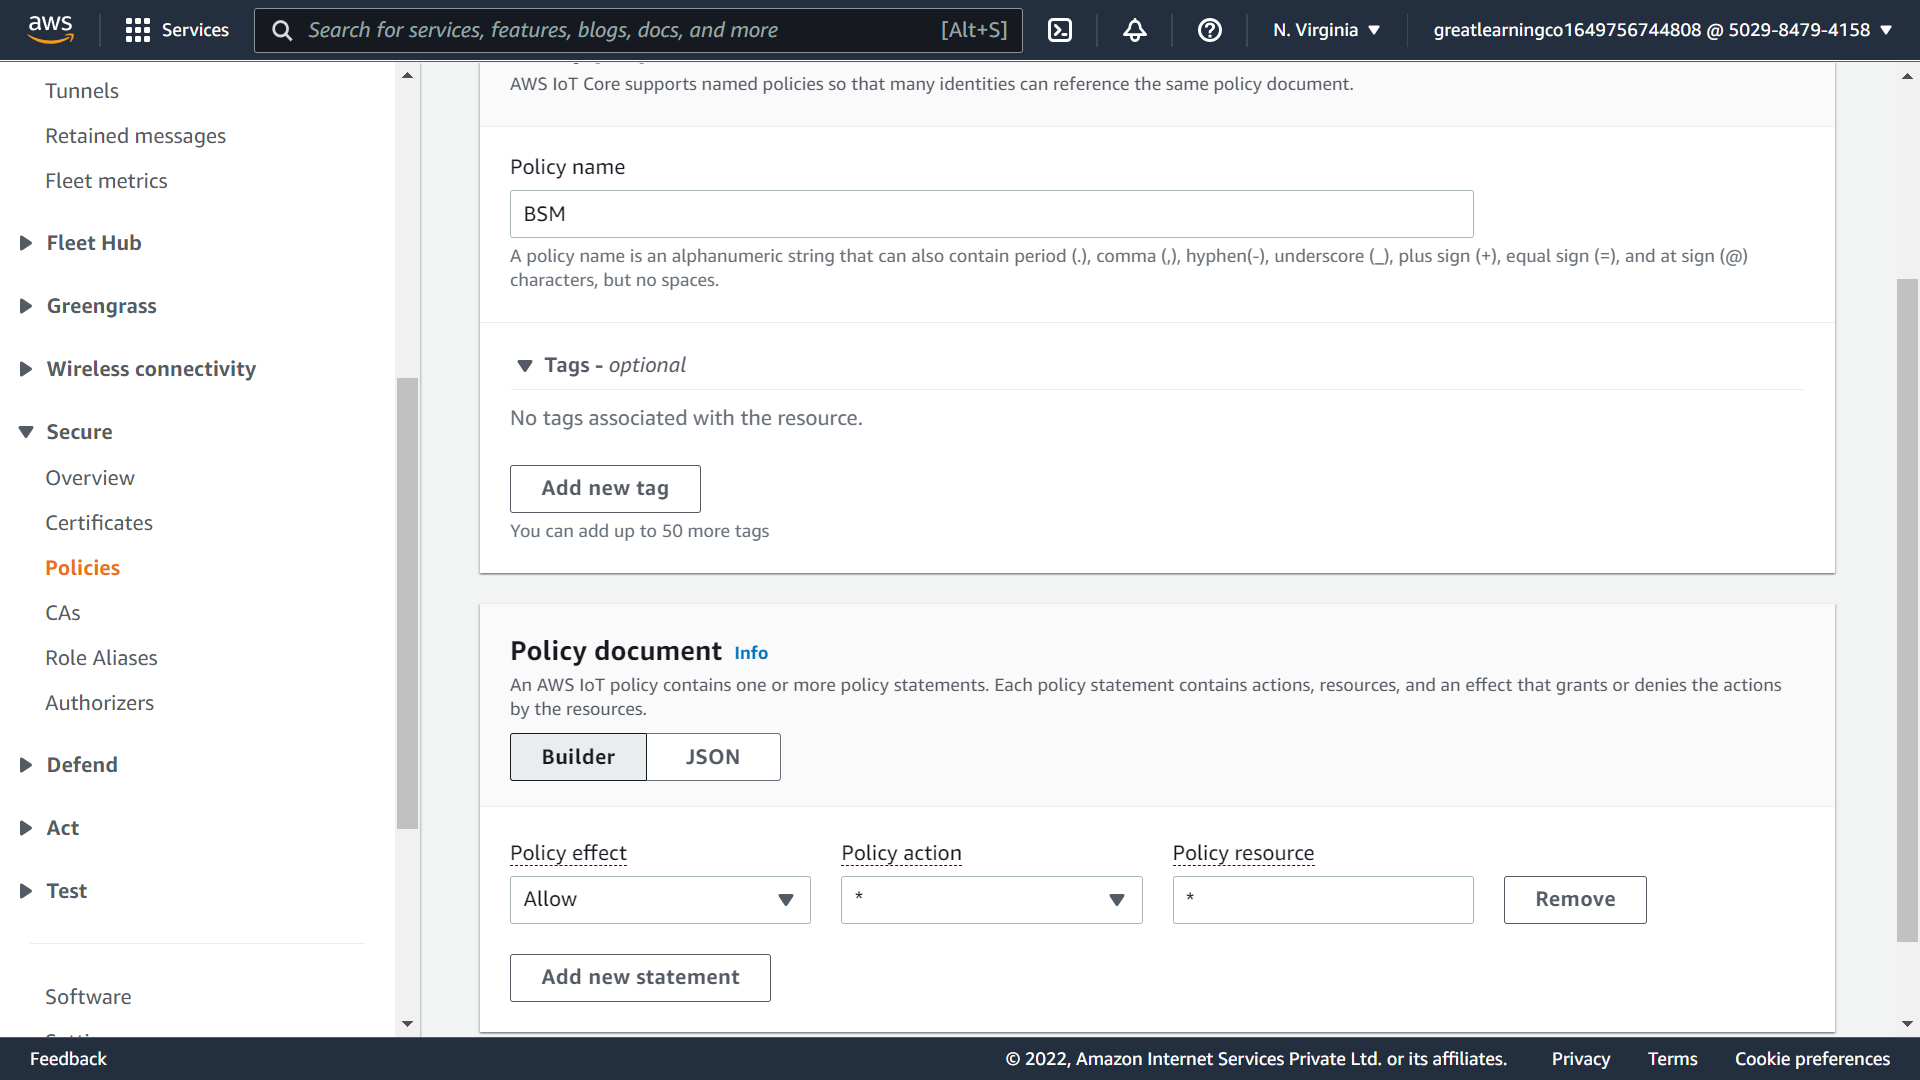

3. Successful operation will take you to the next page. This will look as mentioned in the attached image.

We have essentially given all permissions on all resources in this policy.

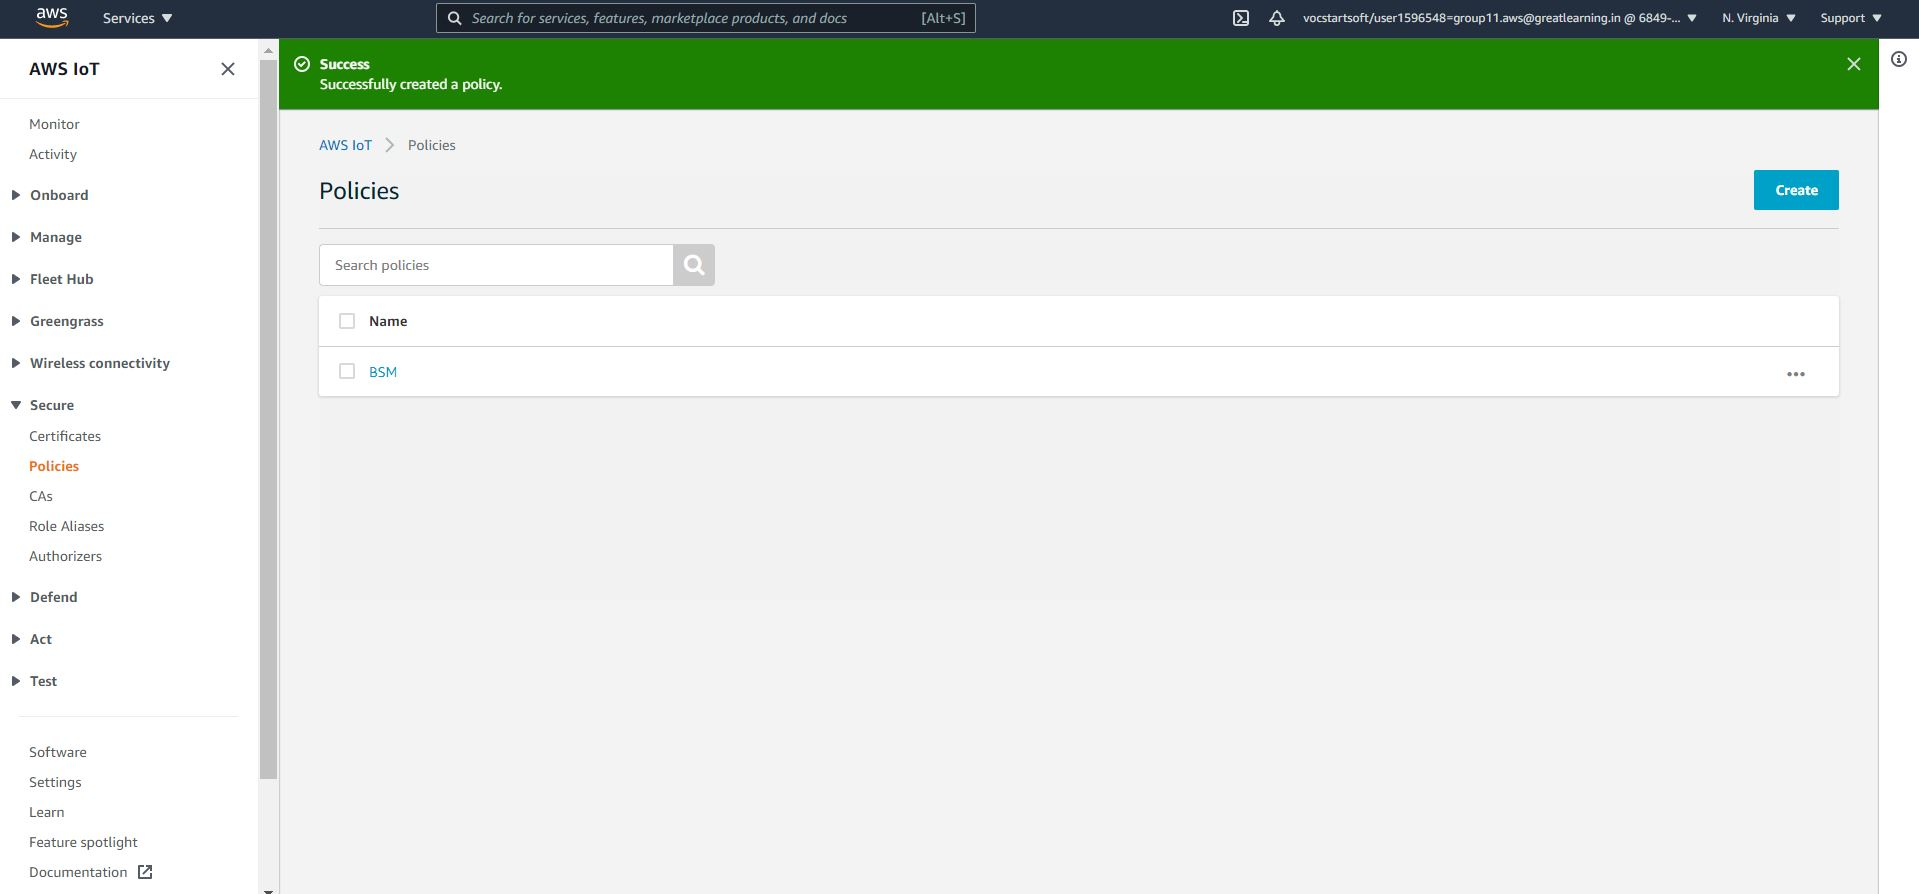

## <font color='blue'> AWS IoT Core : Thing Creation </font>

We have created `Types`, `Groups` & `Policy` for our thing. Now we should create our first thing in AWS IoT core. 

Please follow the below mentioned steps to create things.

1. Go to AWS IoT core and click on `Manage` and then choose `Things`. If you do not have any `Things` available in your AWS IoT core, it will look like the image below.

2. Click on `Create things`.

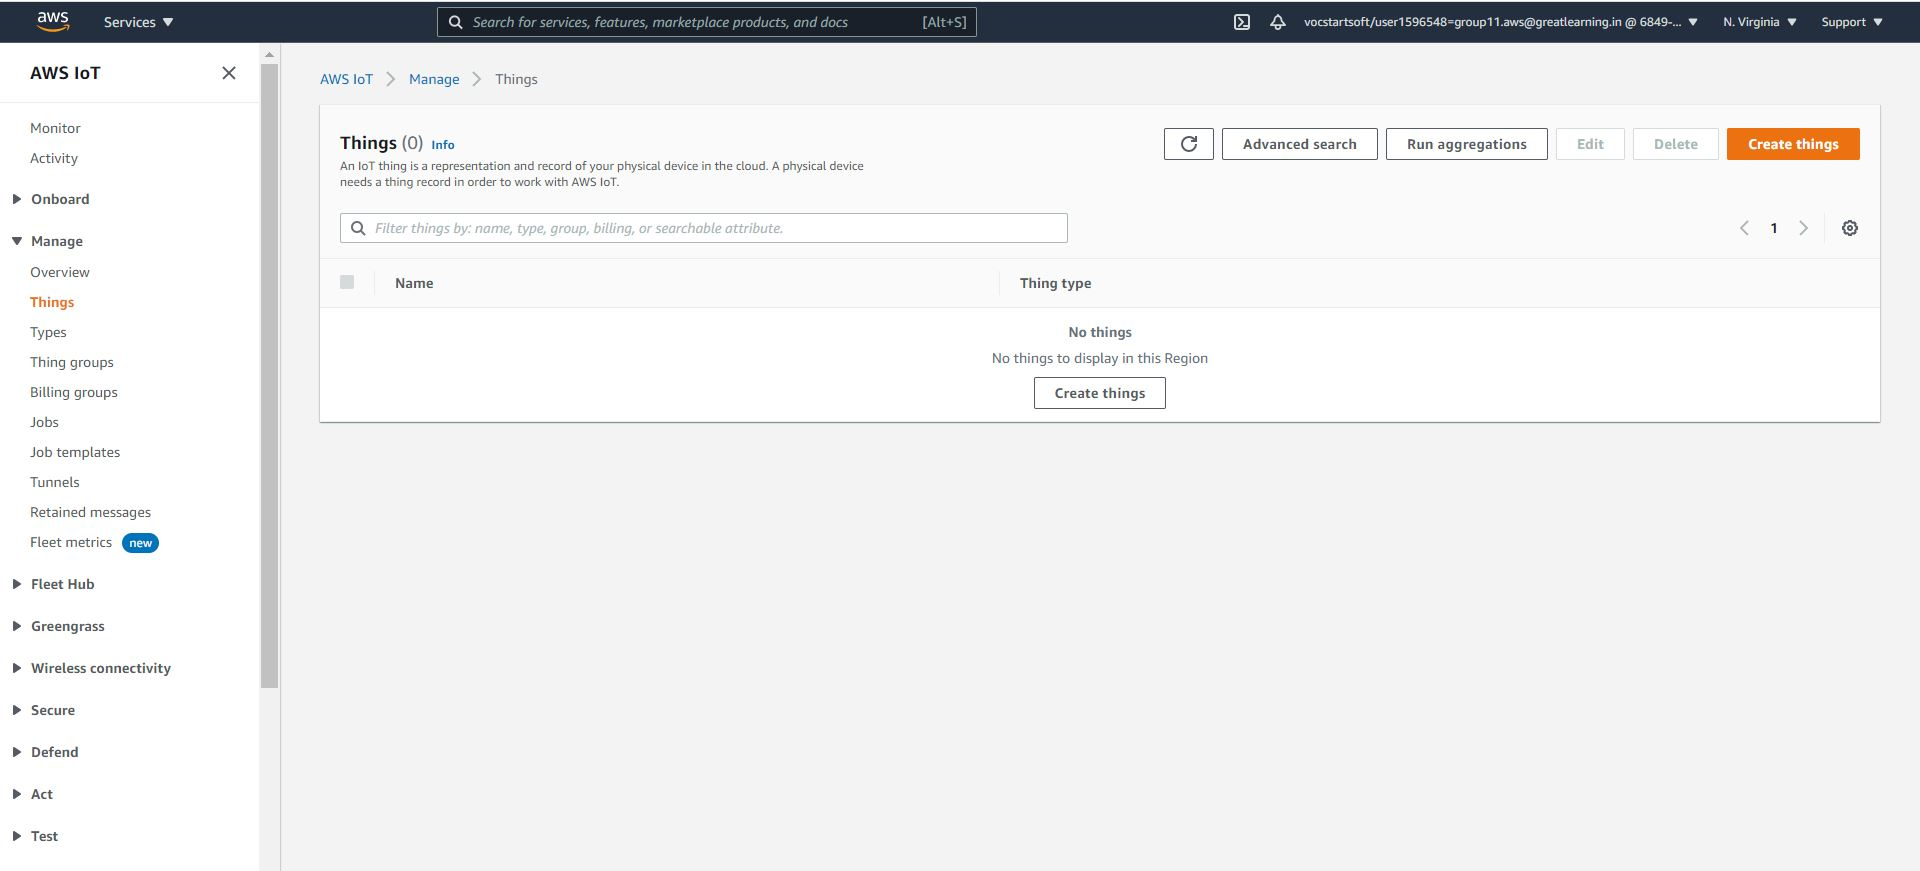


3. Click on `Create a single thing`. (Choose the first option)  

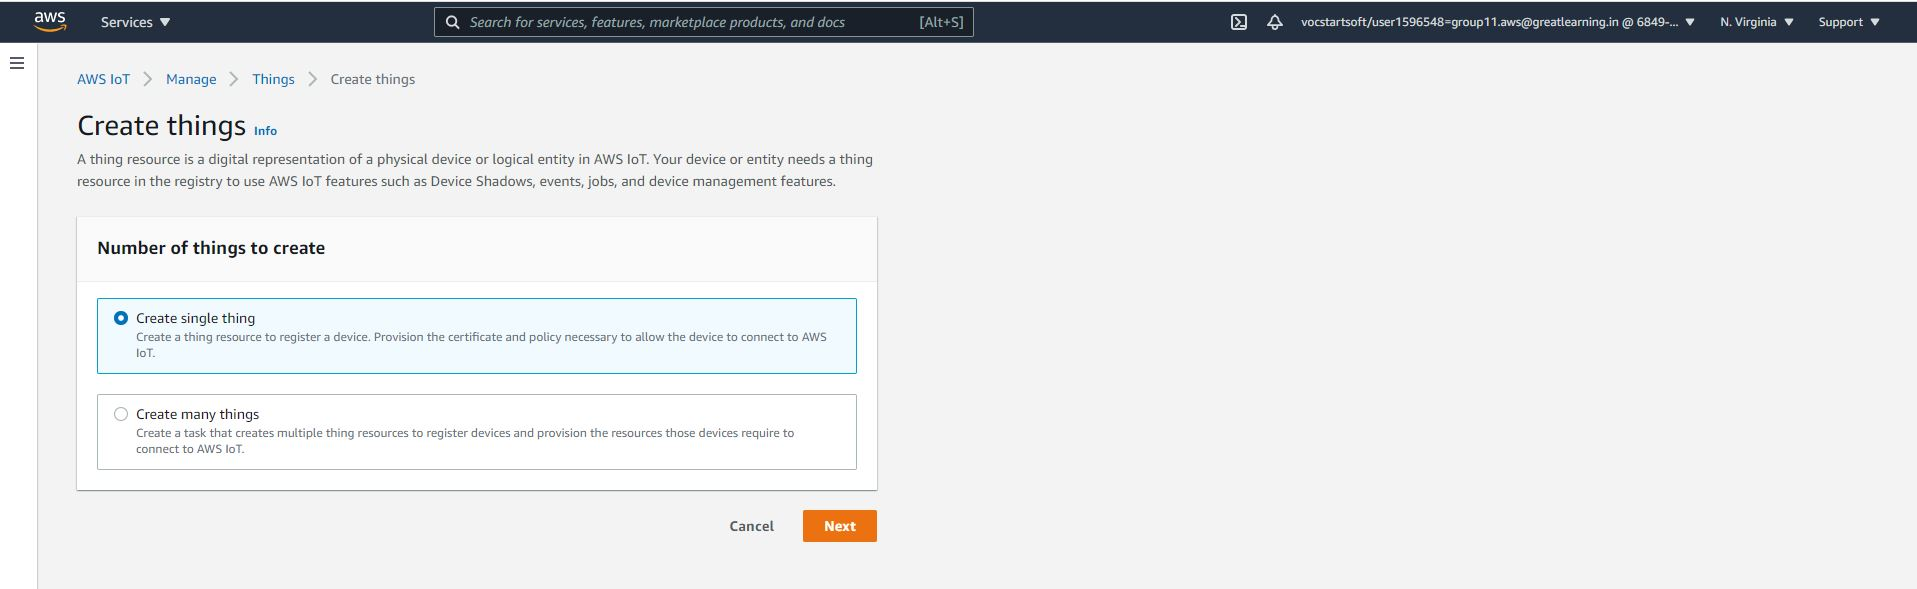

4. Enter the details for your thing such as `Thing name` (this is the equivalent of device id) and choose `Thing type` and add it into the `Thing groups` we created in previous steps.  Once done click on `Next`. 

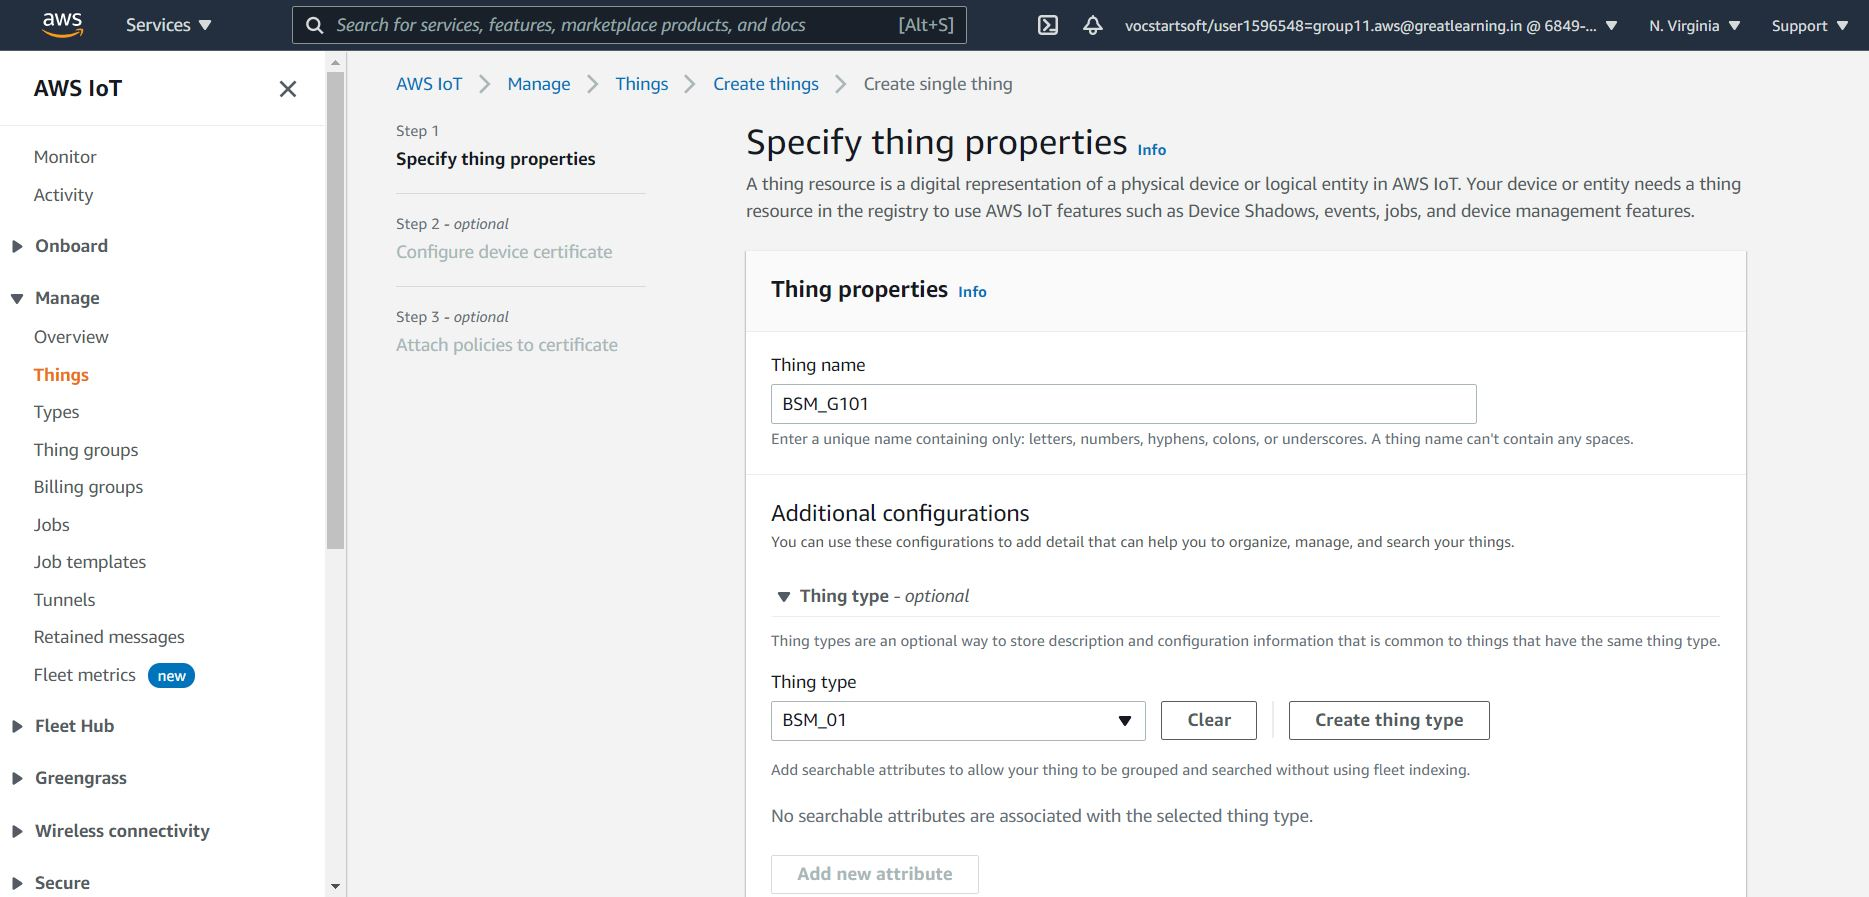


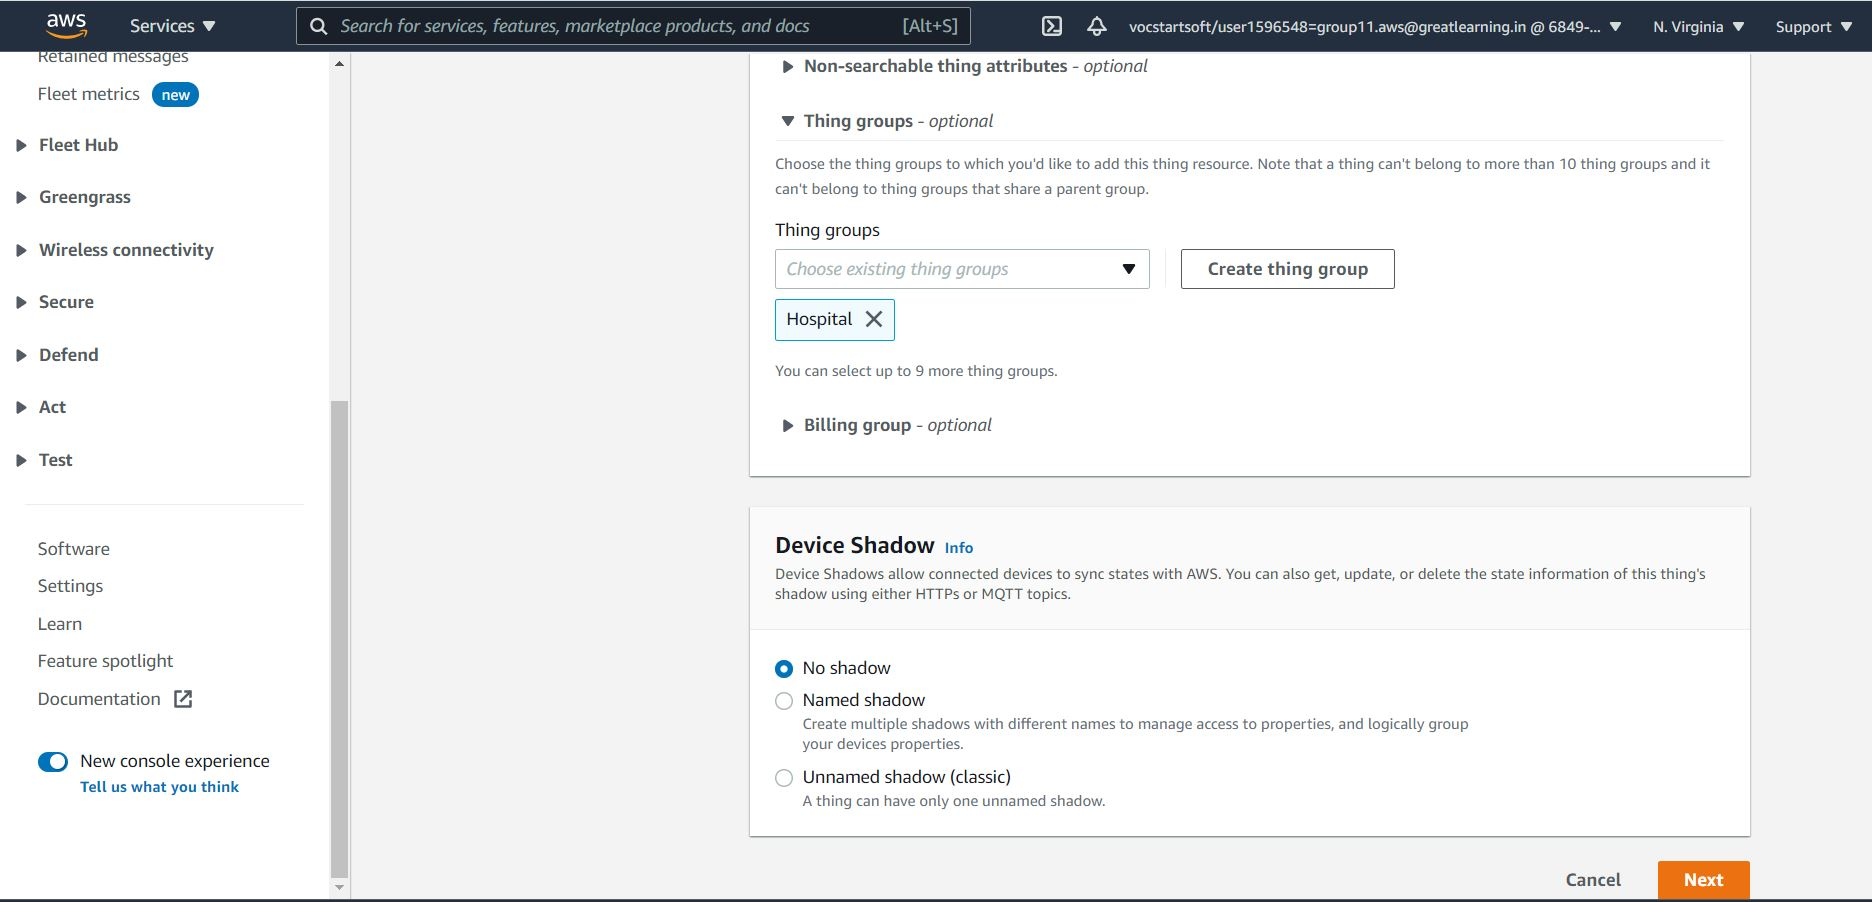

5. In this step we are going to create the certificates for thing. 
    * Click on the recommended option here to create the files in the next step. 
    
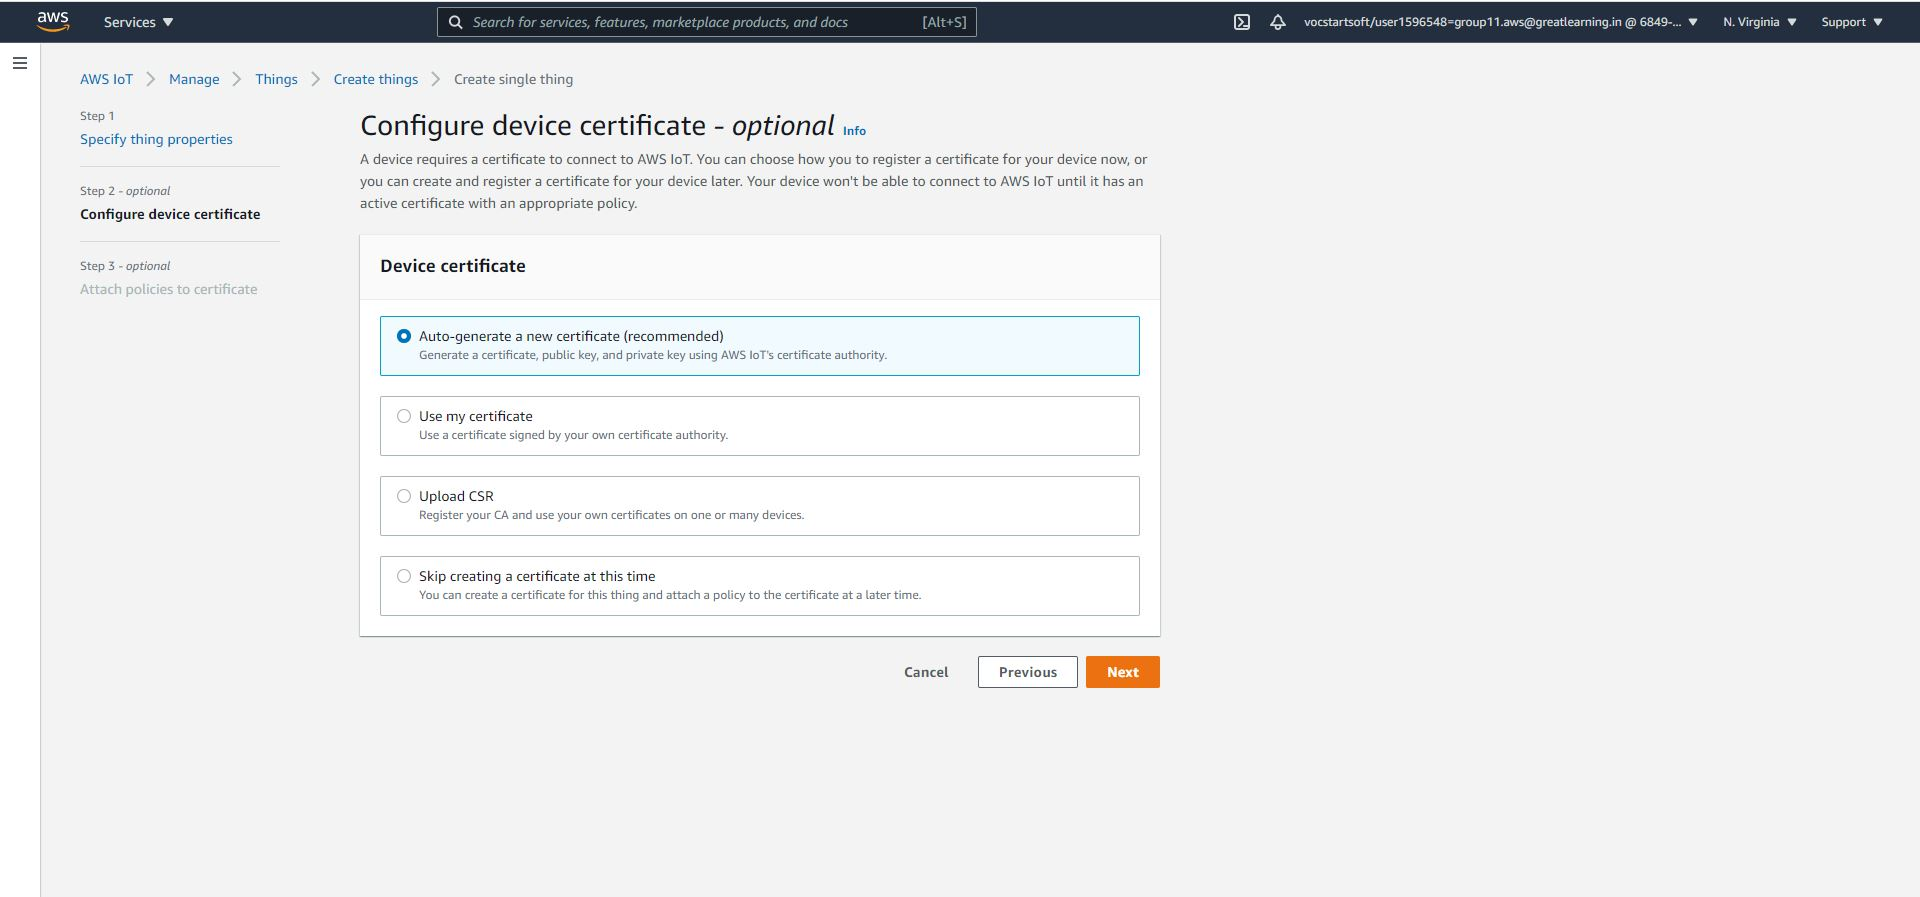

6. Here we need to attach the policy that we created in the previous step. Select the policy and click on `Create thing`.



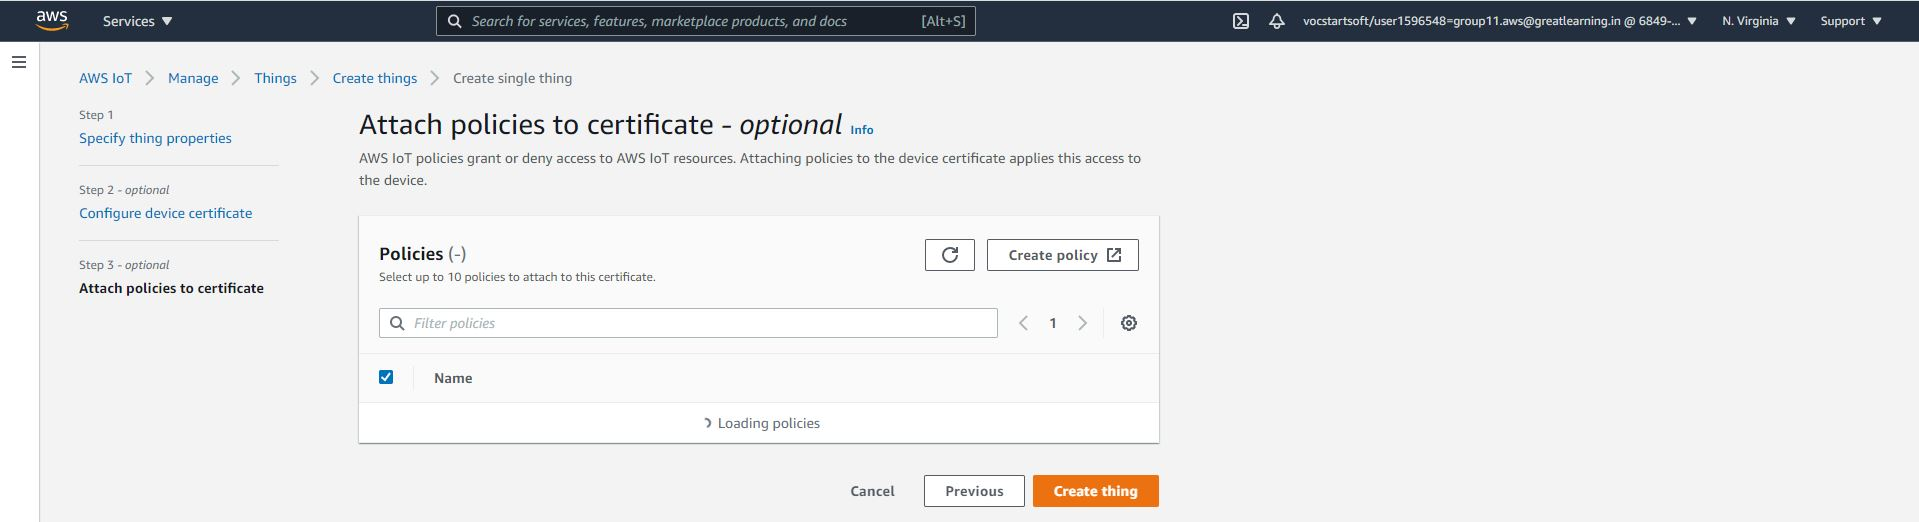

7. Once the policy is attached with the thing that we created a new window will open as follows:

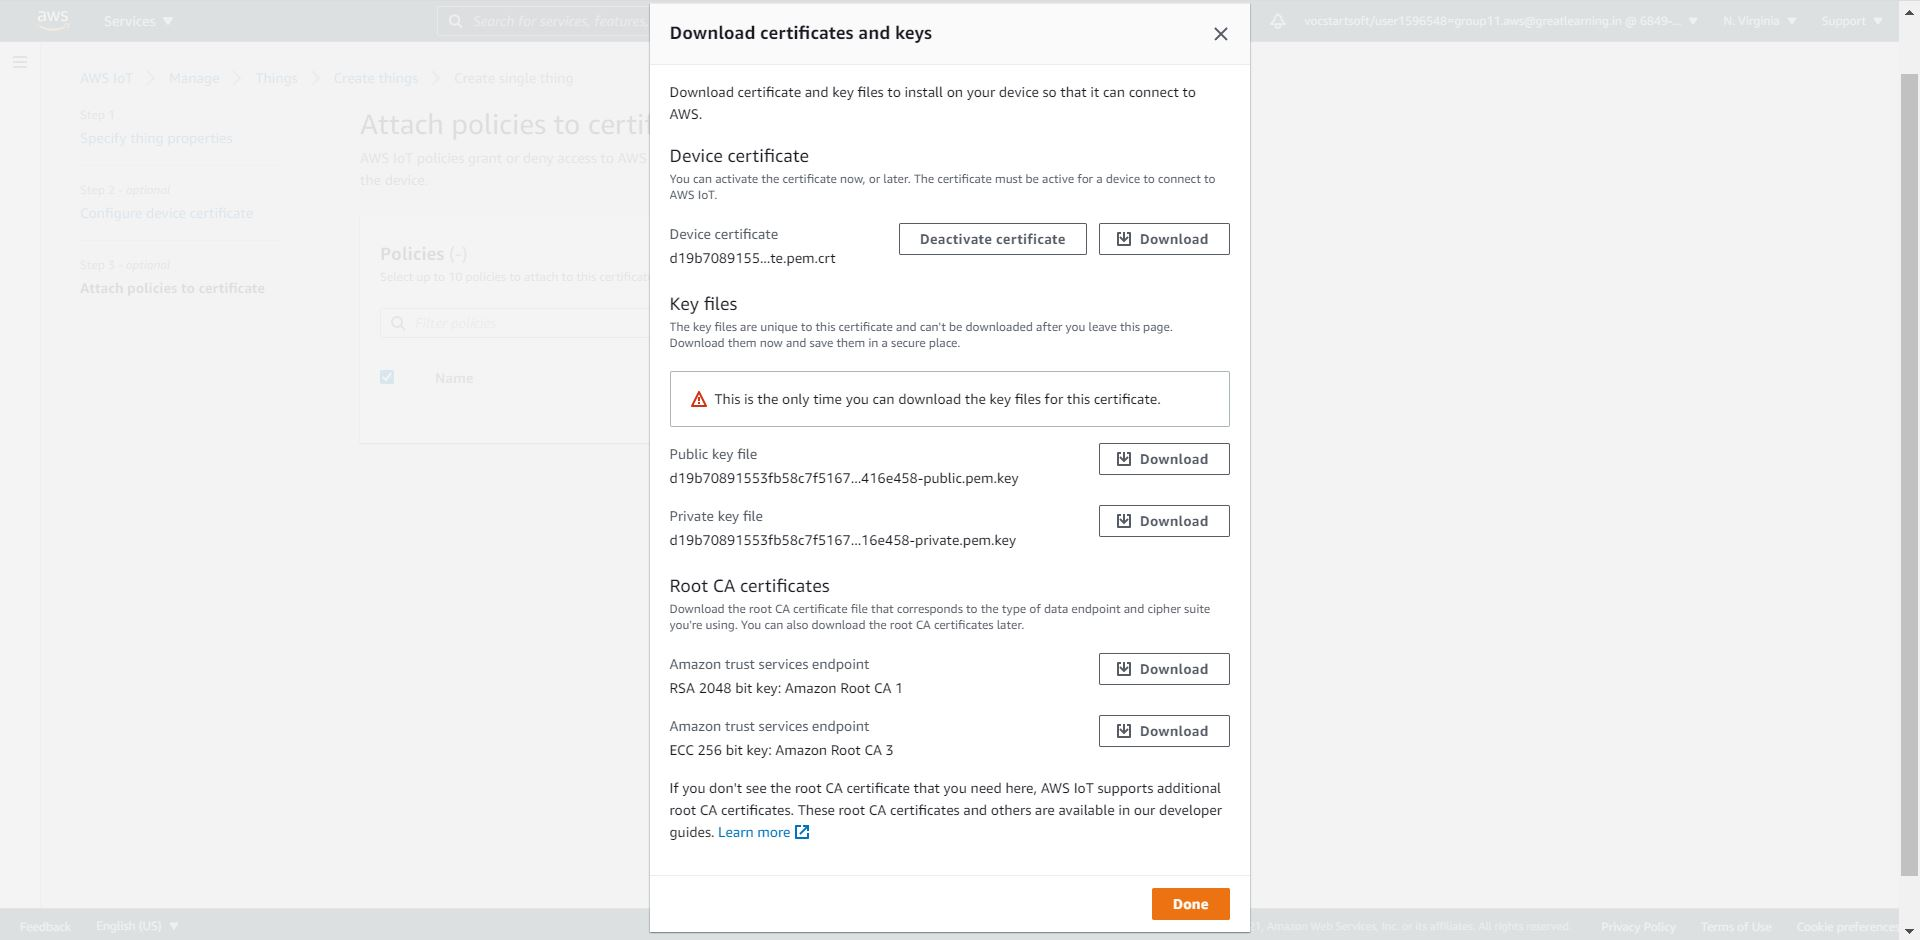


8. Make sure you download all the certificates such `Device certificate`, `Public key file`, `Private key file` and `Root certificates` (`RSA` and `ECC`). All the keys can be downloaded with a single click. (We will need these later).

9. Once all certificates are downloaded, then click on `Done` in the above step. Successful operation will create the `Thing` for you as follows-

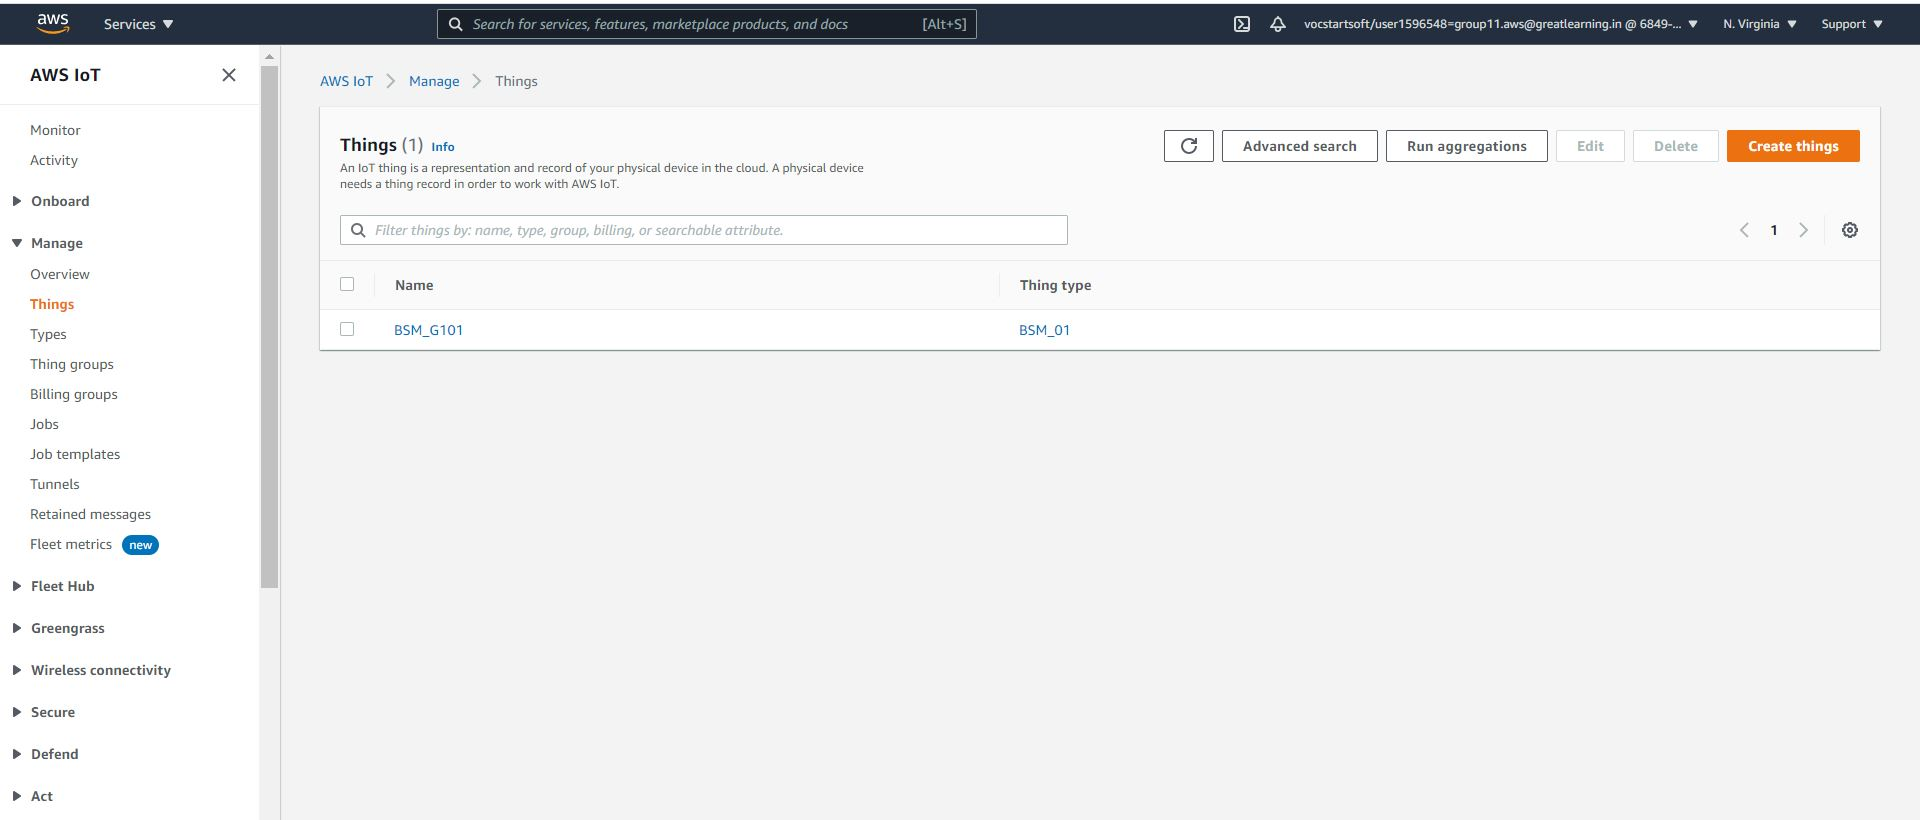

## <font color='blue'> Security: Certificates, Keys and Policies </font>


IoT Core provides a comprehensive infrastructure for authentication and authorization.

**Server Authentication:** When your devices connect to an endpoint on IoT Core, the device needs to be sure that it's connecting to the right server. AWS provides a root CA certificate that can be used to confirm this. This works similar to how a normal website https access works.

**Client Authentication:** When creating a device, AWS can create a certificate and public/private key pair to enable authentication of the device. It's recommended to use one certificate per device. These are used when connecting to the IoT Core endpoint so that the server can verify the client's authenticity.

**Authorization:** Authentication just confirms that the device communication is authentic and is mapped to a Thing created in IoT Core. It is still not allowed to do any actions without authorization. Authorization is provided by creating policies and attaching them to the client certificates. One policy can be mapped to multiple device certificates and hence multiple devices.

## <font color='blue'> Device Shadows </font>


Device Shadow is a concept to create a status map of a device. Different types of shadows can be created based on device types. Each shadow has a set of parameters which the device is supposed to provide. Each of these can have a desired state defined in addition to the current reported status. 

In addition to the normal data flow, devices have another communication path to regularly update their device shadows. These cached parameters called shadows can be used by any upstream service to get the device status without actively connecting to the device.

There are specific actions associated with shadow updates that need to be enabled in policies. In addition, these updates are published to a separate structured MQTT topic which is automatically mapped to the shadow.
1. To create a `Device Shadow`, click the `Thing` we previously created and goto `Device Shadow` tab. You will see a screen as follows-


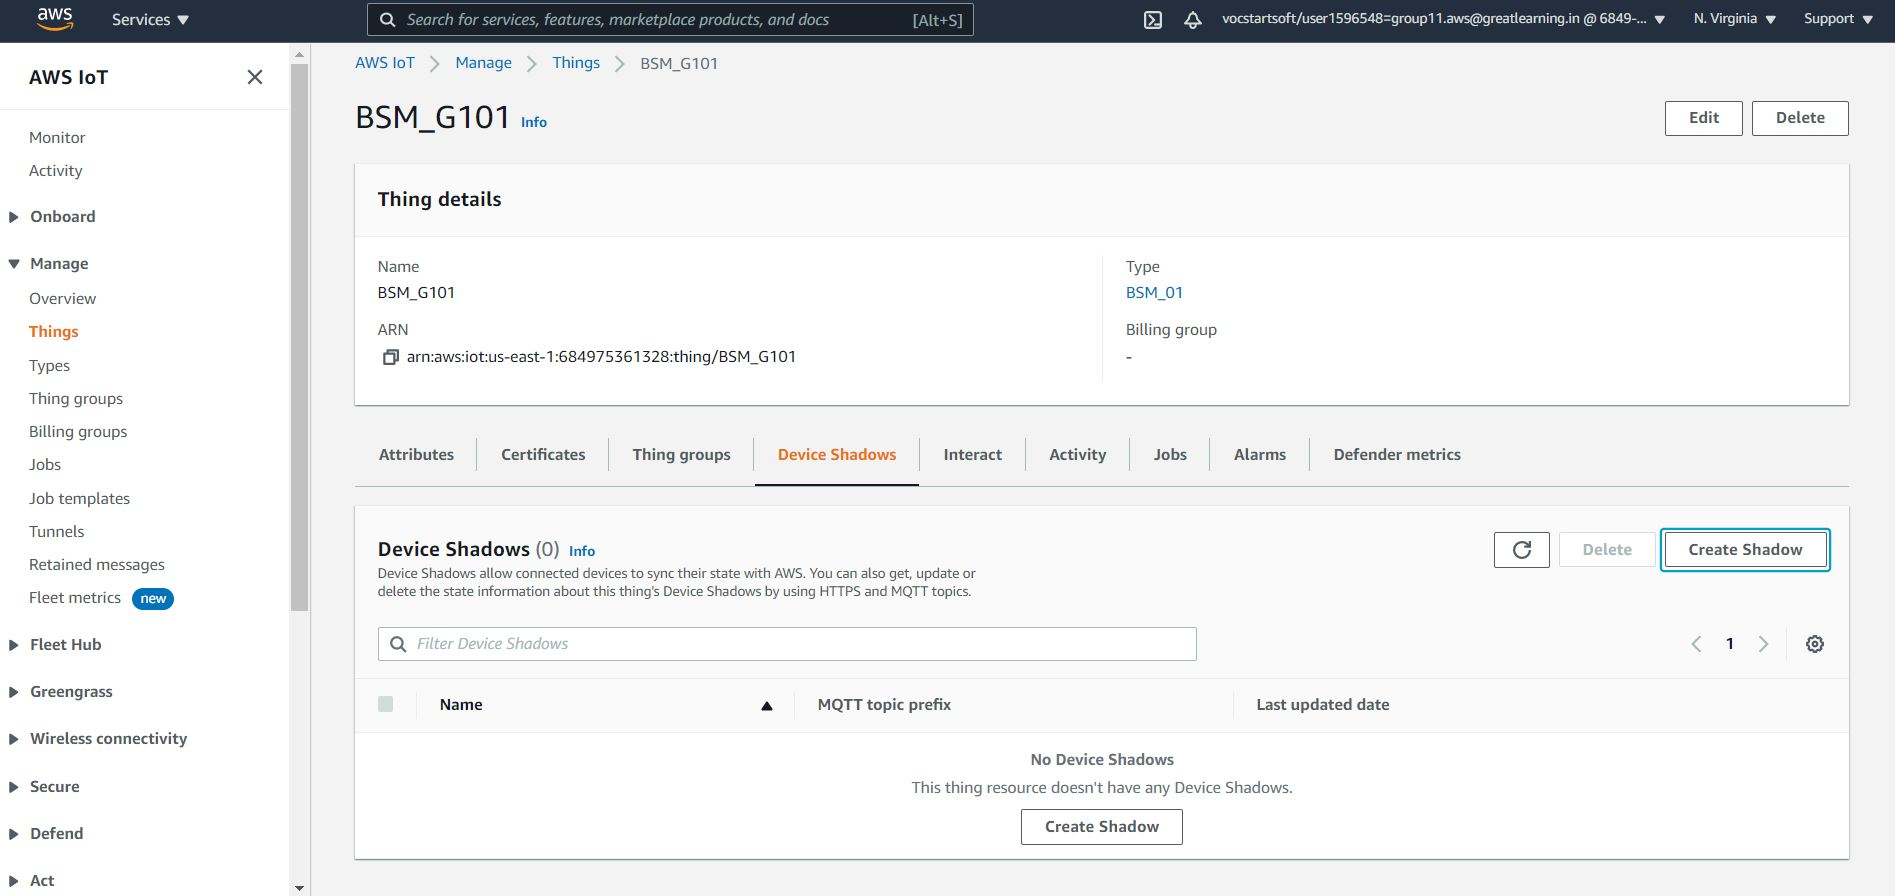

2. Click on `Create Shadow`, a new window will open as shown below. Give the shadow name and click on ` Create` button.

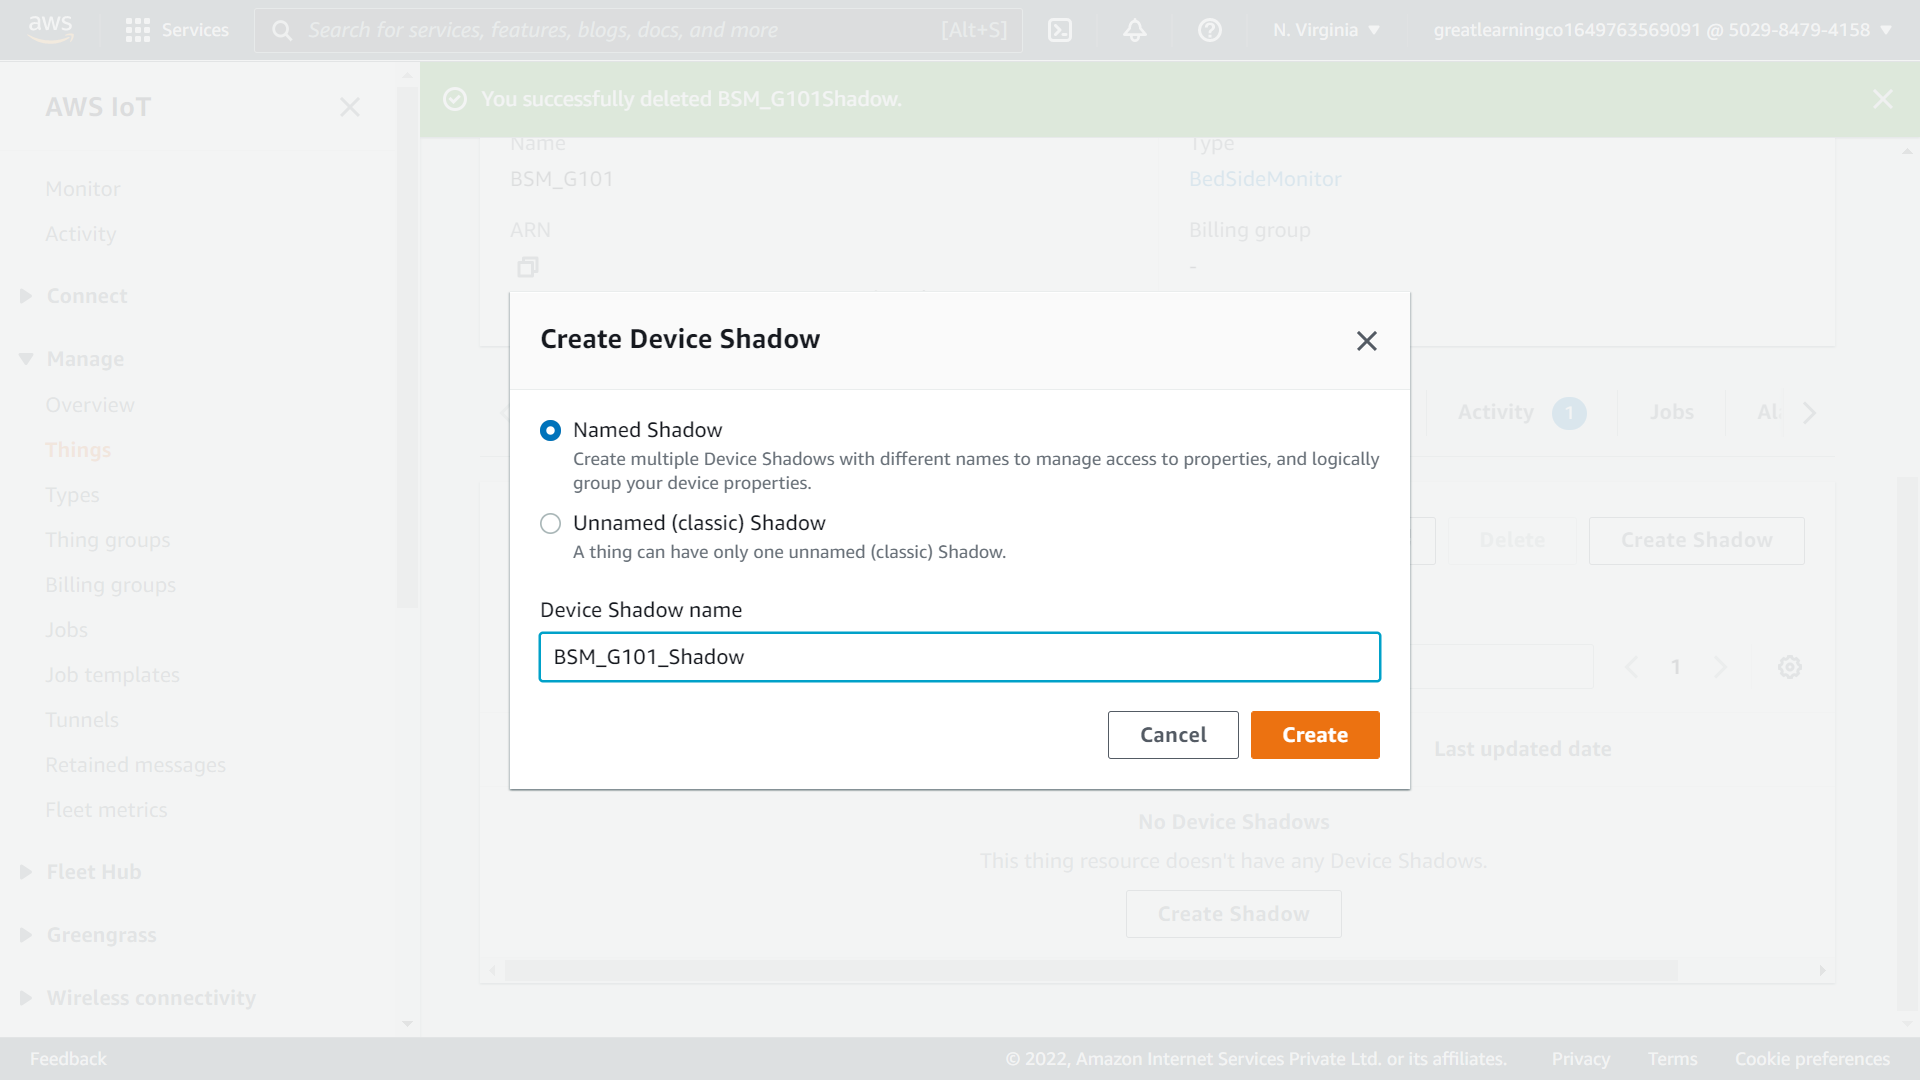




# <font color='blue'> AWS IoT Core : MQTT Test Client </font>

## <font color='blue'> MQTT Test Client: Command </font>

An IoT thing for the IoT types and group is created. Next step is to unzip the script to your local machine. This script will create the payload and push data in IoT Core.

The command which is required to run the script is mentioned below. 

Before running the actual script to push the data on AWS IoT core, ensure that all the libraries are installed on your local machine.

Install `AWS IoT SDK` library on your local machine. There are some other libraries such as `sched`, `random`, `time` etc. are also used. Please make sure that these libraries are also installed.  


You can install the AWS packages using pip command as follows-
```
pip install AWSIoTPythonSDK

pip install awsiotsdk
```

Once you have installed all the necessary libraries, let's execute the actual script.

1. Open the command prompt and navigate to the location where you have placed `BedSideMonitor.py` script file as shown below-

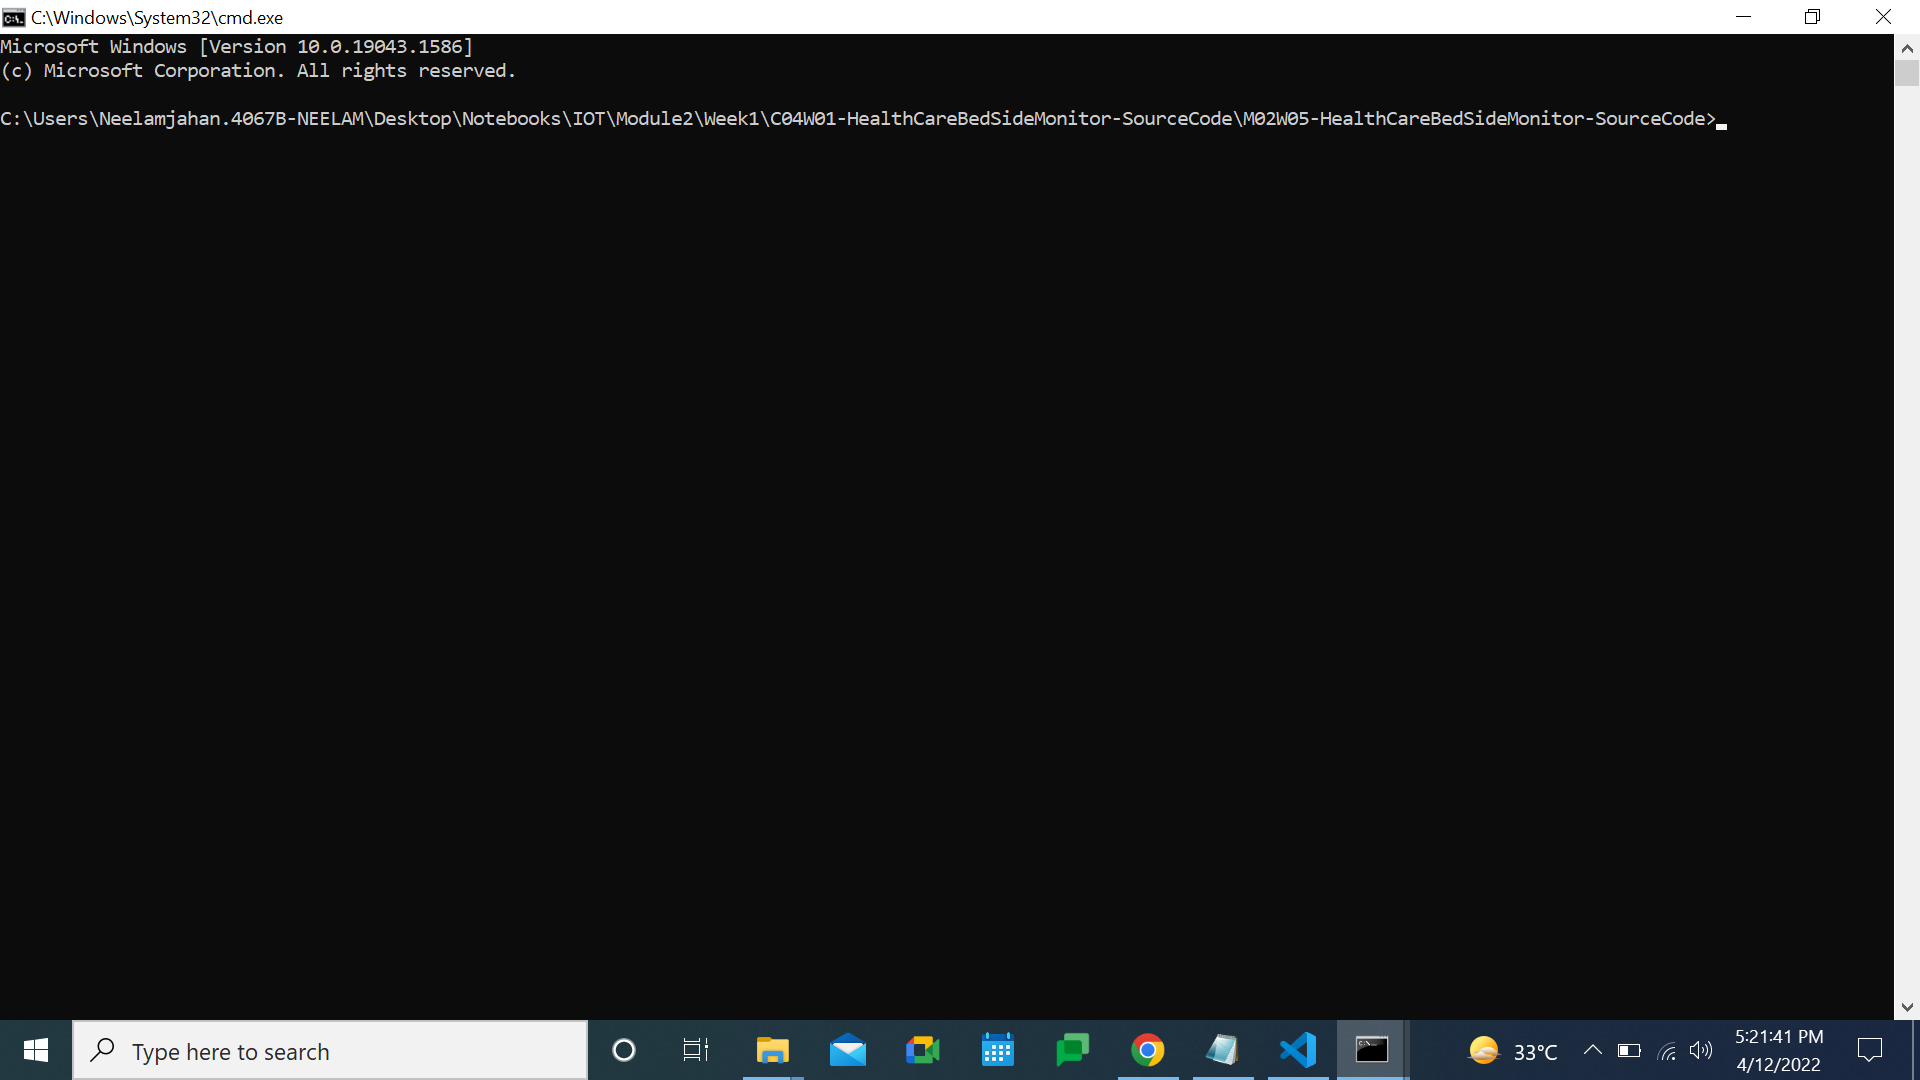

2. We need to execute the script file through command prompt with the command as shown below-
```
python BedSideMonitor.py -e endpoint -r Root_certificate -c Thing_Certificate -k Thing_private_key -id clientid -t topic_name
```

3. To execute the above command, we need `endpoint`, `Root_certificate`, `Thing_Certificate`, `Thing_private_key`, `clientid` and `topic_name`. Let's get all these one by one.

1. To get the endpoint click on the created `Thing`. It will take you to the next page, Now click on `Interact` tab. It will look similar to the following image. 

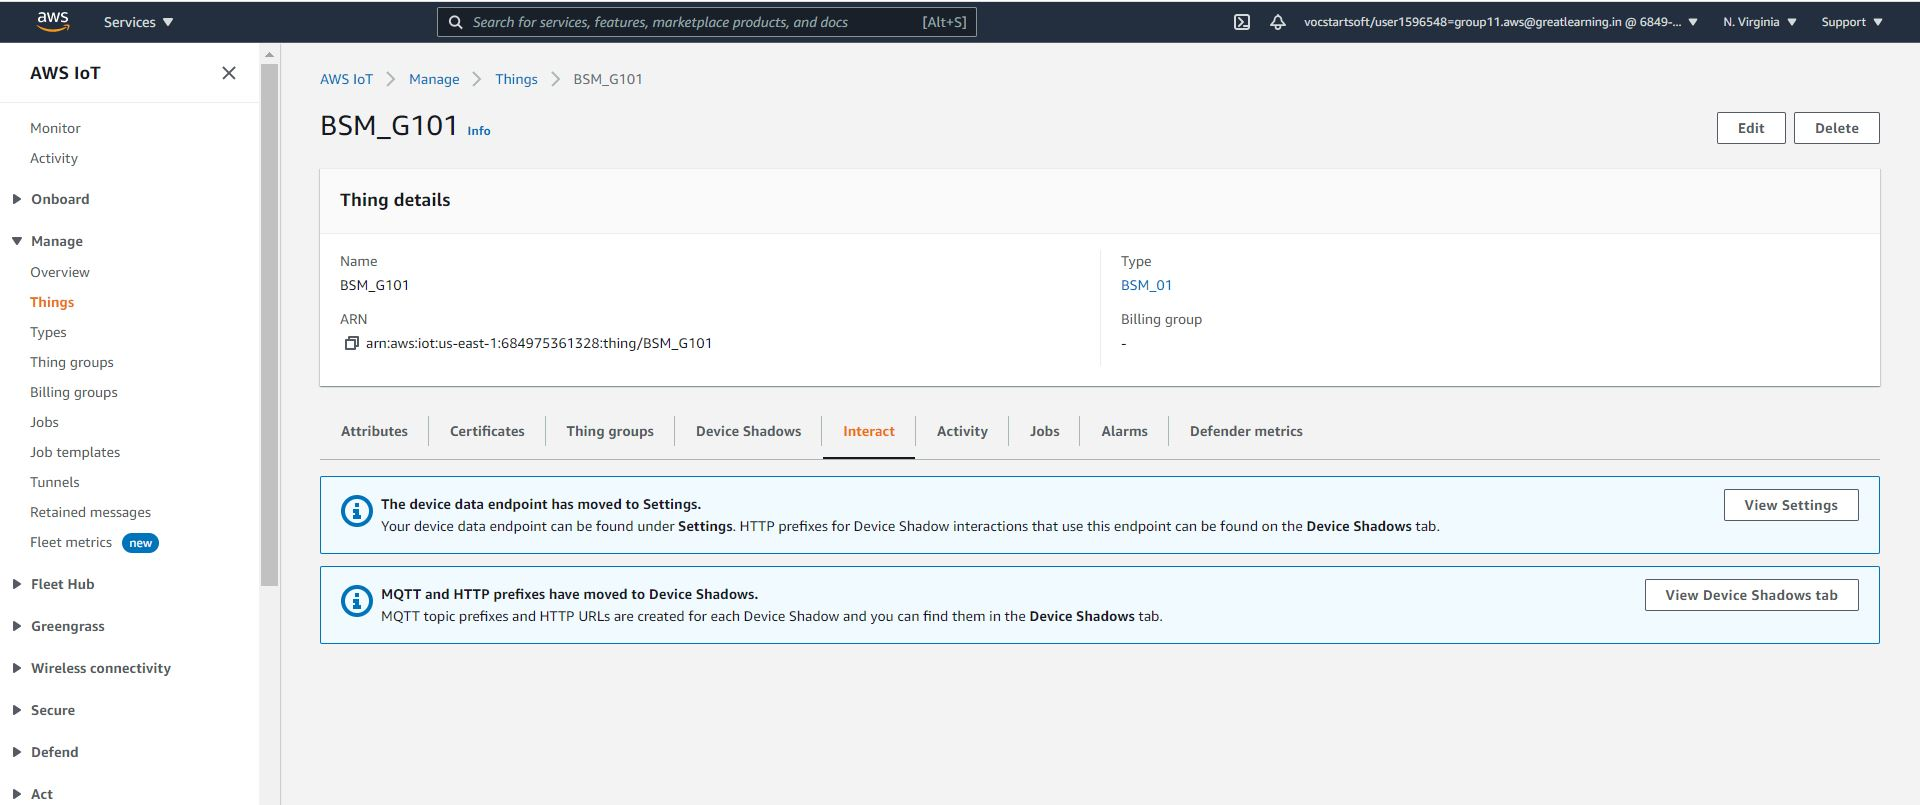

Click on `view settings`, it will take you to a new page similar to the following, copy the `endpoint` and save it for future reference. 

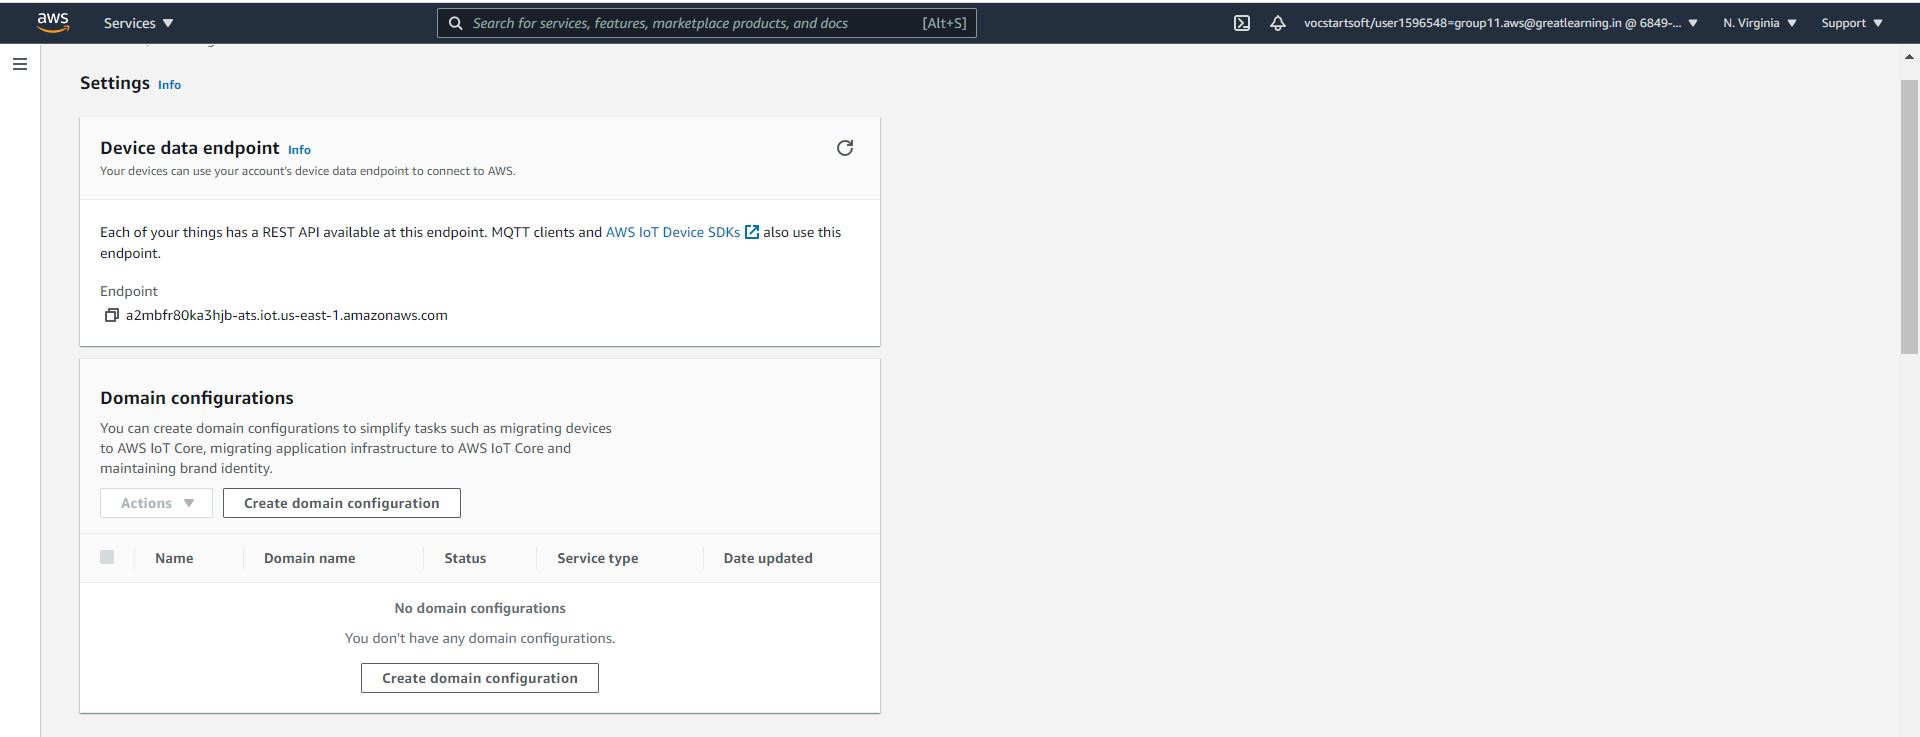

 
2. Certificates and keys are downloaded in the previous steps. 
    * We have 2 `Root certificates` downloaded (`RSA` and `ECC`). You can choose any one filename (`RSA` preferred).
    * Use `Device Certificate` filename as `Thing_Certificate`
    * Use `Private key` certificate filename for `Thing_private_key`
    * Either you can place all these certificate files in the same folder where your `BedSideMonitor.py` file is present or you can use the whole filepath while entering the command. (We have placed all certificates in the same folder).
3. clientid can be a normal string, make sure that different clientid is provided to send data or multiple devices
4. You can keep the `topic_name` that is easy to remember. Let's say `iot/bsm`

So finally, the command on command prompt should look similar to this-


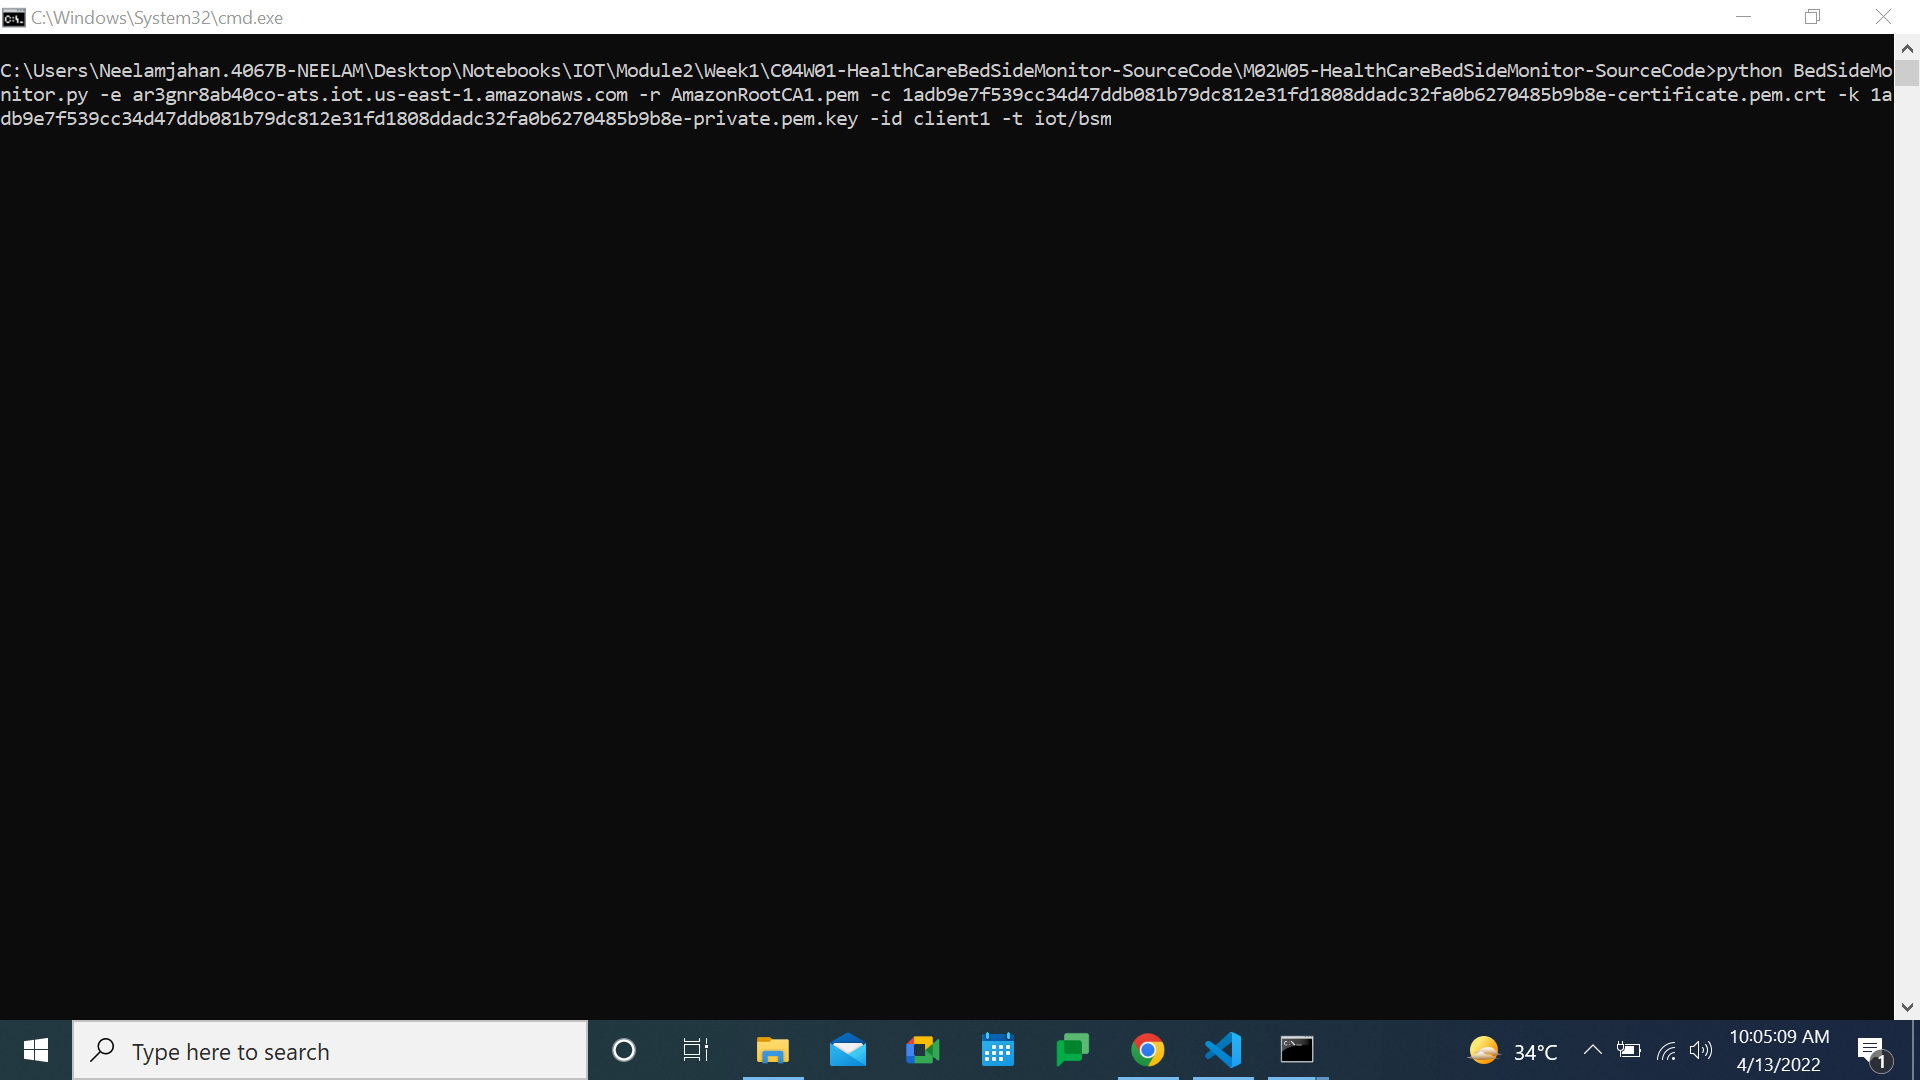


### <font color='blue'> MQTT Test Client: PubSub </font>

In this section, we are going to ensure that we are receiving data fom our thing in the IoT core. 

Follow the these steps to view the data on AWS IoT core using MQTT test client. 

1. Click on the `Test` section and choose `MQTT test client`. 
2. Now Enter the topic name which you have provided in the command. 
3. Click on `Subscribe` to topic button. 

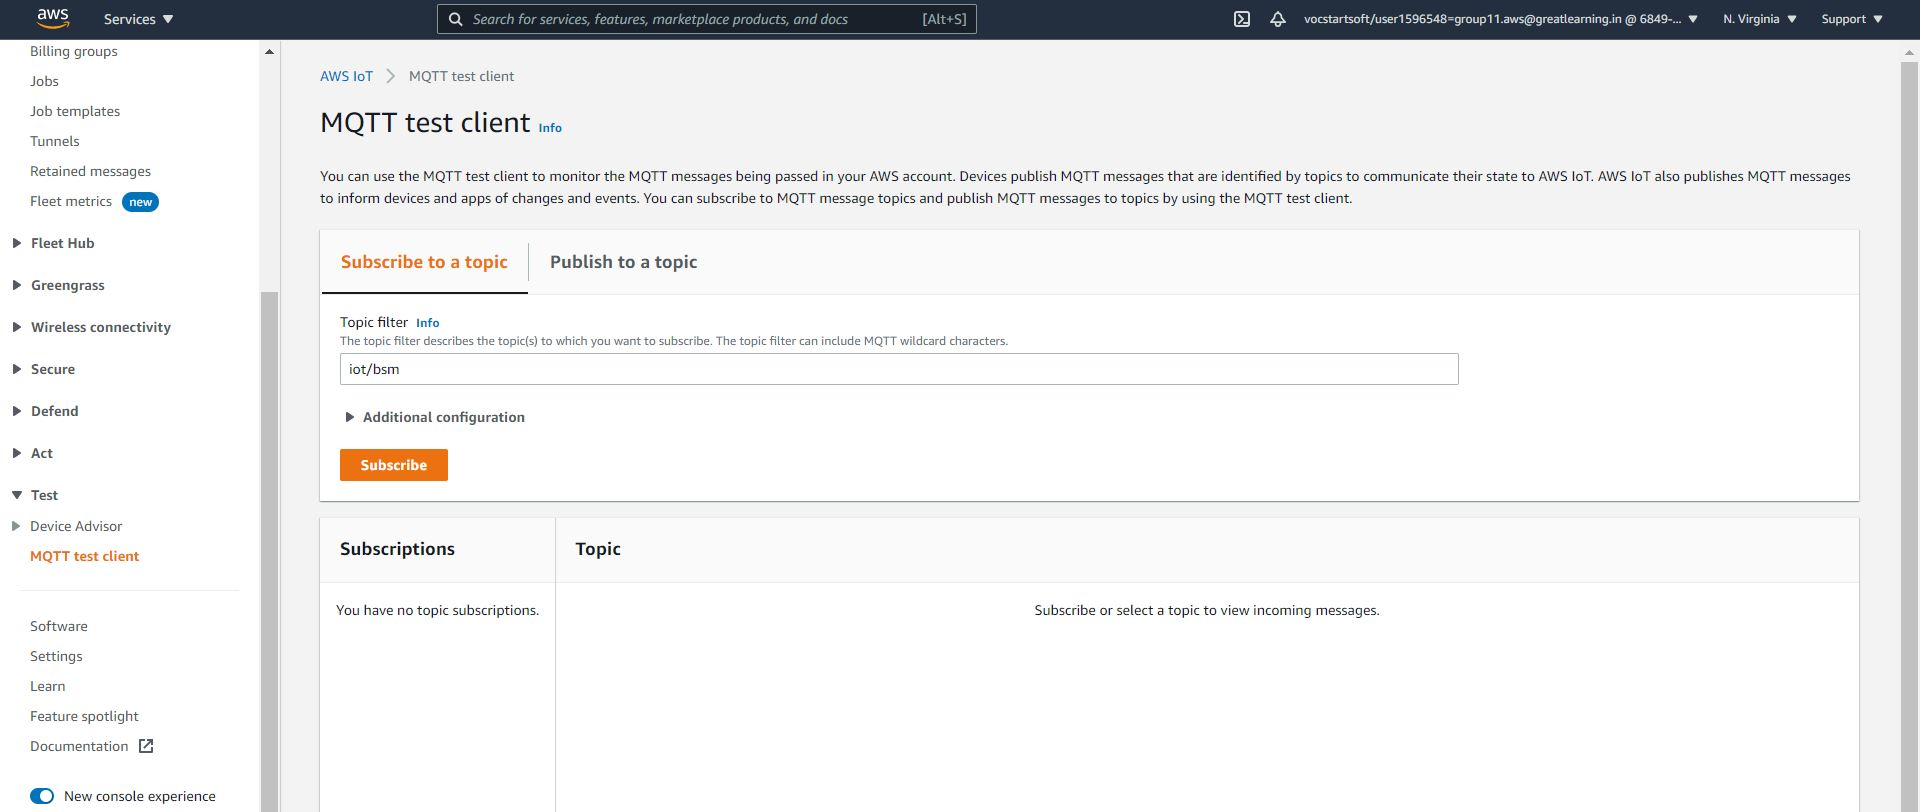


4. Once the operation is successful, you can see the data in the same window. An example image is mentioned below: 

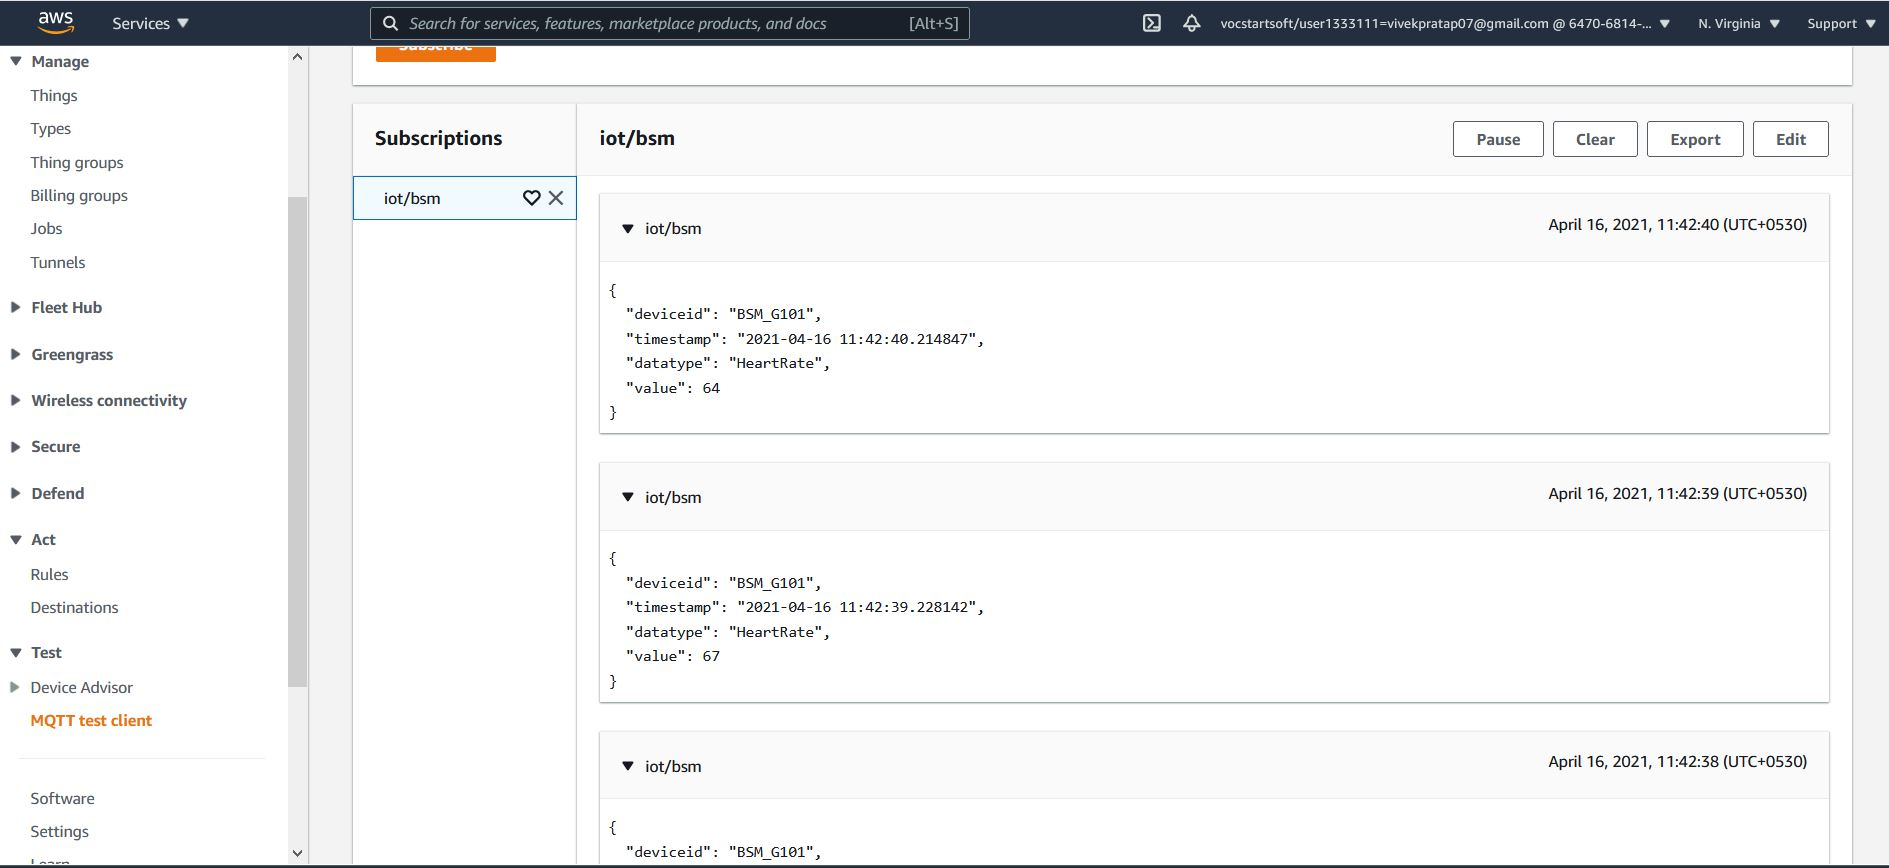




We have successfully executed the script and able to Subscribe the data on MQTT test client. 

Merely seeing the data is not the final step, of course. Storing the data for the future analysis is the main use case.

AWS provides a method which enables you to create a table in DynamoDB and create a rule in AWS IoT core to push the data in the DynamoDB table. 

You can stop the script execution. Lets move on to the Table and Rule creation for our thing. 


# <font color='blue'> AWS DynamoDB : Table Creation </font>

Lets create the table to store the data. Follow the below mentioned steps to create the table. 

1. From AWS console, search for `DynamoDB` service in `Database` service and choose the correct option. 
2. The page will appear as mentioned below. 
3. Here click on `Create table` to start the table creation process. 

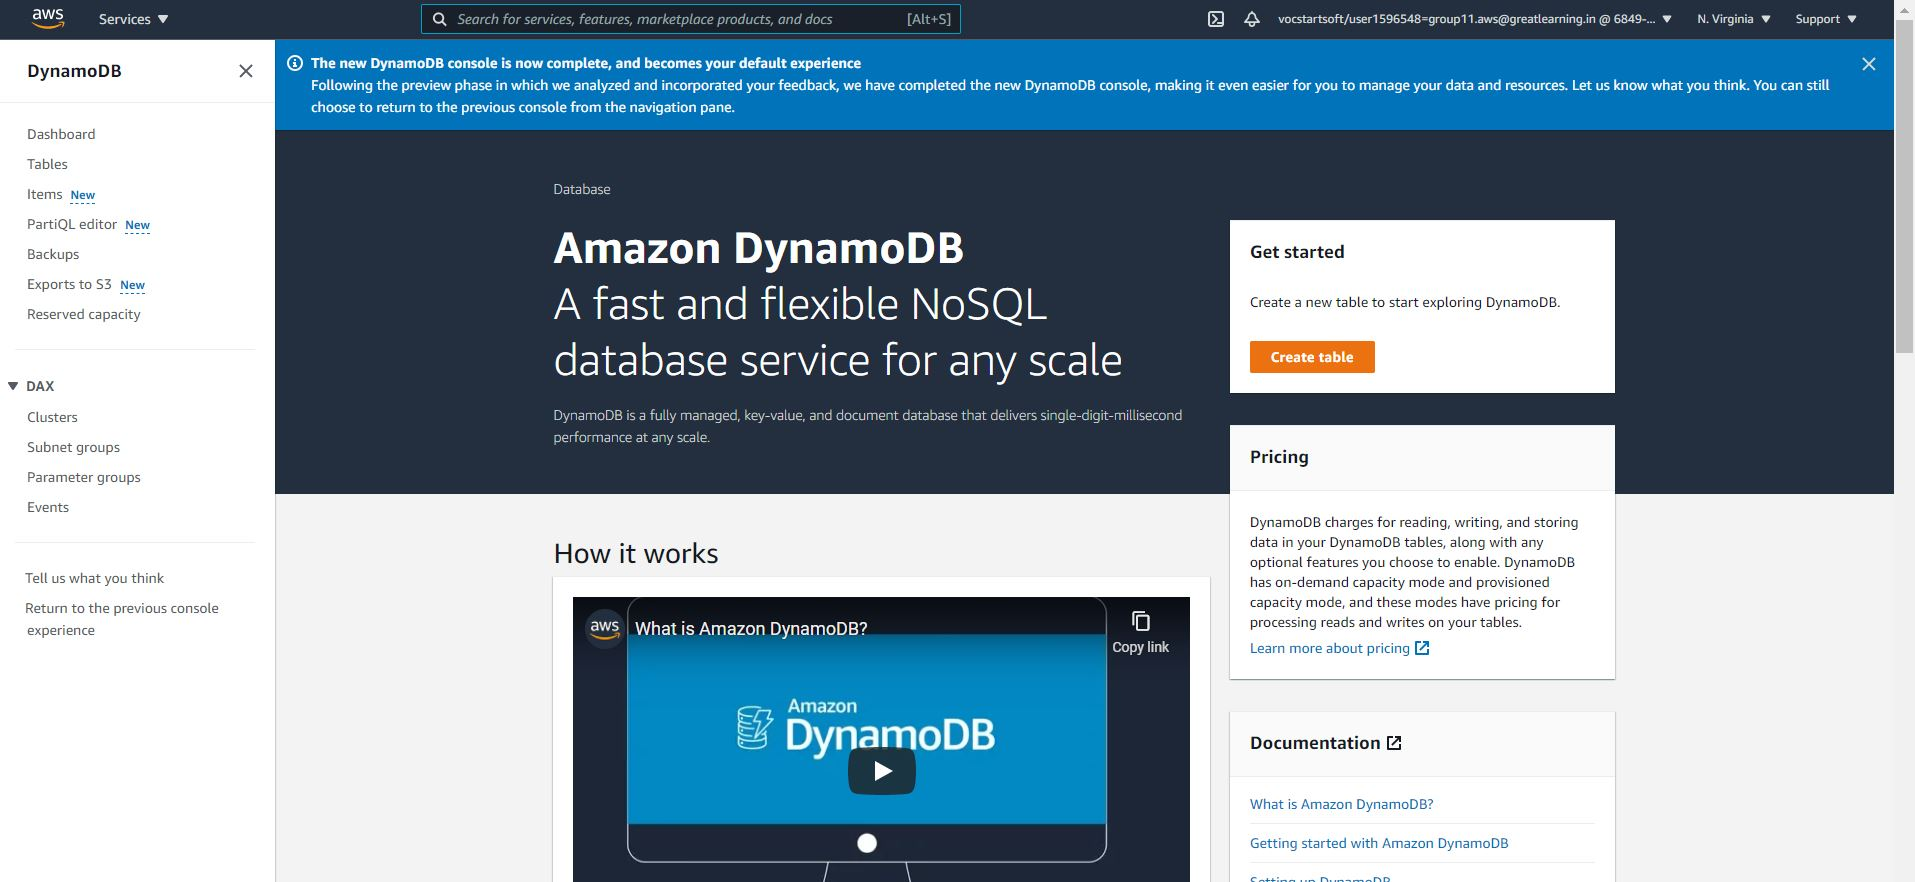

4. In this page enter the details such as `table_ name`, `partition key` and `sort key`. Here we have provided partition key as `deviceid` & sort key as `timestamp`. Here combination of `deviceid` & `timestamp` will become Primary key.  
5. Click on `Create table`. 

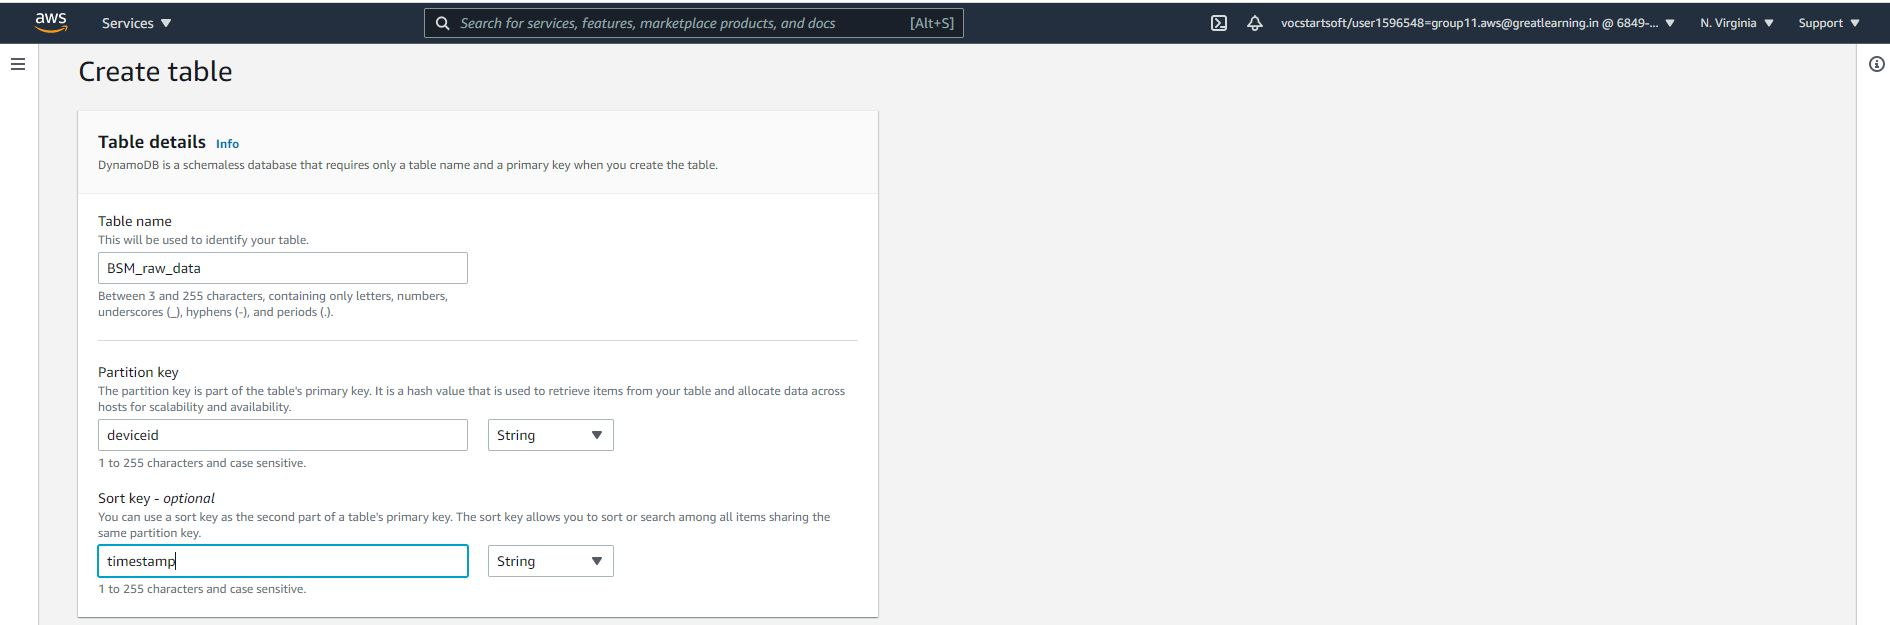



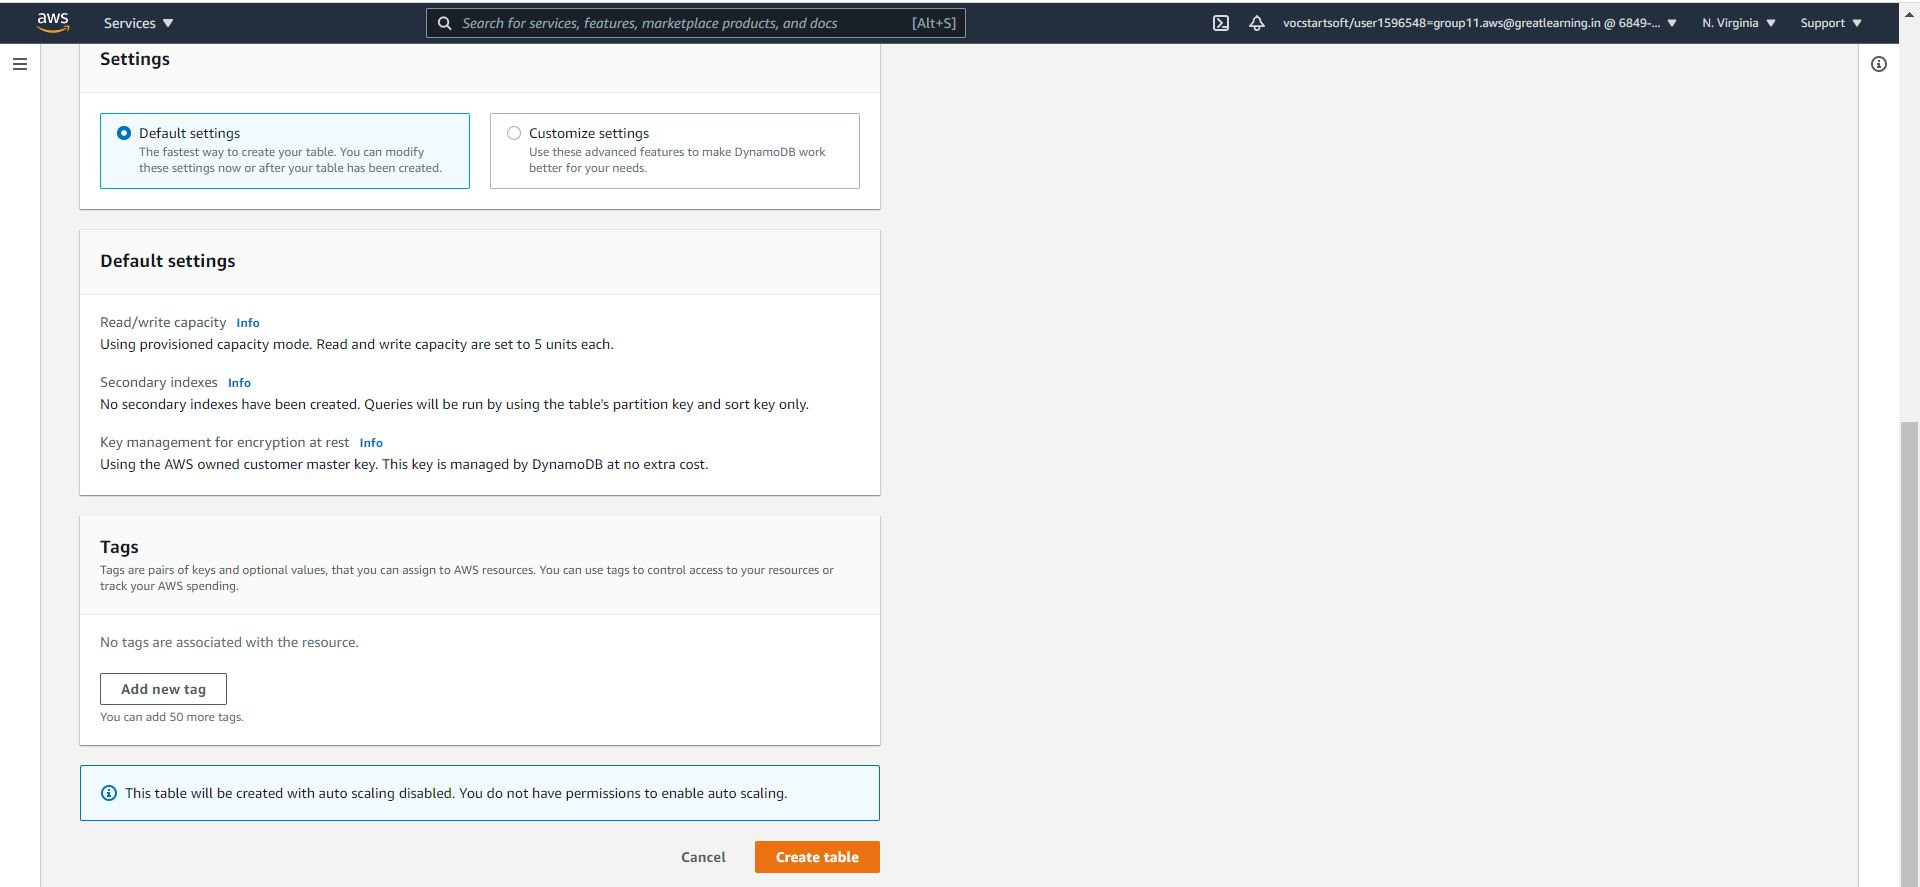

6. Successful table creation in DynamoDB will appear as mentioned in the following image. 

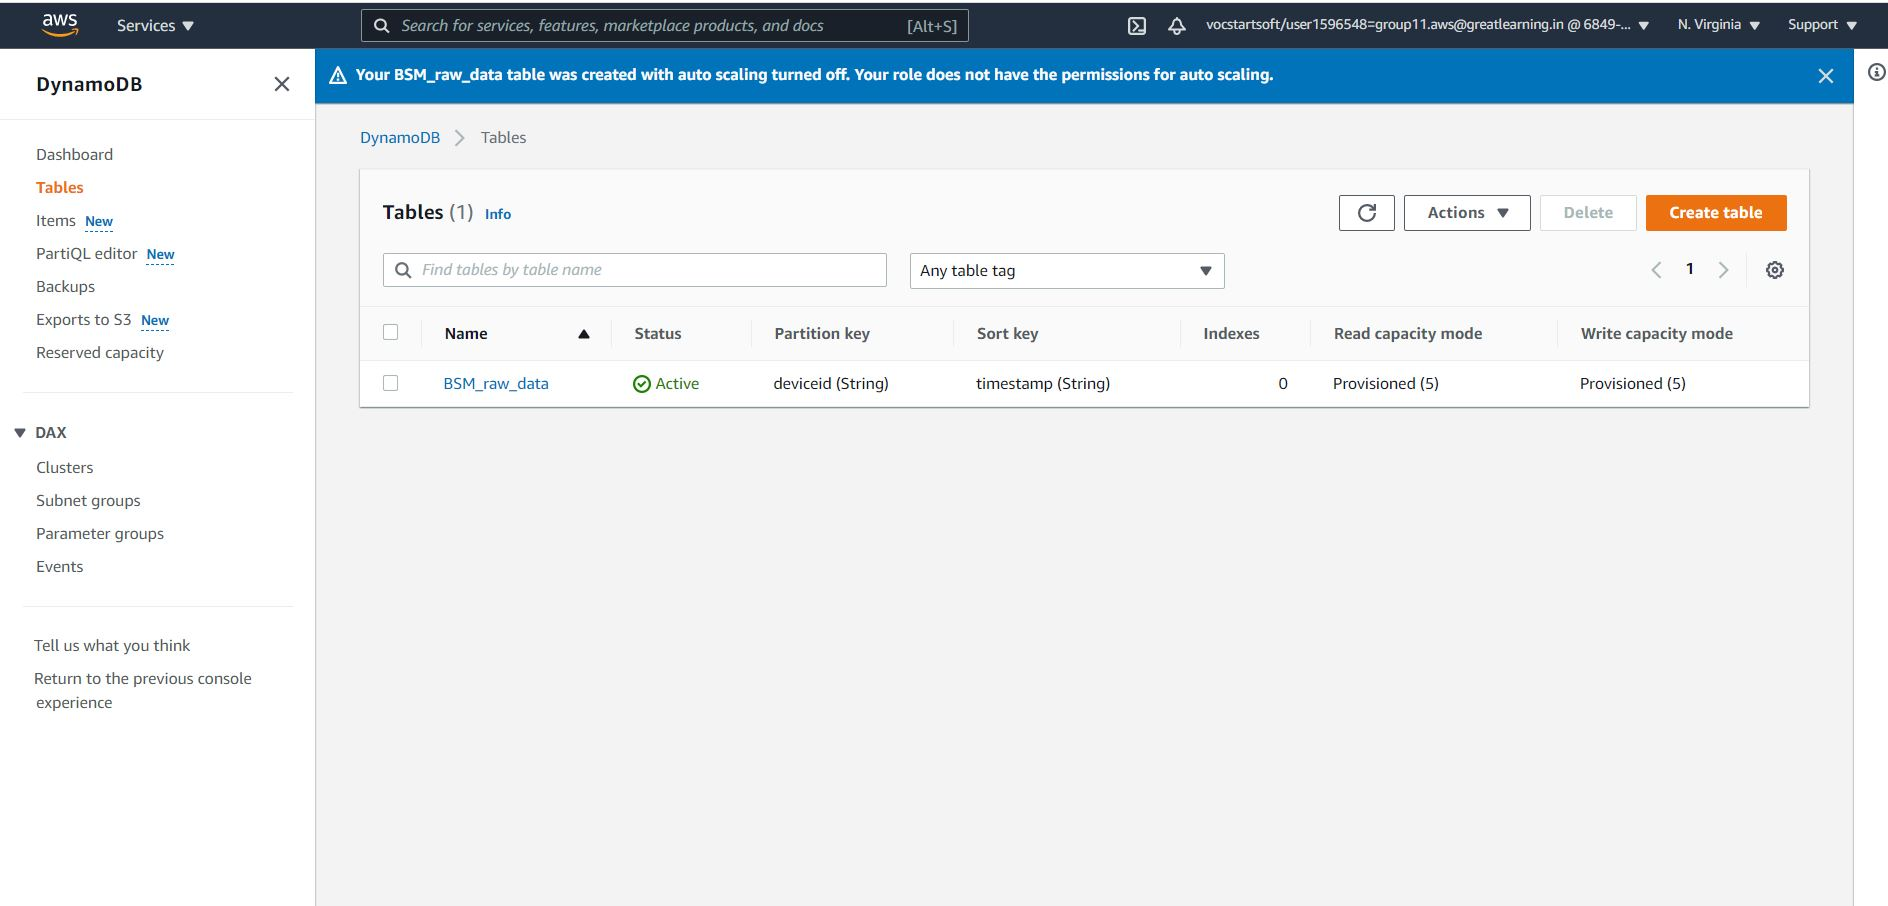

## <font color='blue'> AWS IAM Role Creation </font>

To create a new role follow these steps-
    
1. On AWS console search for `IAM` service and click on `Roles` option.

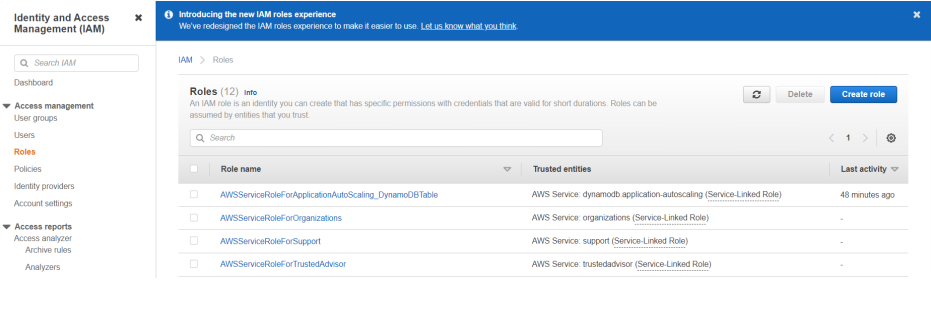
    
2. Click on `Create role`, you will get a screen as follows-

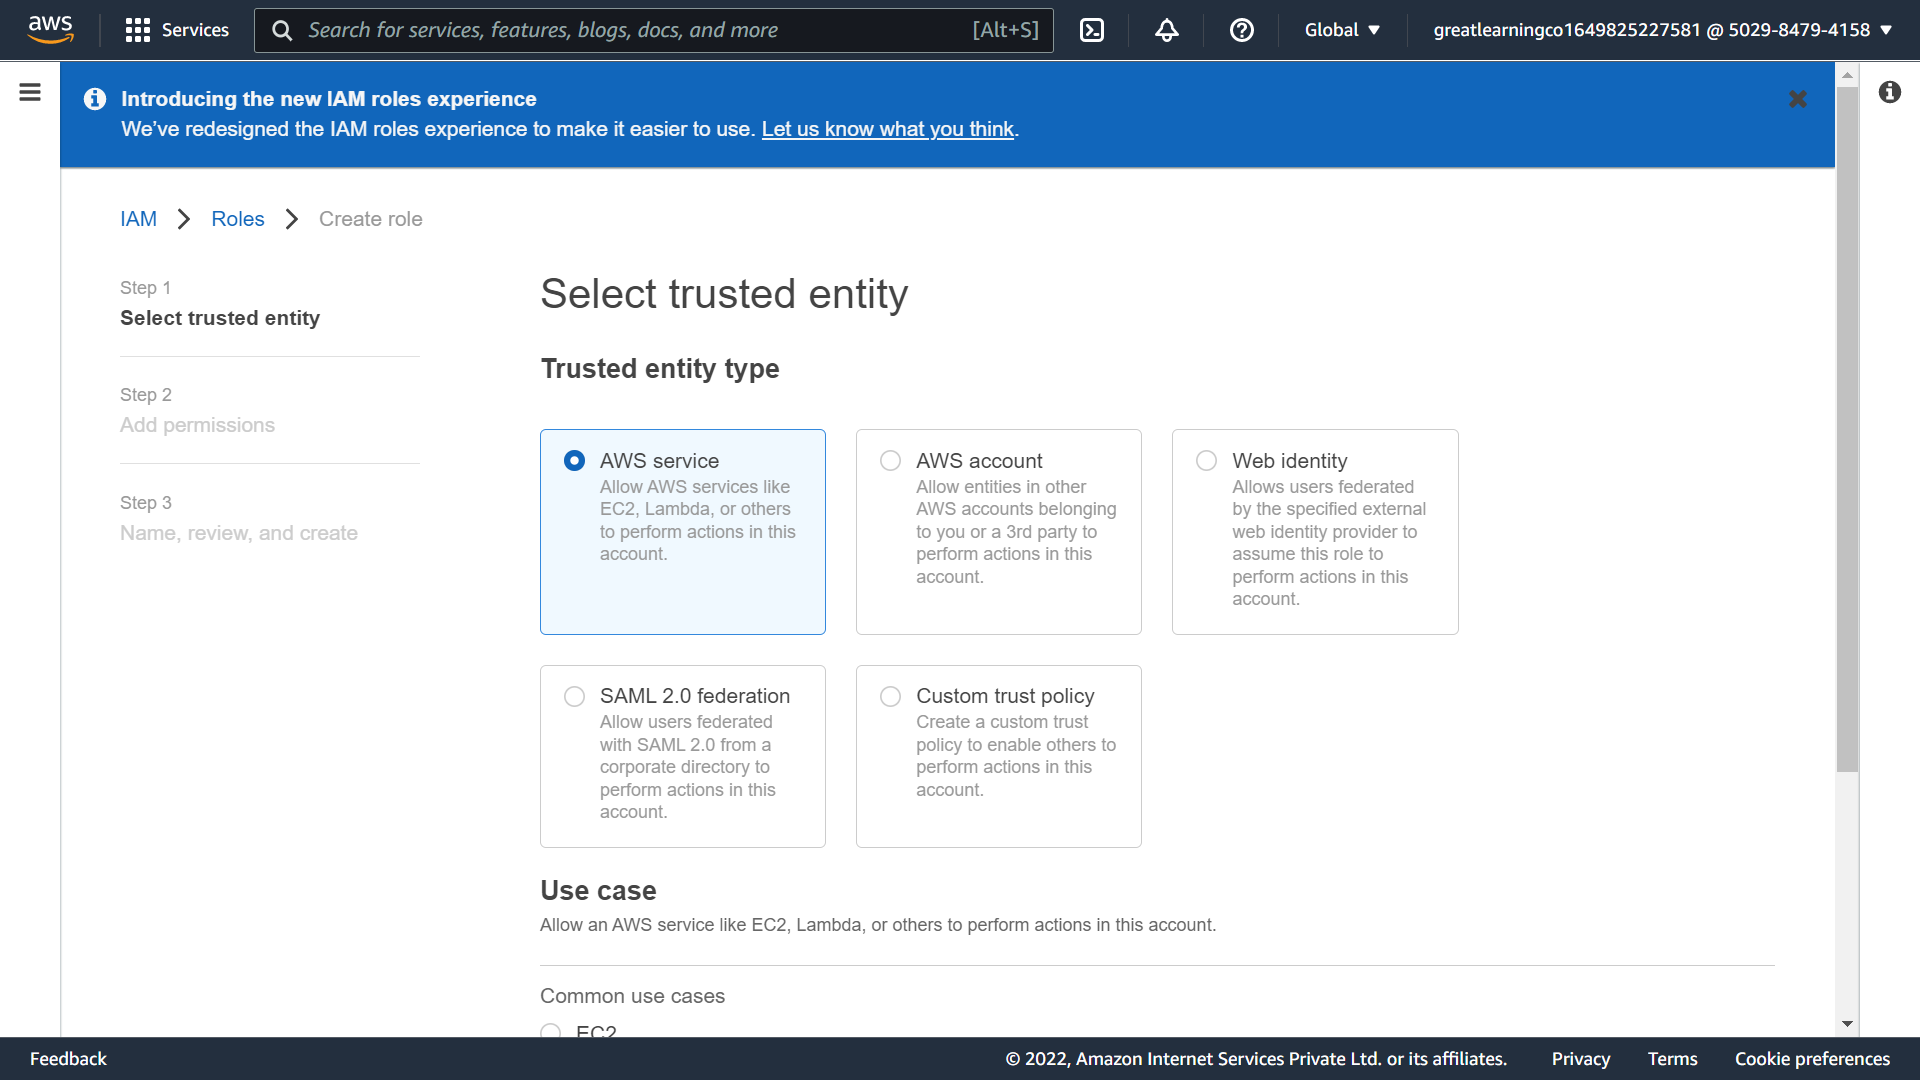

3. Scroll down to choose `IOT` as the Use Case for other AWS services as shown below-

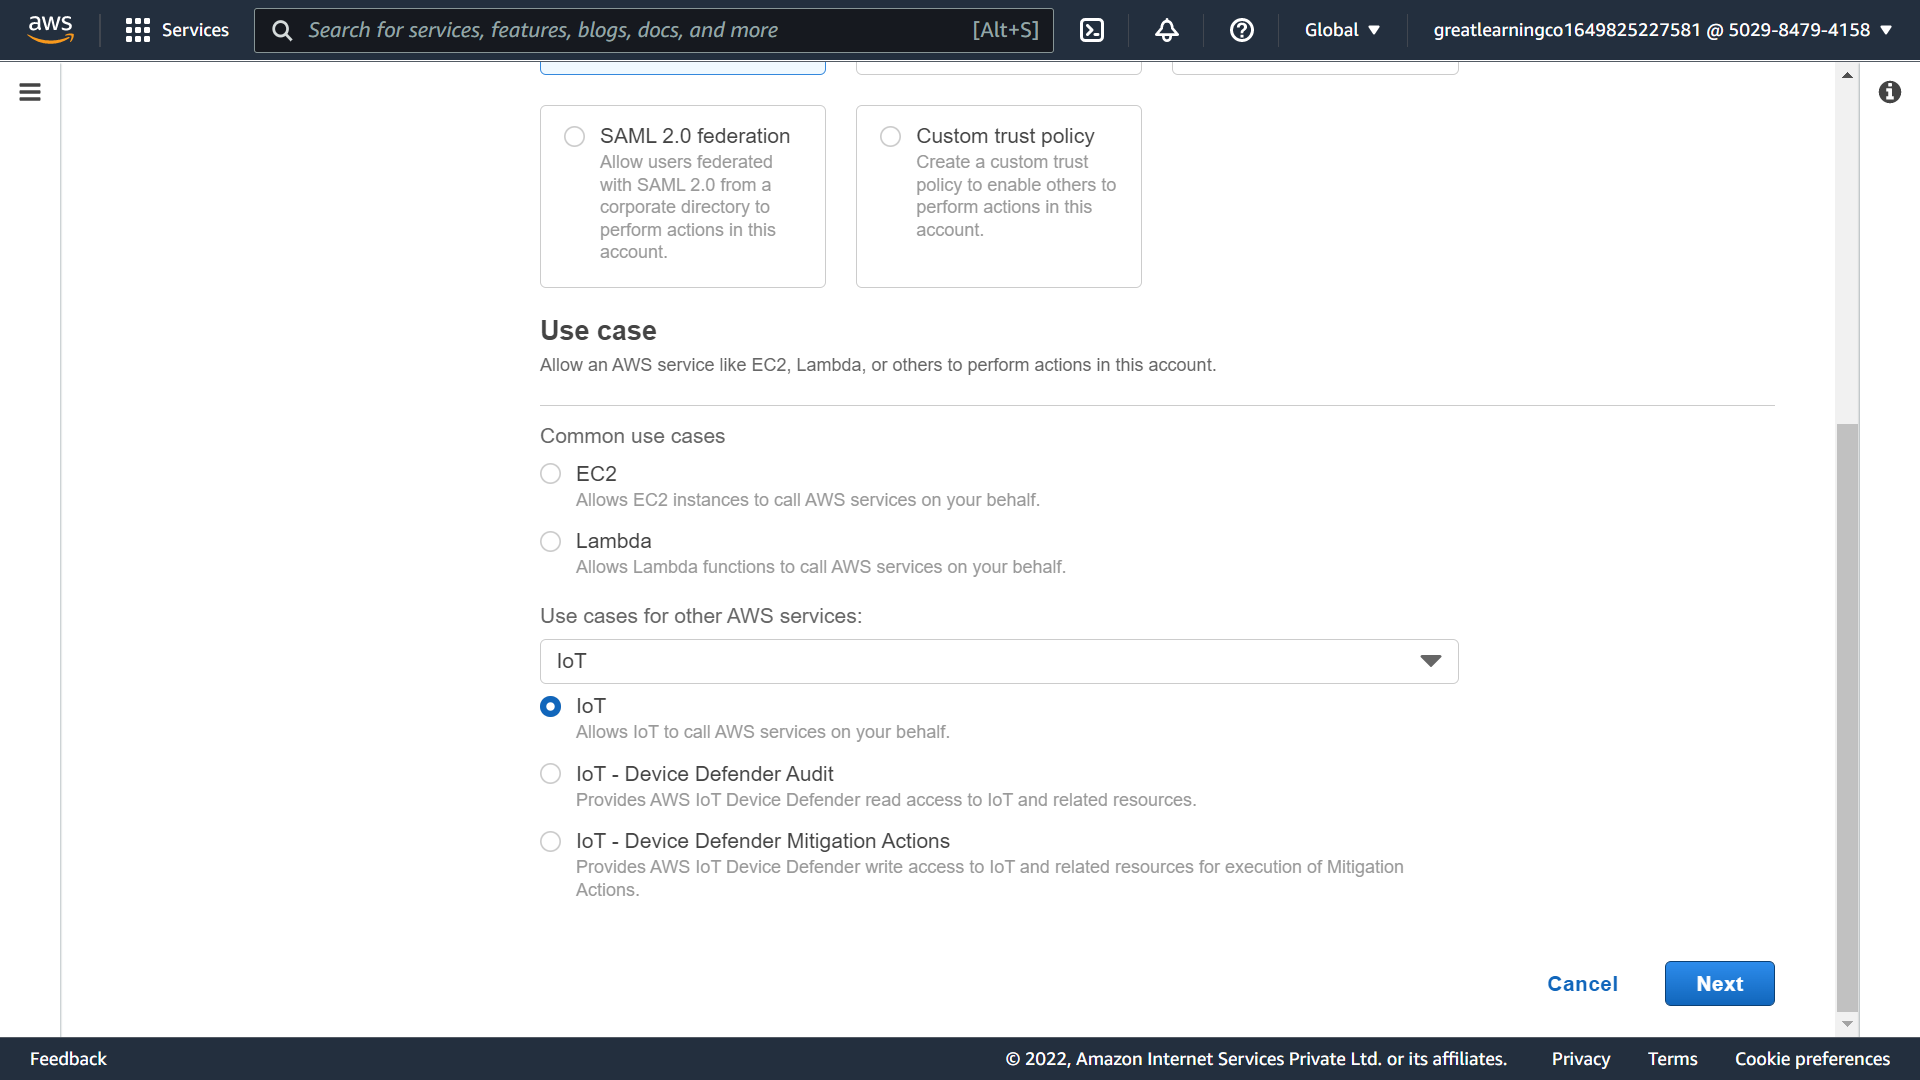

4. Click `Next` and you will get the screen for Permission Policies. Click `Next` again.

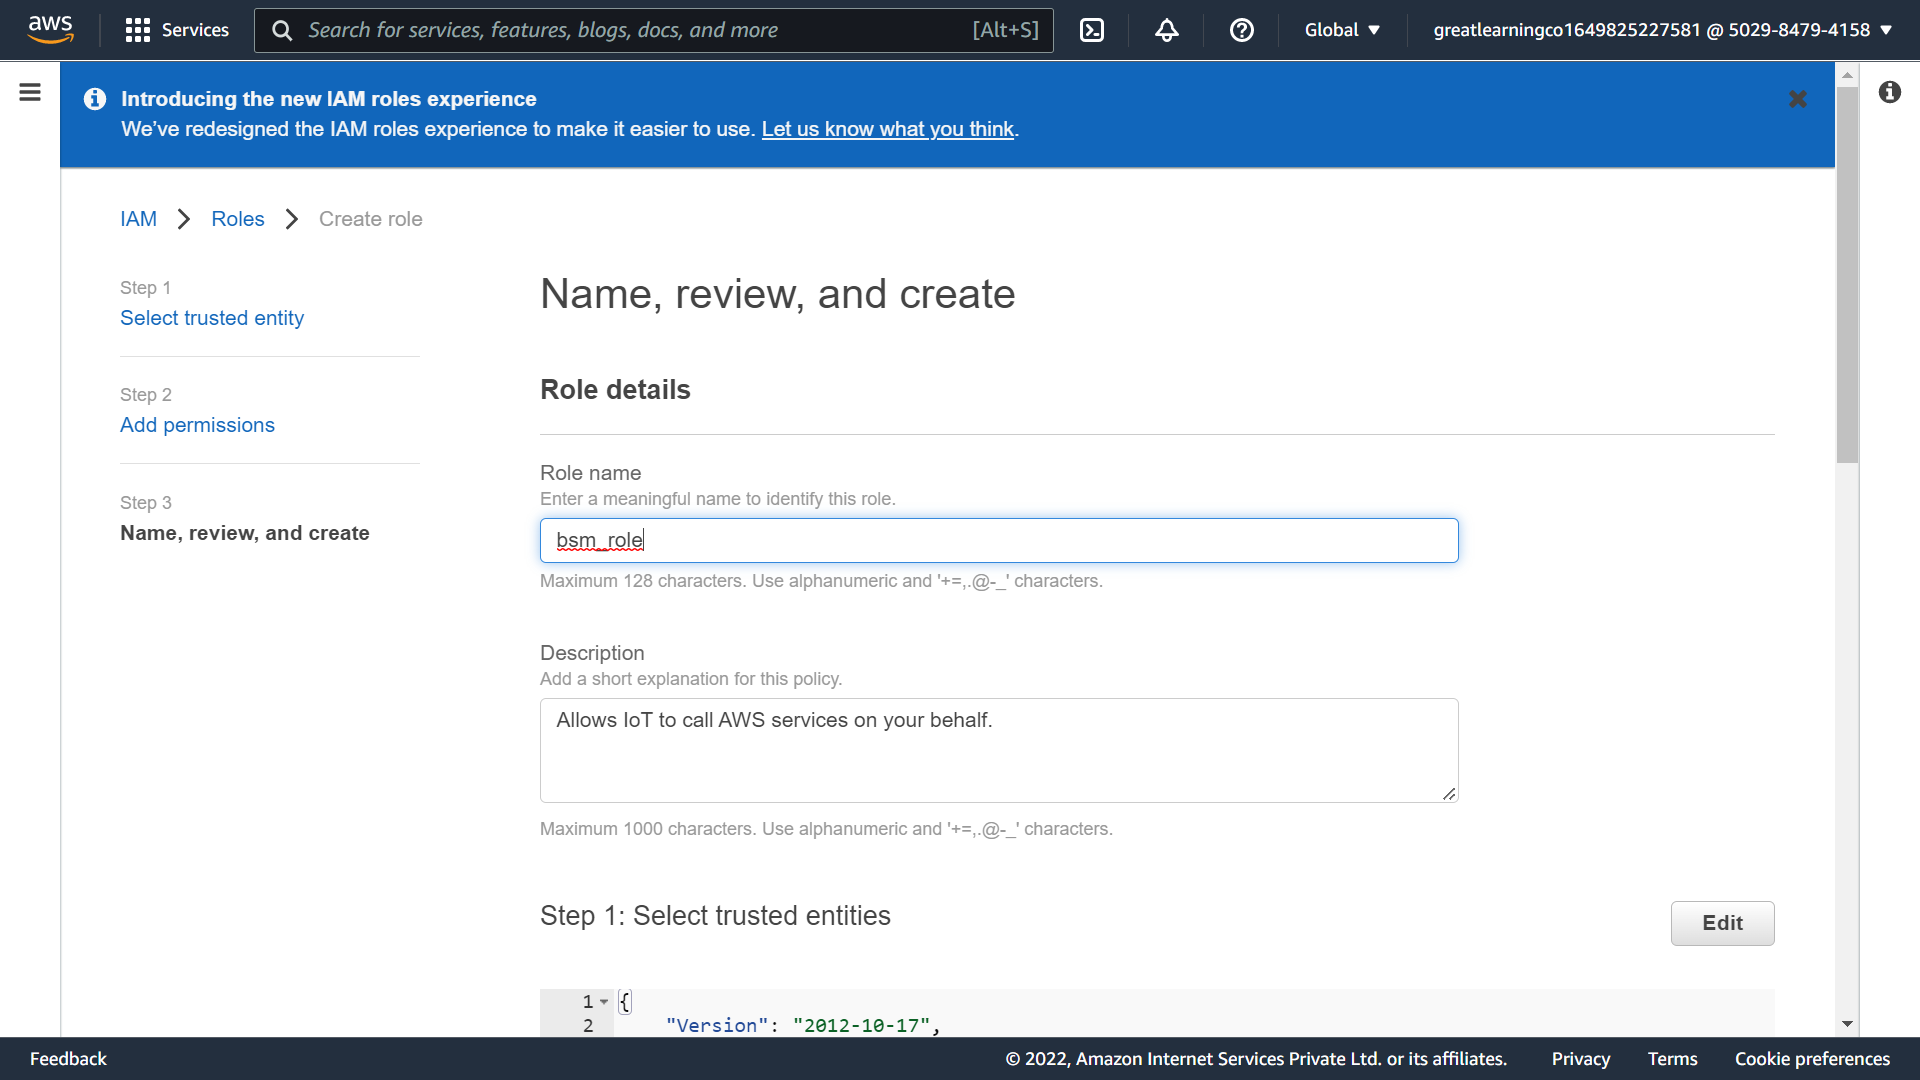

5. Give the Role name and click on `Create role`. On successful creation you can see the role name list in the roles list. Now go back to the Rule creation step and you can see the role created.

## <font color='blue'> AWS IoT core : Rule Creation </font>

AWS IoT Rules allow automatic action related to upstream AWS services based on data ingested from the devices. 

There are various rules which can send the data or pre-created information based on the data to various storage services like S3, DynamoDB, Elasticsearch; notification and alarm services like SNS, Cloudwatch metrics/alarms, Kinesis for stream processing, to invoke Lambda to transform the data and send it further, and multiple other analytics and ML AWS services.

You can choose to send all the data coming to a specific set of topics, or filter the data to send based on attributes in the payload. 

All this is done automatically on-the-fly, reducing the response time for stream processing and alerts/notifications. We'll be looking at setting up a rule to push data to DynamoDB in the next lab

In this section we are going to create rule to push the IoT core data int the DYnamoDB table we have created in the previous steps. 

Follow the below mentioned steps to for the rule creation.

1. Subscribe to the topic name provided in the command used to run the script in previous steps. 

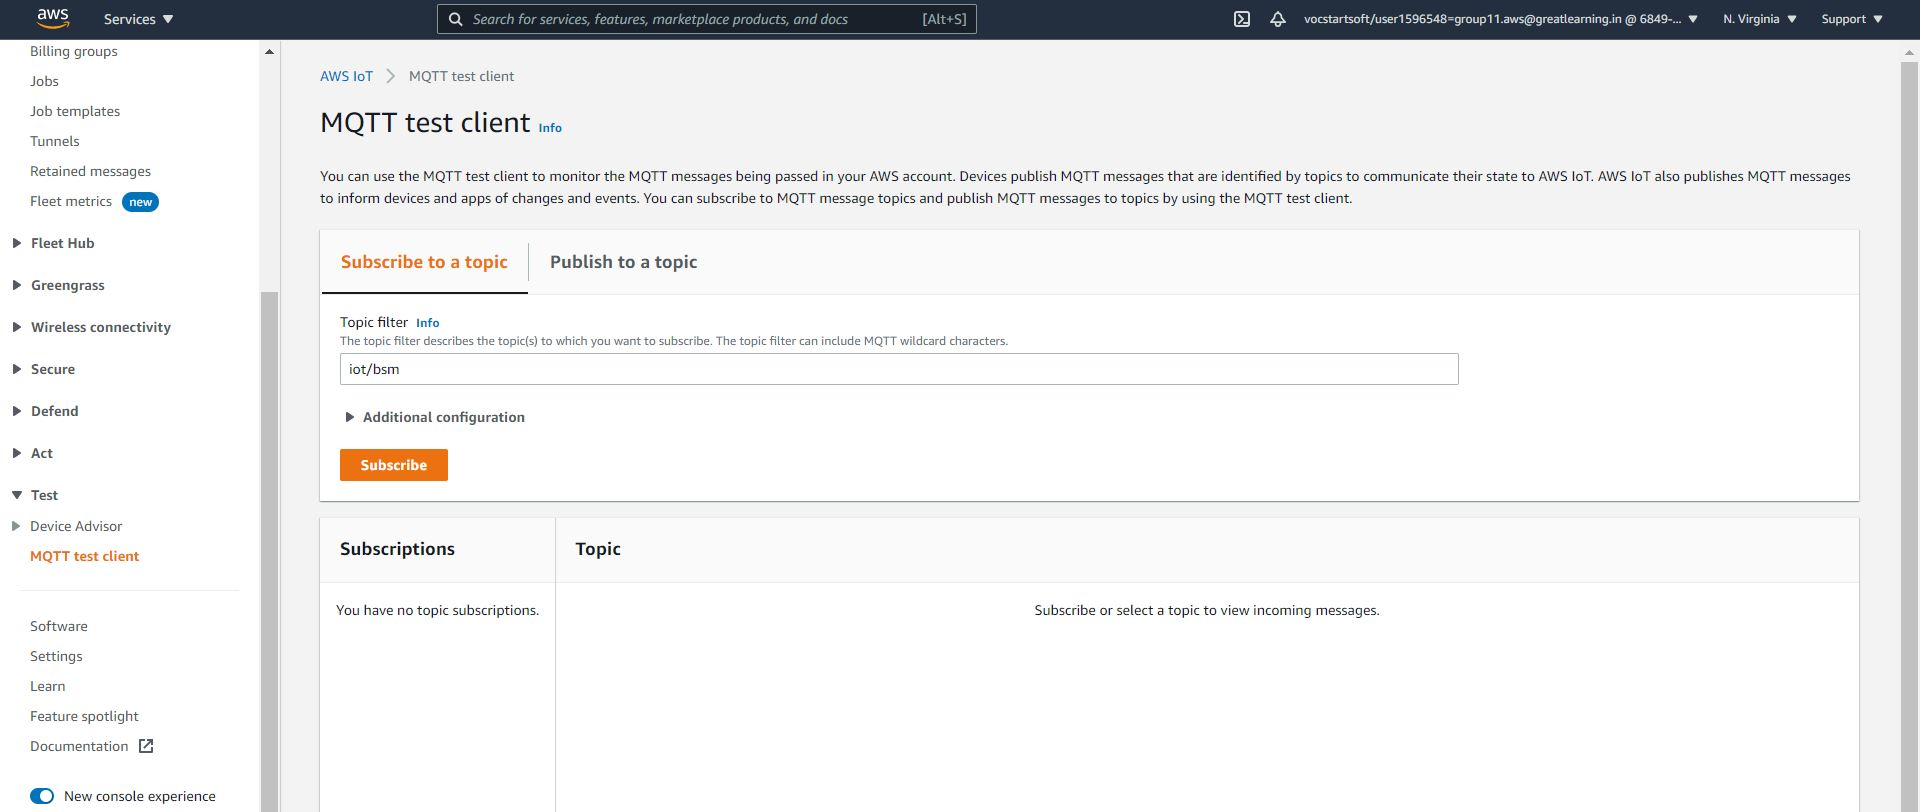


2. Now go to the `Act` section and choose `Rules`. 

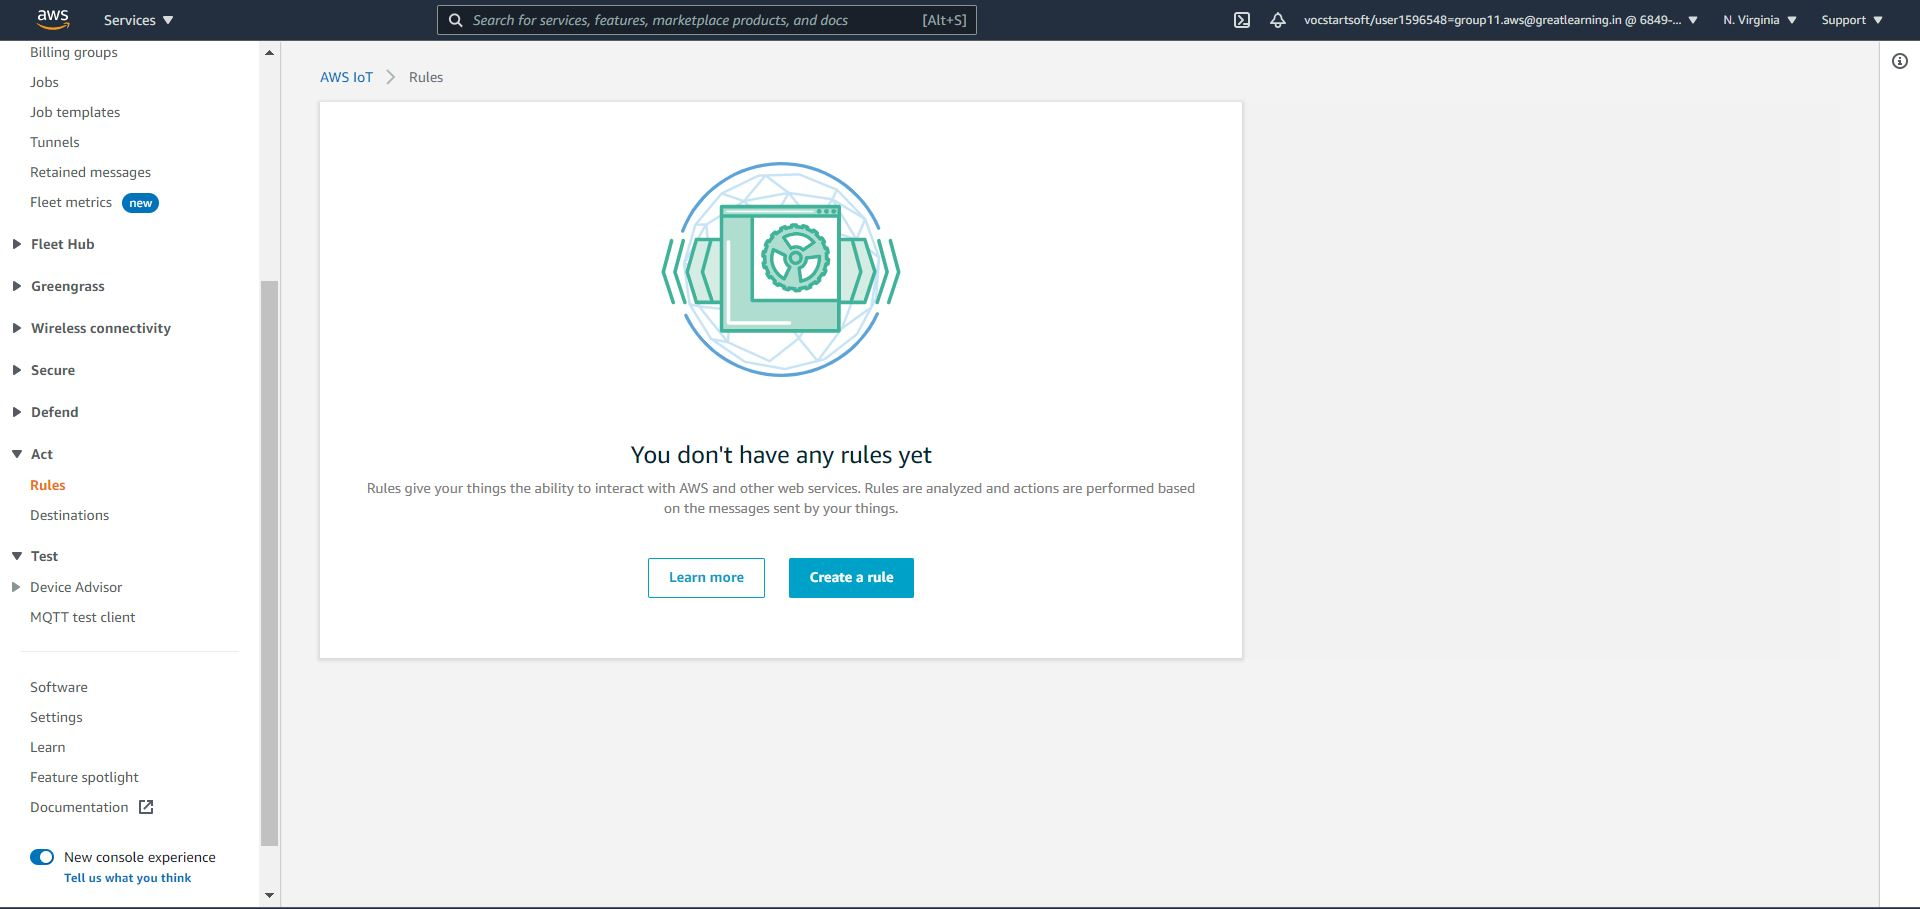

3. Click on `Create` and enter name for the rule. 

<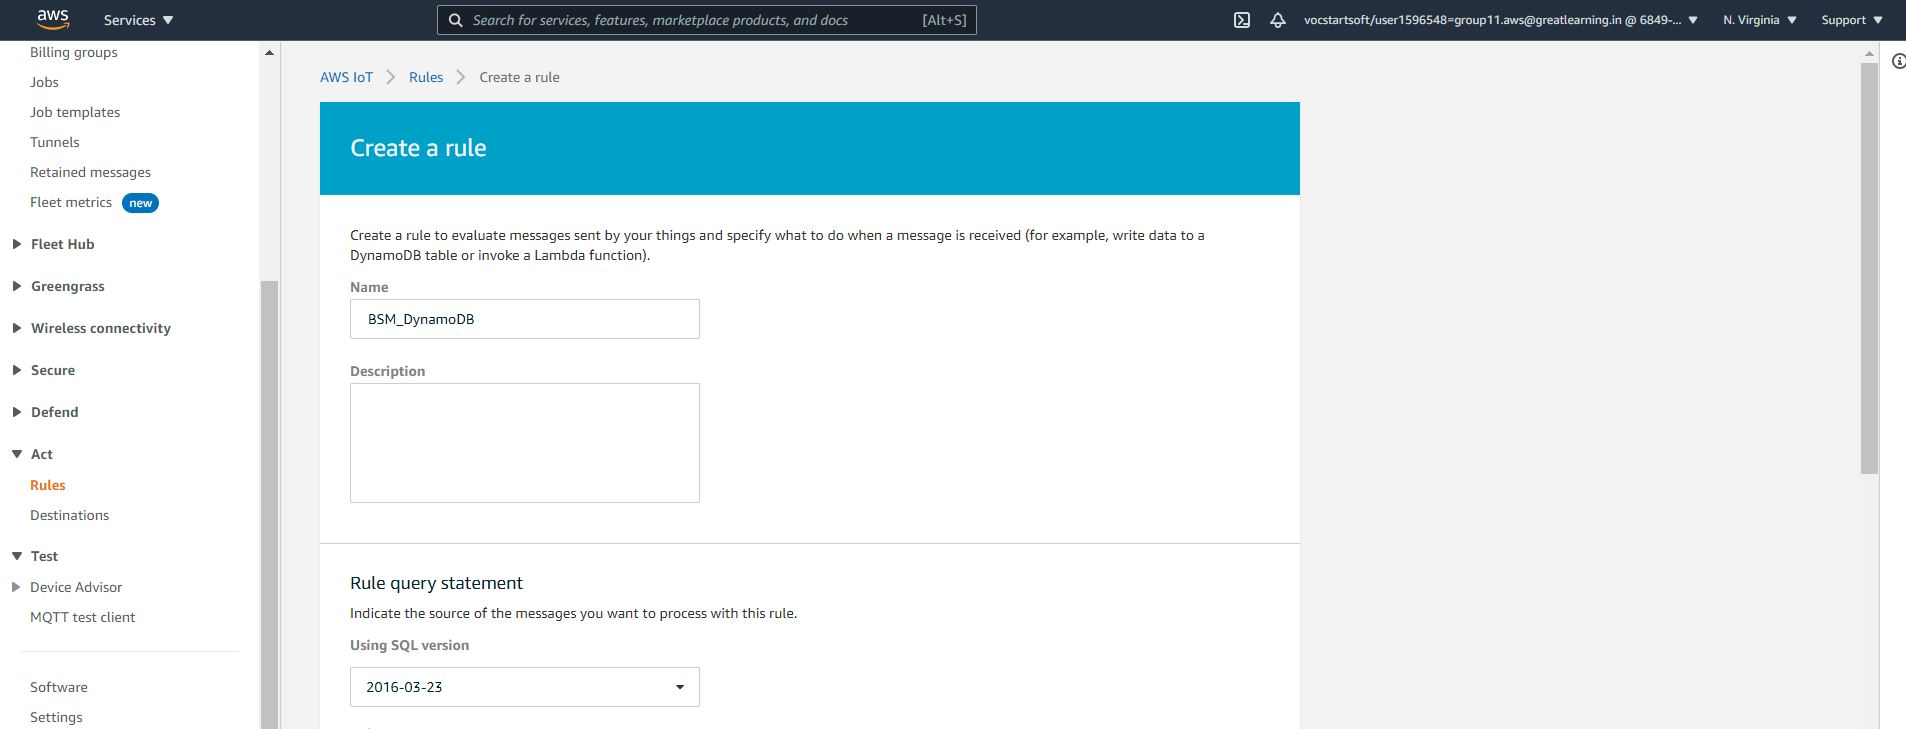

4. Provide the query statement as mentioned in the following image. Here enter the topic name (`iot/bsm`) given during the script execution. 

    * SELECT * FROM 'topic_name'



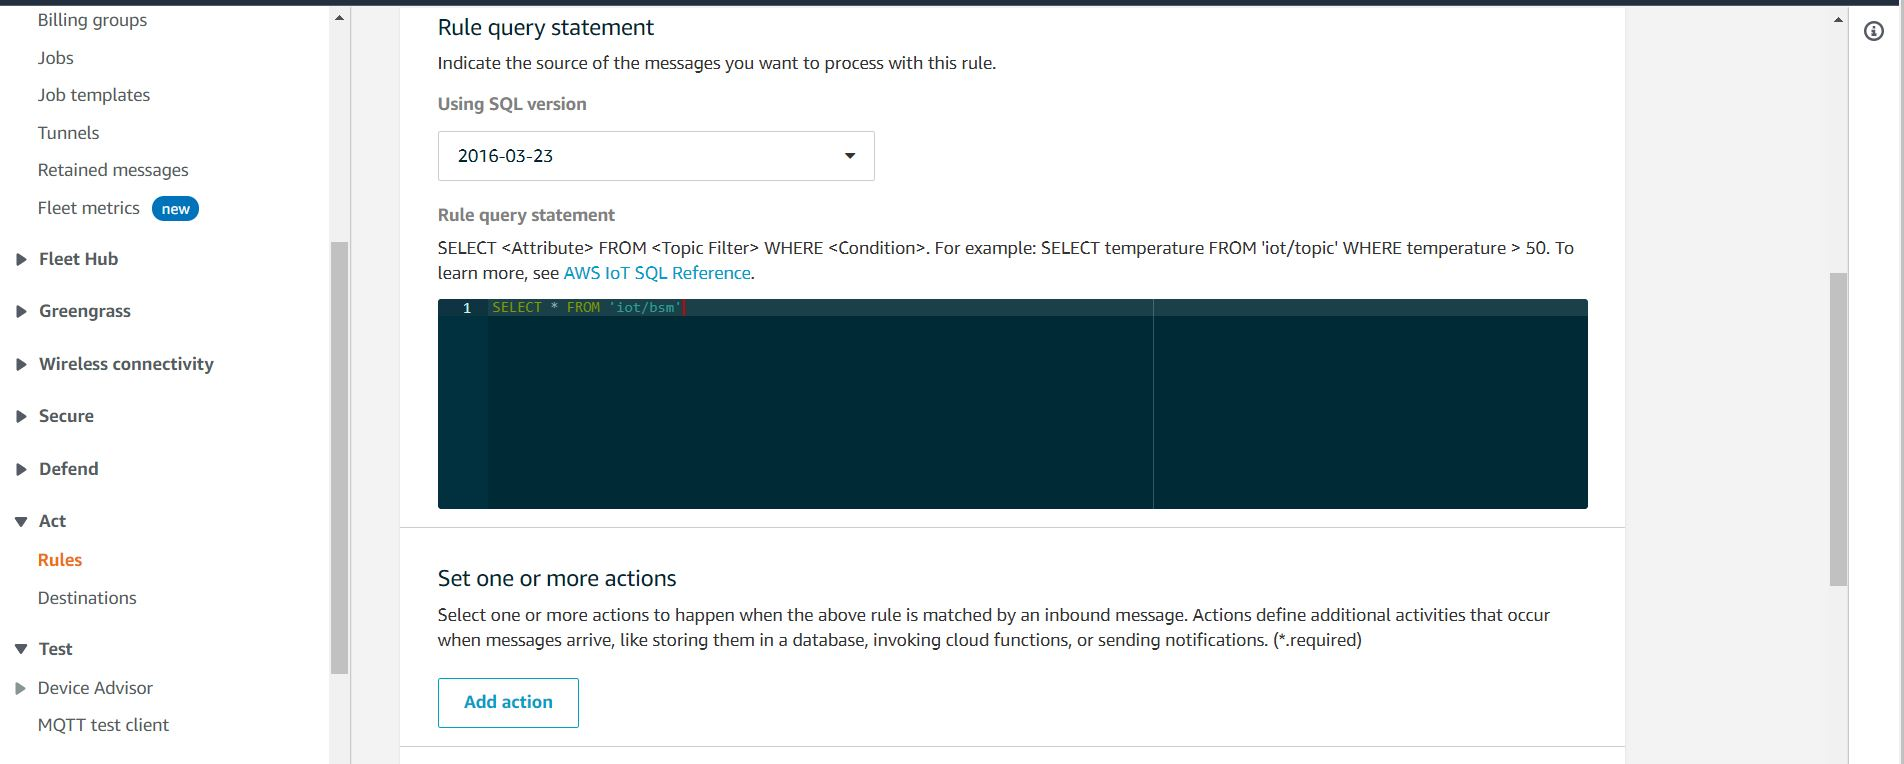



5. In the same page scroll and find `set one or more action` section. In that section Click on `Add action`. 

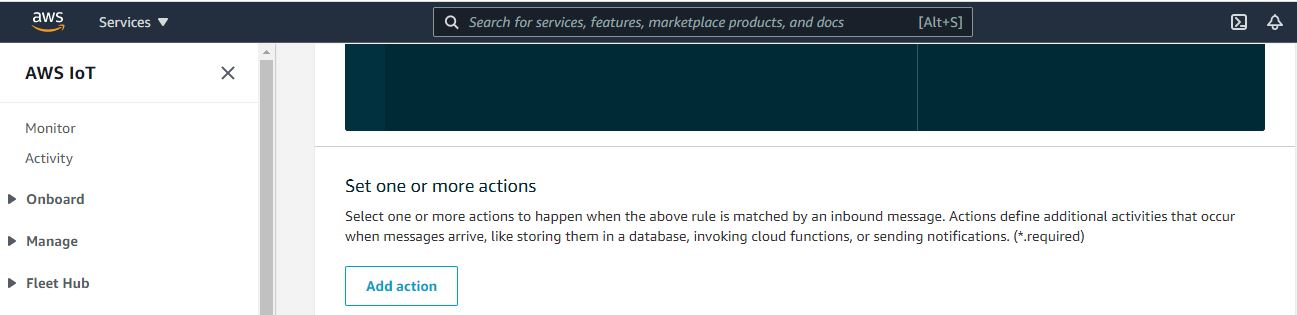


6. Choosing `Add action` will take you to the next page. Choose `Split messages into multiple columns of a DynamoDB table` opion as mentioned in the follwoing image.  

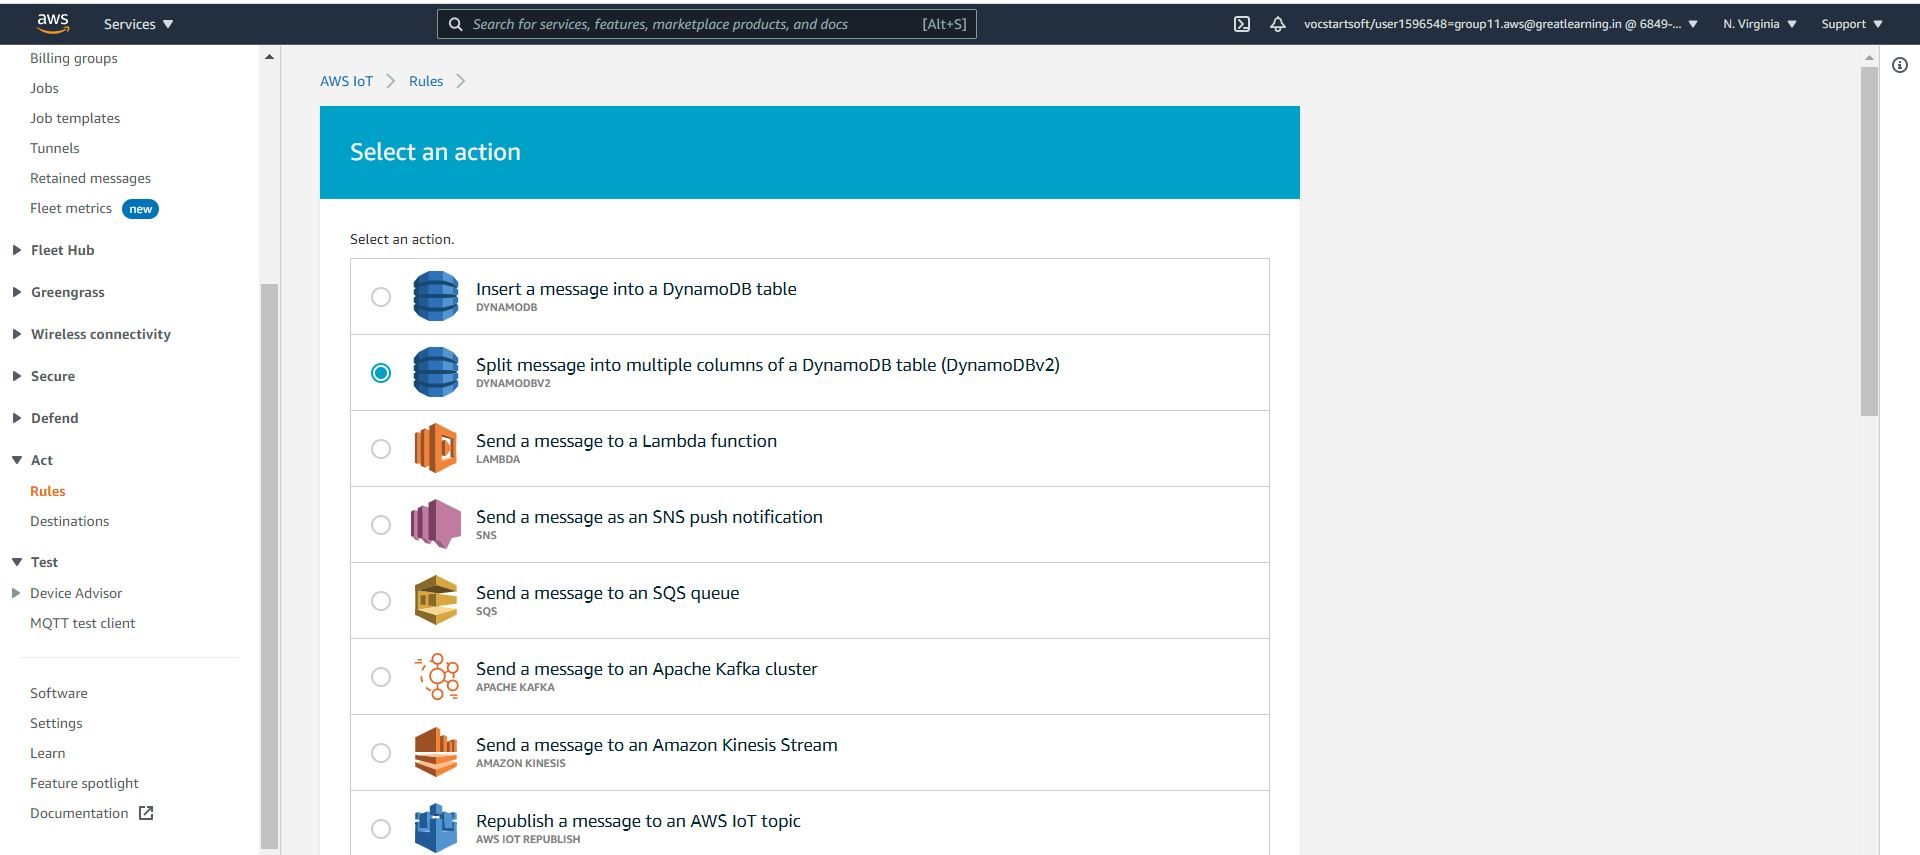



7. Scroll down and click on `Configure action`. 


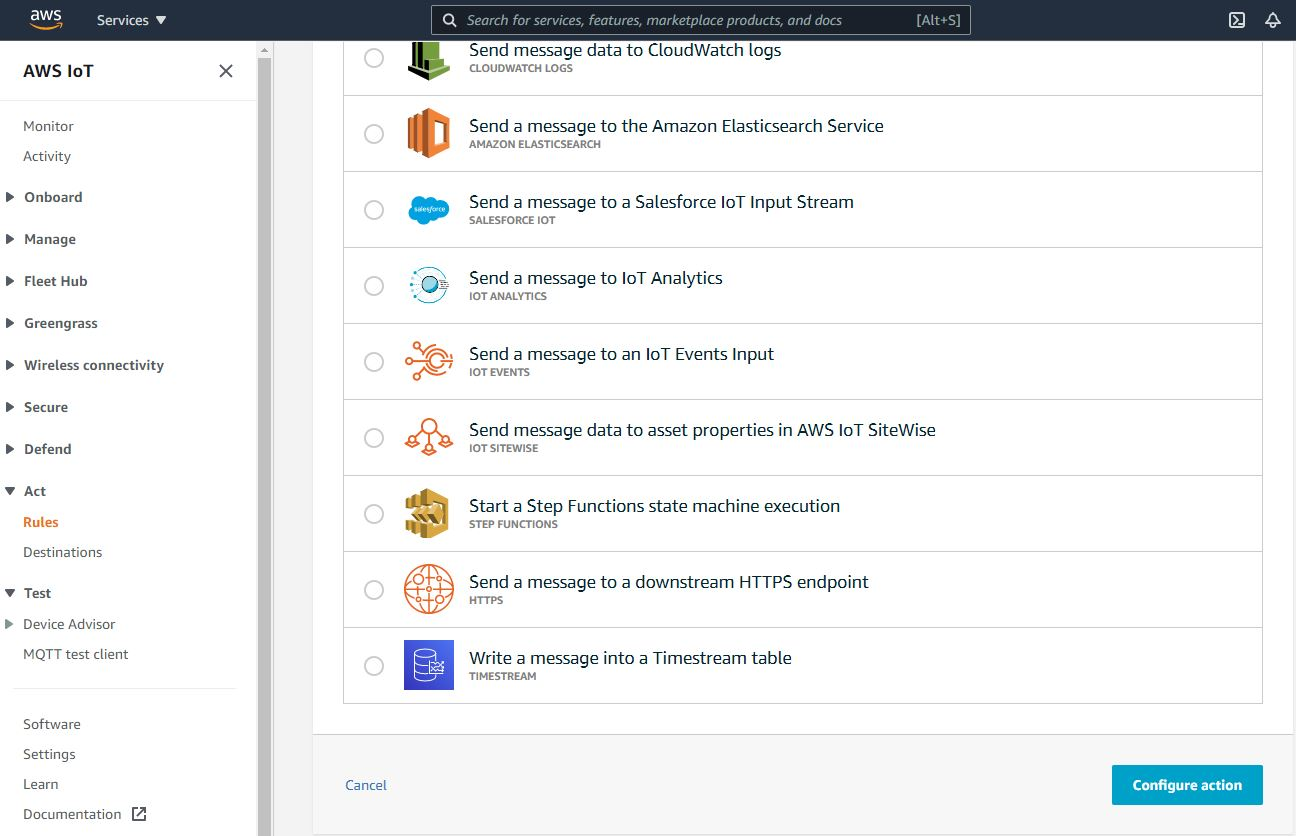

8. Choosing `Configure action` will take you to the next page. `Choose a resource` (Table created in the previous steps). 


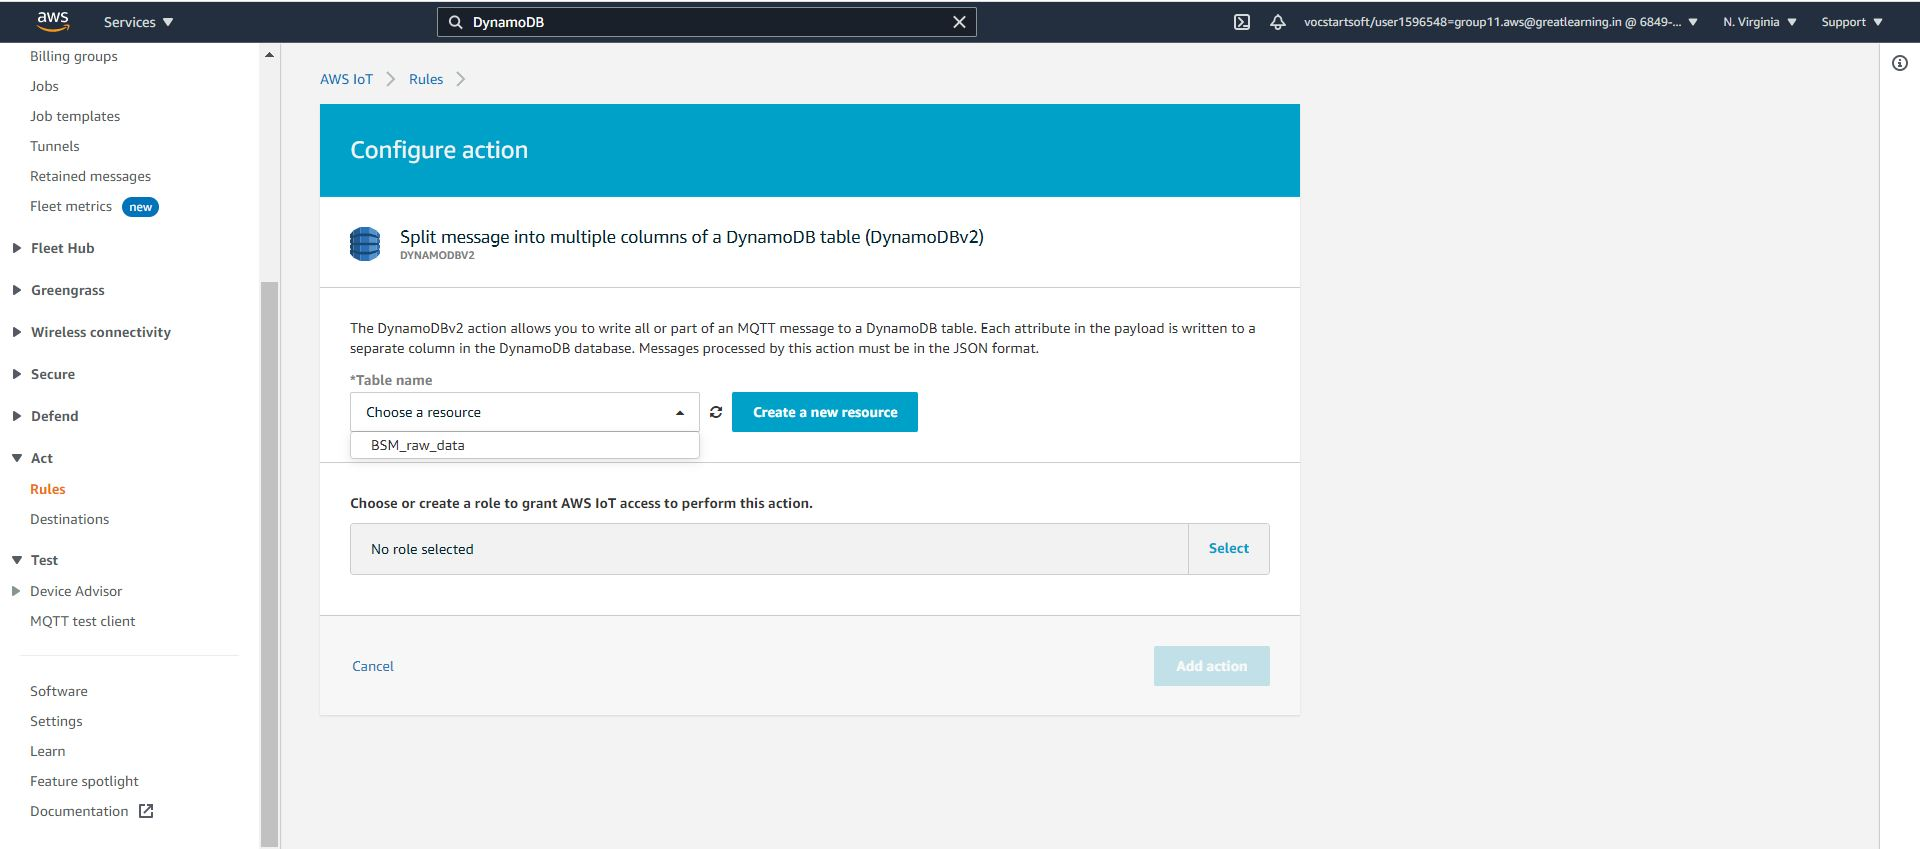

9. Scroll down to choose a role to grant AWS IoT access to perform this action and click on `Select`. 

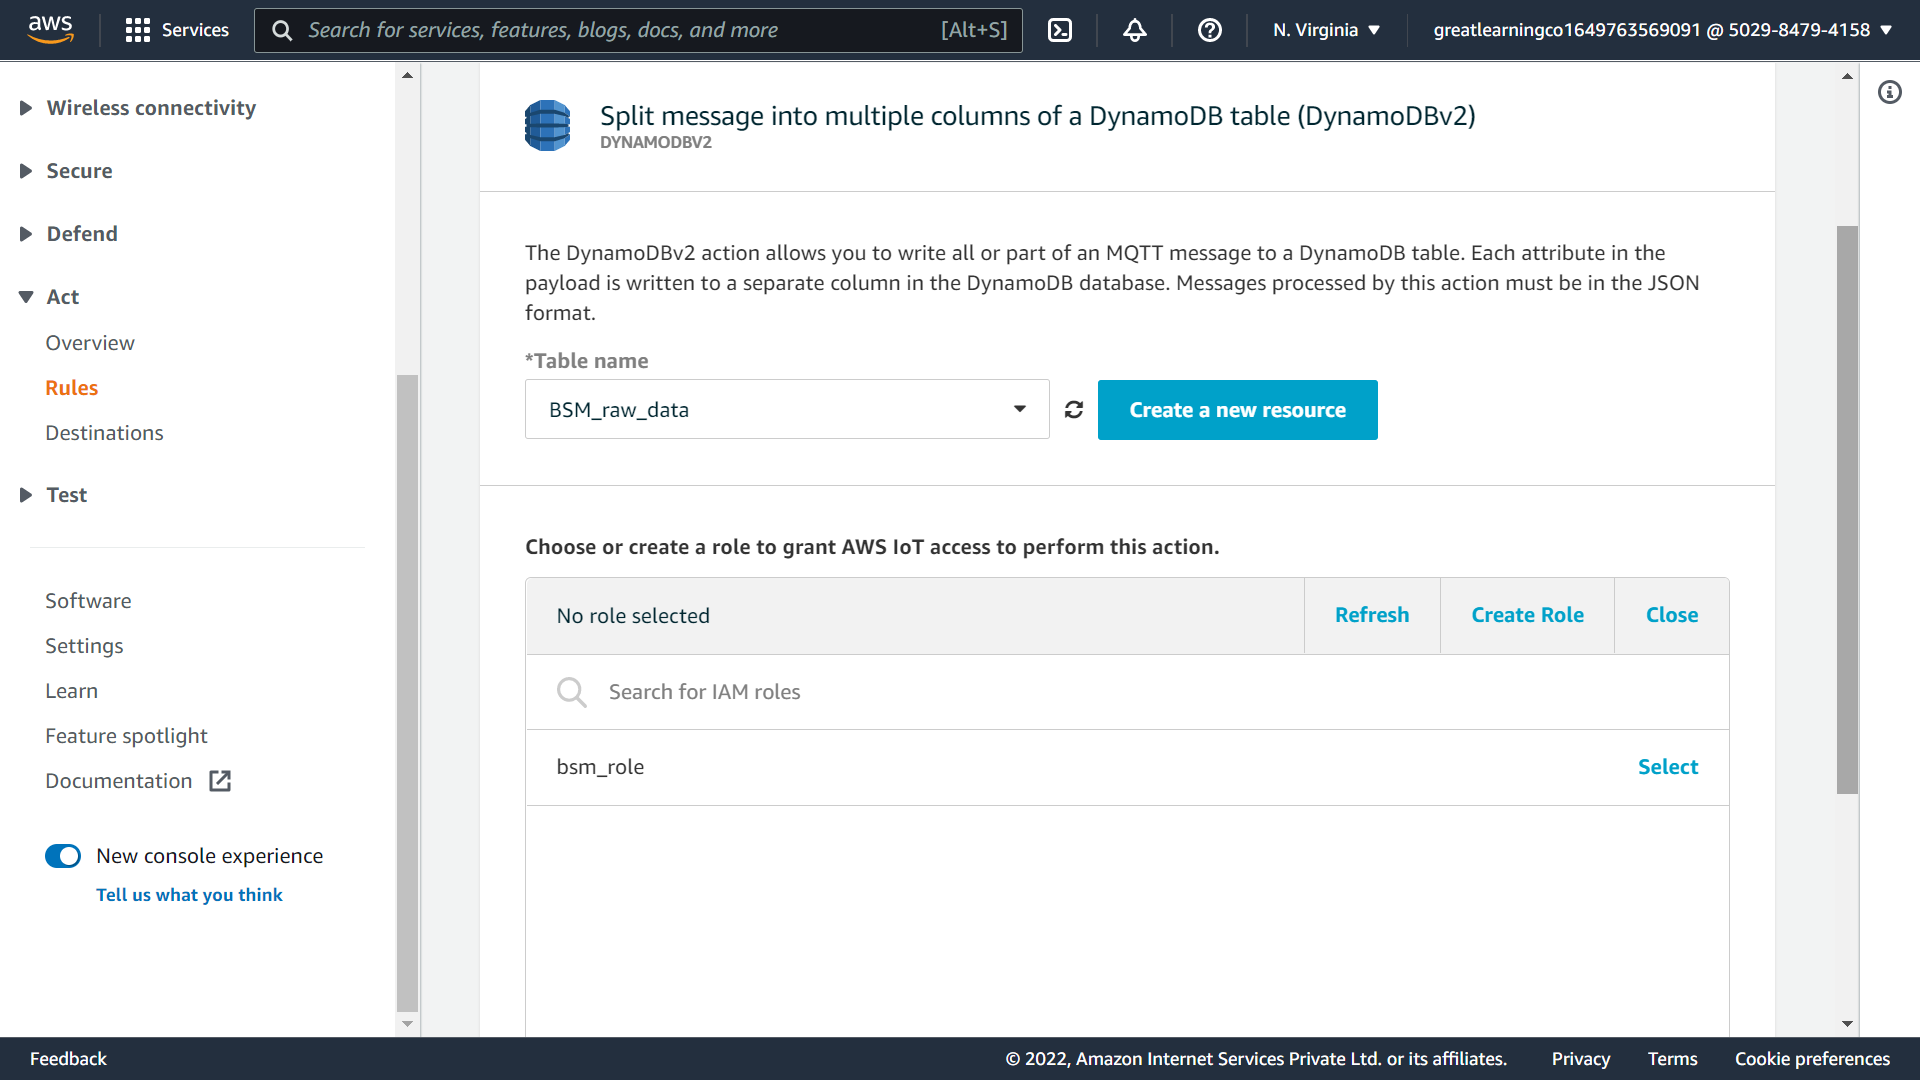

10. Select the IAM Role previously created-


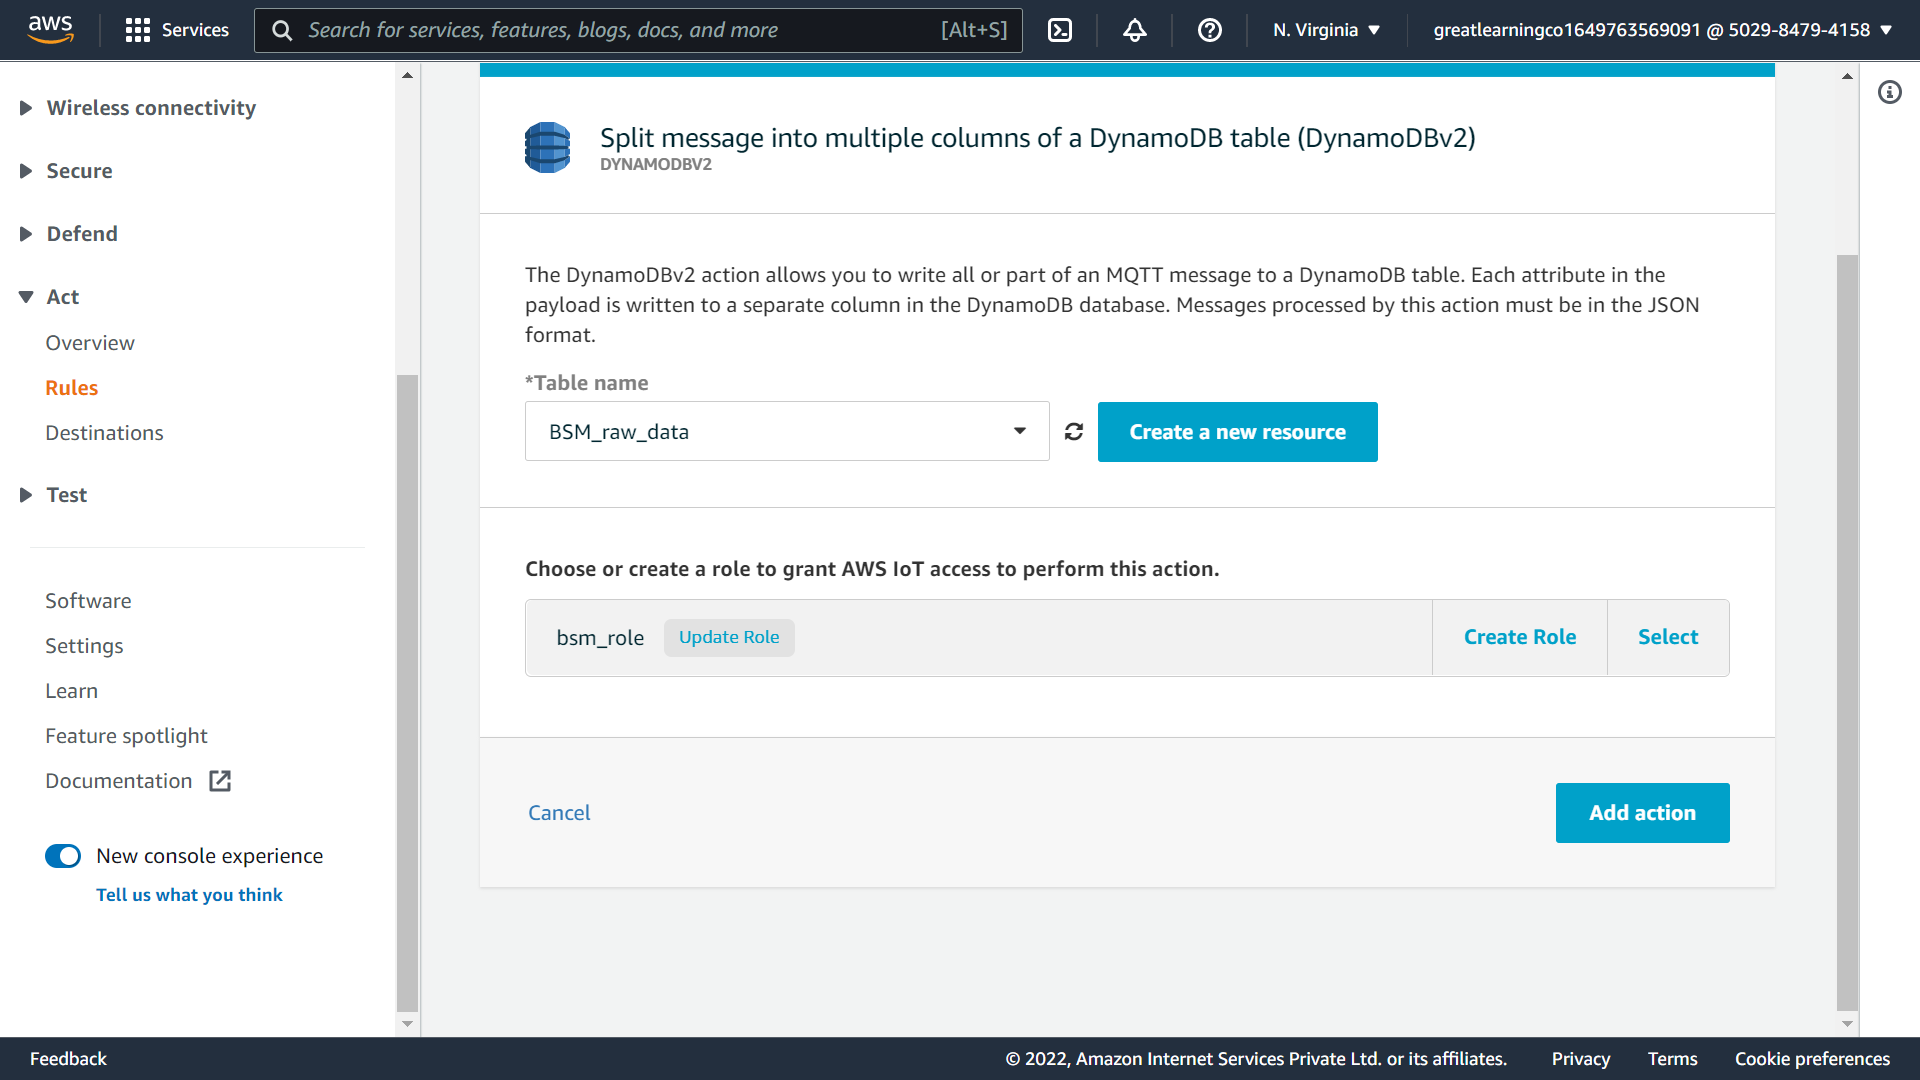


11. DO NOT CLICK ON UPDATE ROLE OPTION. Successful operation will attach the policy to your rule. Now click on `Add action`. 

12. Click on `Create rule` as mentioned in the following image. 

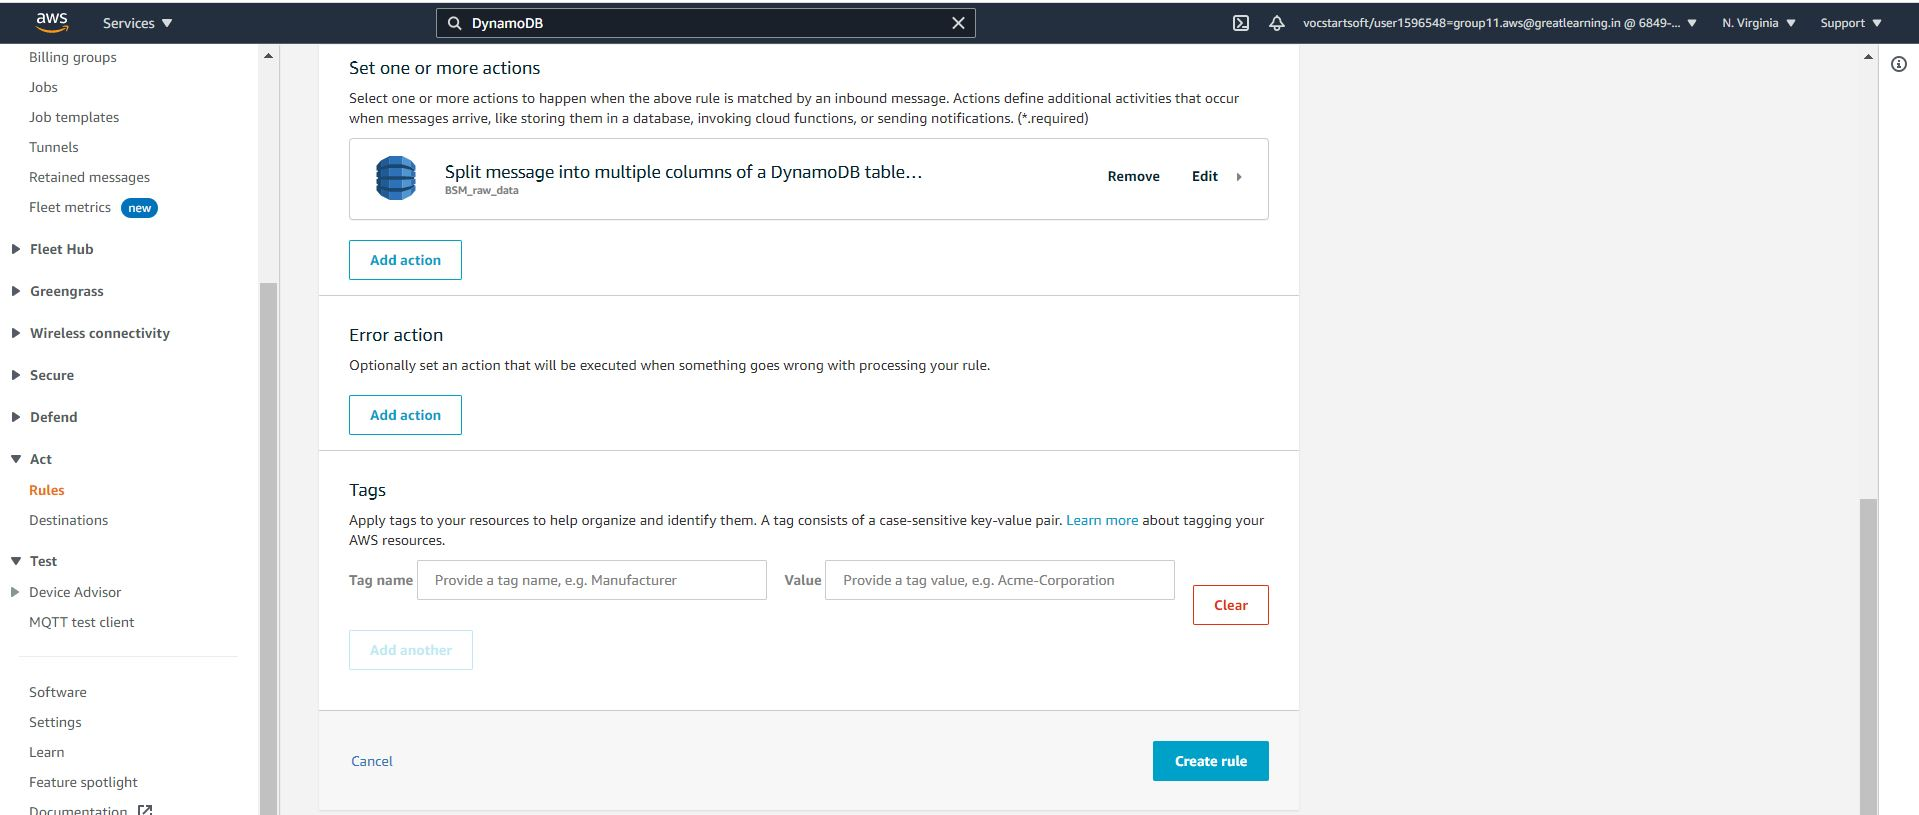

13. Successful operation will result into the newly created rule. It will appear similar to the image mentioned below. 

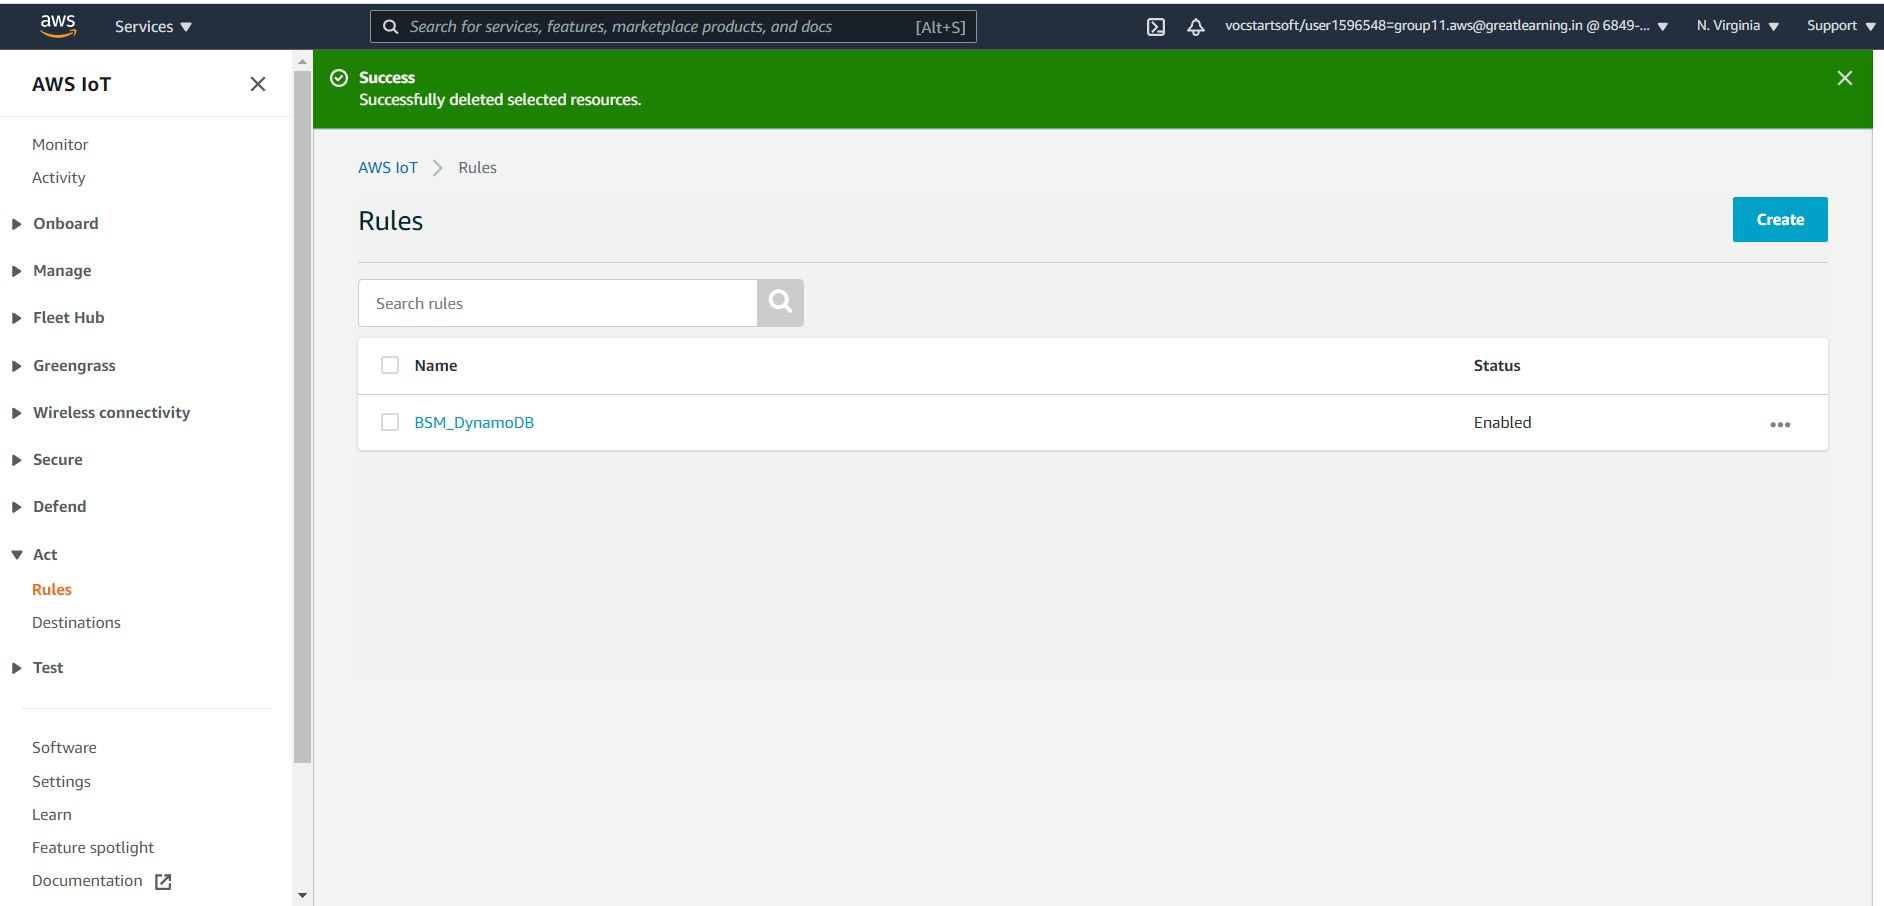

14. Go to the DynamoDB page, click on `Tables` and choose the table created in previous steps. 

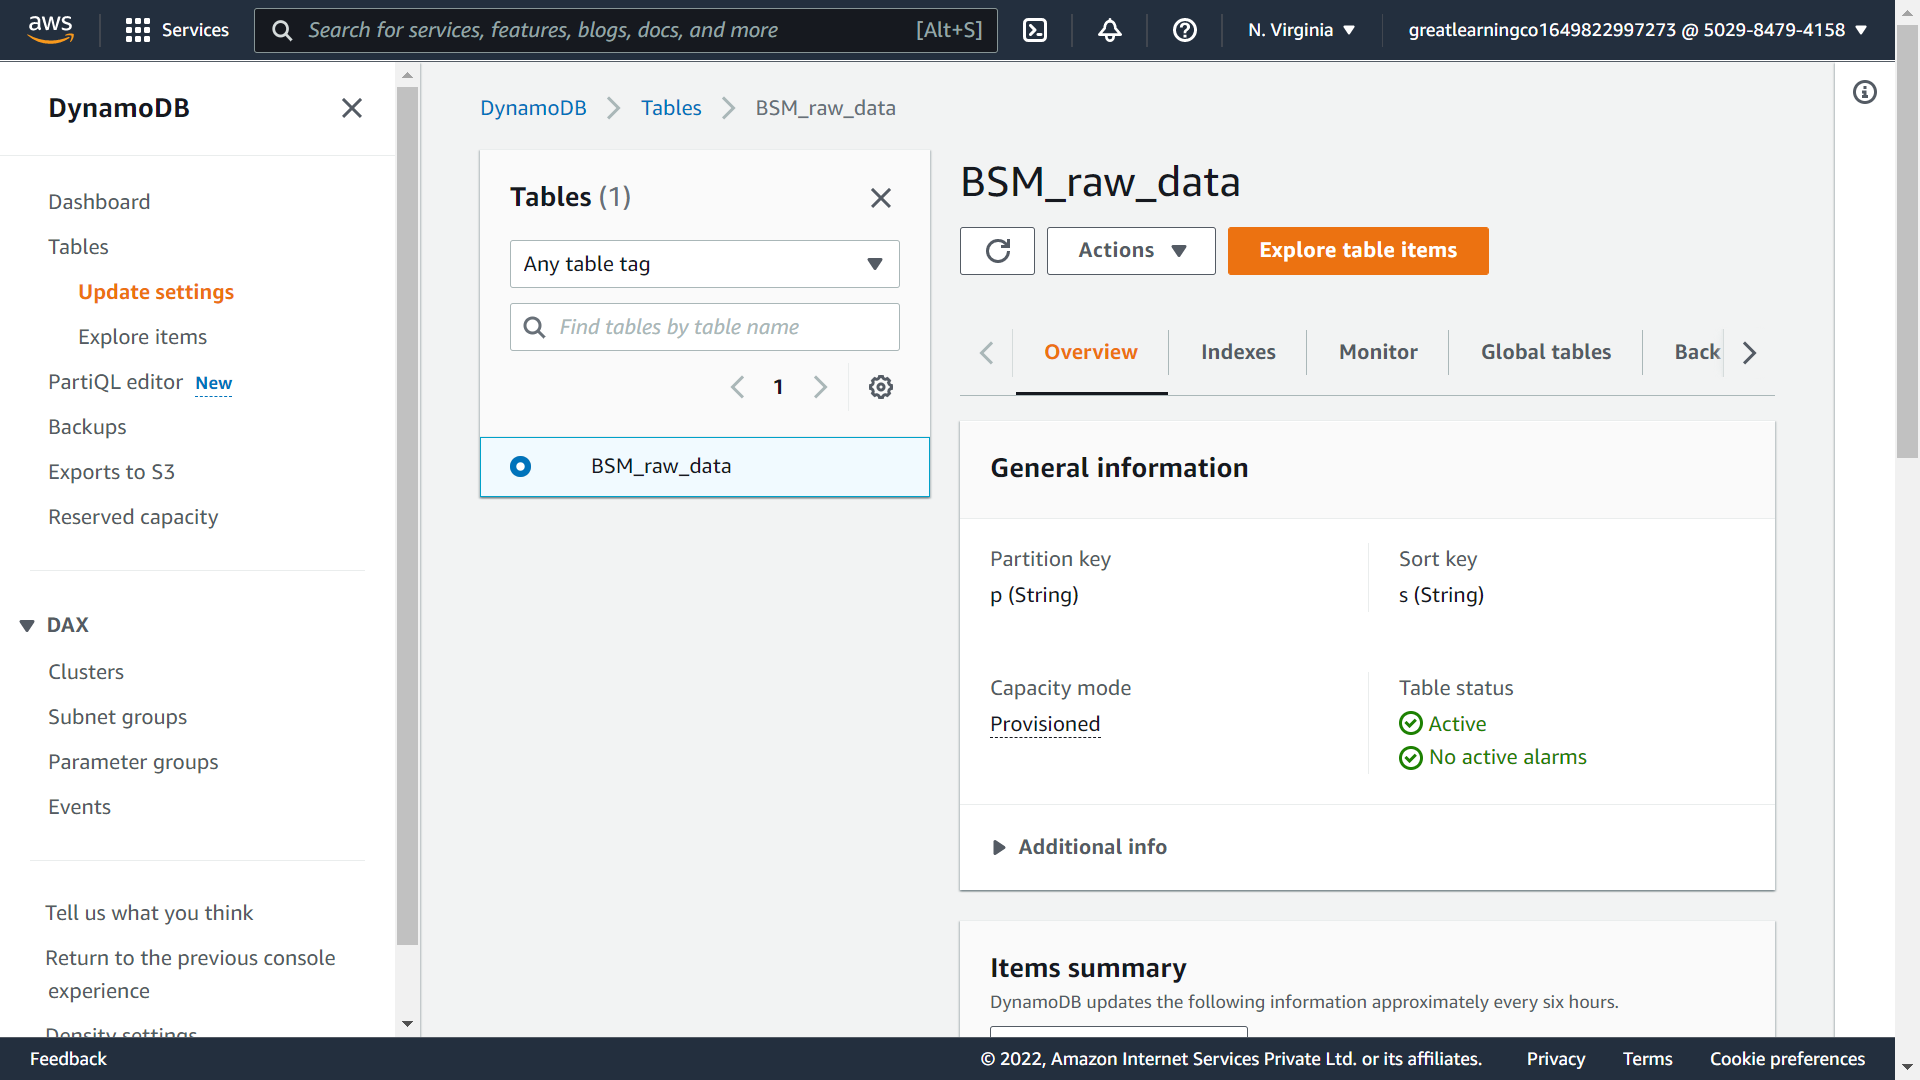

15. Run the command on your local machine which we have used in MQTT test client section. Command will execute the script and data insertion will start. Click on the `Explore table items` and you can see data getting ingested in the table. It will appear as mentioned in the following image. 

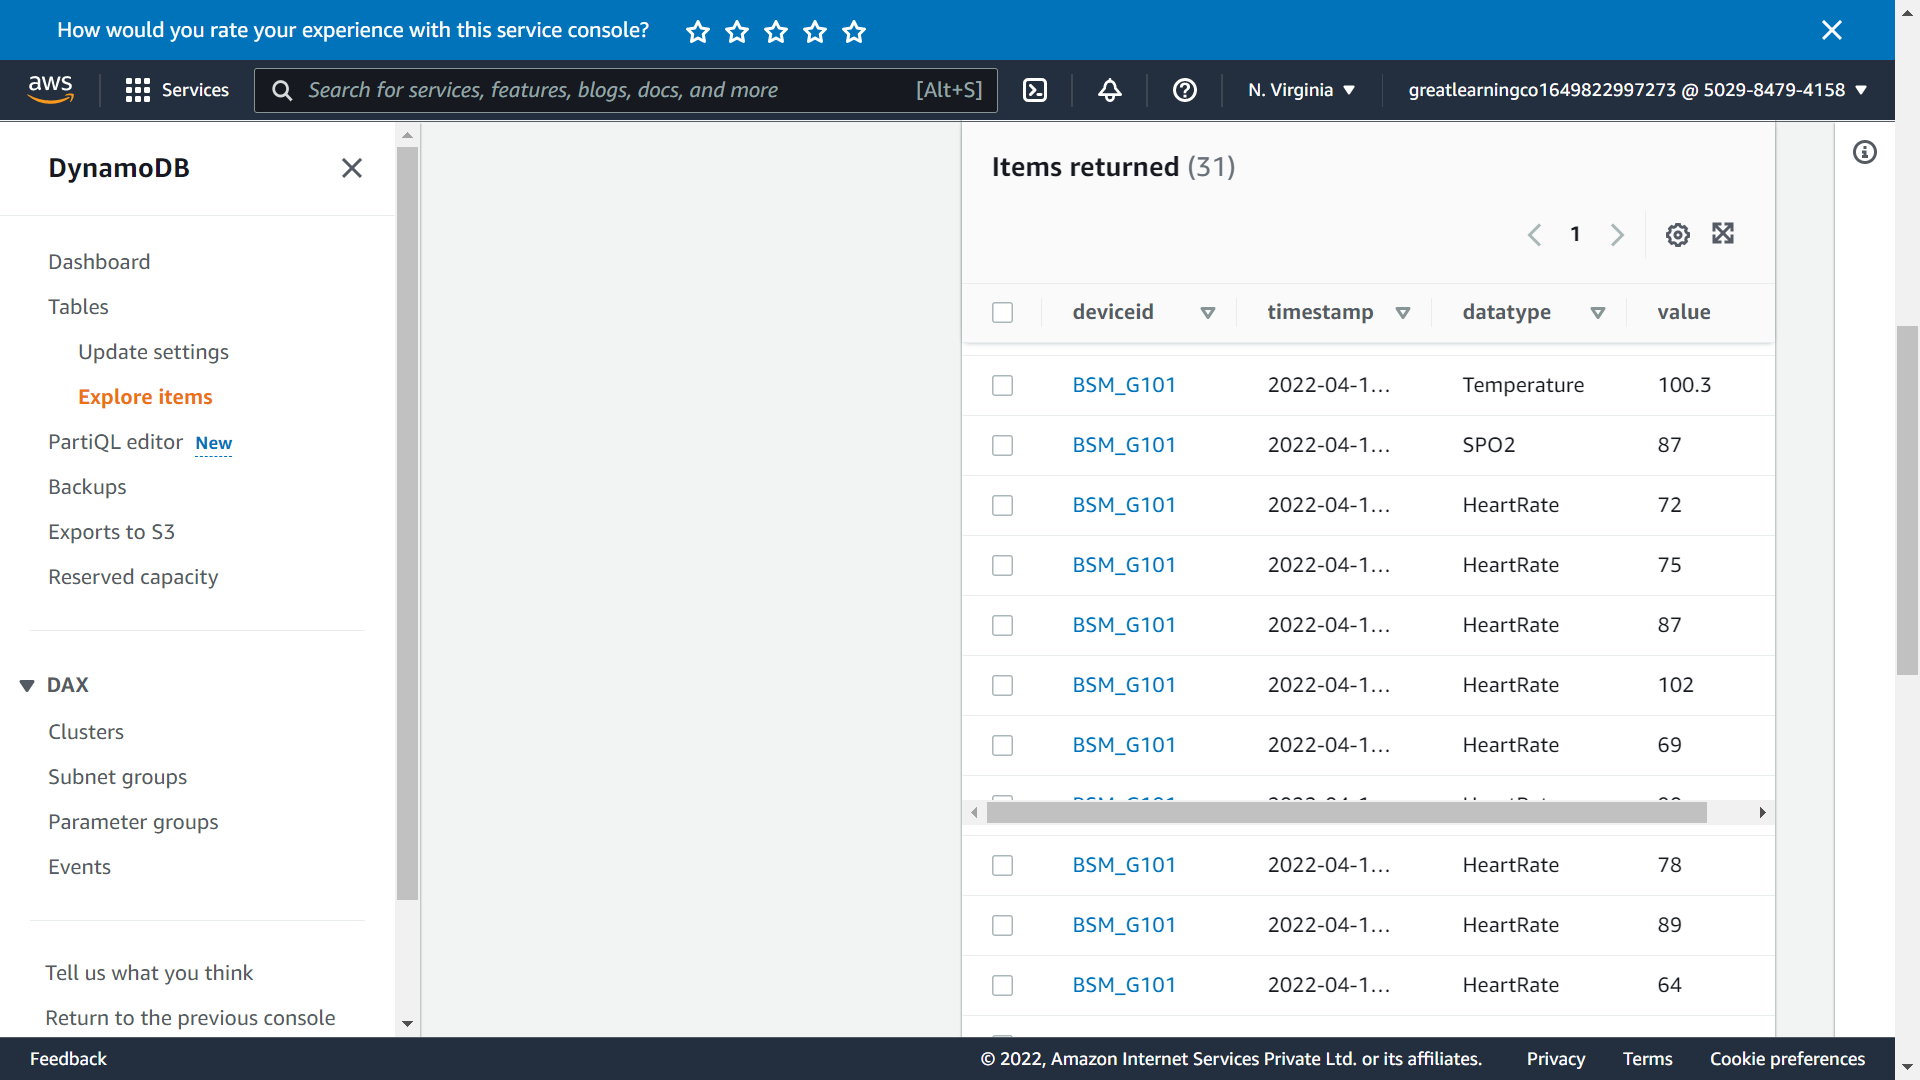

# <font color='blue'> Important </font>

Once you have completed the lab and involved practice exercise, please do the following: 

1. Delete the DB instance that is used store the raw data. This service is very costly and will consume alot of credit from the AWS account. 
2. You can keep things and policies as it is because they do not consume alot of credit. 
3. You should also delete the rules and roles you have created to push raw data into DB. 
4. To access the roles that you created, search IAM on the console, look for Roles and search with the name that you used to create the role. 